<a href="https://colab.research.google.com/github/shivasaxena23/Experiments-DNN-Offloading/blob/main/New_alpha_bounds_on_non_monotonic_communication_latencies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Randomized algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import math
from scipy.special import lambertw
from math import e

In [2]:
with open('vgg19_compute_values (1).npy', 'rb') as f:
  vgg16_compute_values = np.load(f,allow_pickle=True)

In [3]:
vgg16_compute_values[0]

array([0.03391266, 0.00308251, 0.00077176, 0.00025868, 0.00016093,
       0.00021362, 0.00014138, 0.00016761, 0.00015068, 0.00014281,
       0.00013471, 0.00039506, 0.00034285, 0.00031734, 0.00033474,
       0.00038338, 0.02665401, 0.00036669, 0.00018716])

In [4]:
vgg16_compute_values_remote = 10000*vgg16_compute_values[20:10000,:] #1000 or 10000

In [5]:
pd_vgg16_te = pd.DataFrame(vgg16_compute_values_remote)

In [6]:
pd_vgg16_te.head()

0         1         2         3         4         5         6   \
0  1.833439  1.914501  1.609325  1.699924  1.311302  1.468658  1.208782   
1  2.057552  1.924038  1.780987  1.997948  1.673698  1.275539  1.199245   
2  2.241135  2.024174  1.499653  1.733303  1.325607  1.194477  1.494884   
3  1.974106  1.742840  1.583099  1.709461  1.316071  1.409054  1.280308   
4  2.055168  1.933575  1.575947  1.897812  1.344681  1.218319  1.151562   

         7         8         9         10        11        12        13  \
0  1.556873  1.220703  1.263618  1.494884  1.525879  1.618862  1.304150   
1  1.709461  1.289845  1.296997  1.142025  1.823902  1.242161  1.904964   
2  2.419949  1.363754  1.182556  1.308918  1.707077  1.678467  1.332760   
3  1.540184  1.201630  1.142025  1.277924  1.554489  1.220703  1.416206   
4  1.657009  1.237392  1.156330  1.399517  1.645088  1.215935  1.177788   

         14        15        16        17        18  
0  1.220703  1.695156  1.404285  1.285076  0.853539  
1  2.343655  2.083778  1.609325  1.201630  0.834465  
2  1.232624  1.876354  1.528263  1.463890  0.908375  
3  1.211166  1.523495  1.311302  1.196861  0.817776  
4  1.144409  1.642704  1.323223  1.096725  1.068115

In [8]:
vgg16_compute_values_remote_expected = np.mean(vgg16_compute_values_remote,axis=0)

In [9]:
vgg16_compute_values_remote_expected

array([1.60089738, 1.50736277, 1.30924123, 1.38136022, 1.09295162,
       1.03934805, 0.99702206, 1.30426024, 1.04868938, 0.99063493,
       0.97952553, 1.28847277, 1.04667476, 0.99830995, 0.98665539,
       1.28717891, 1.05855795, 0.92897912, 0.66109578])

In [10]:
def slowdown(k):
  table =[]
  for a in range(7000):
    table.append(np.multiply(vgg16_compute_values_remote_expected,(1+k*np.random.rand(len(vgg16_compute_values_remote_expected)))))
    # table.append(np.multiply(vgg16_compute_values_remote_expected,np.ones(len(vgg16_compute_values_remote_expected))))
  print(np.array(table).shape)
  return table

In [12]:
def slowdownrow(k): #Less random, same slowdown per instance
  table =[]
  for a in range(7000):
    table.append(vgg16_compute_values_remote_expected*(1+k*random.random()))
  return table

In [13]:
vgg16_compute_values_local_array = []
vgg16_compute_values_local_array.append(np.array(slowdown(1)))
vgg16_compute_values_local_array.append(np.array(slowdown(3)))
vgg16_compute_values_local_array.append(np.array(slowdown(5)))
vgg16_compute_values_local_array.append(np.array(slowdown(7)))
vgg16_compute_values_local_array.append(np.array(slowdown(11)))
vgg16_compute_values_local_array.append(np.array(slowdown(15)))
vgg16_compute_values_local_array.append(np.array(slowdown(31)))
vgg16_compute_values_local_array.append(vgg16_compute_values_remote*(1+128*random.random()))
# vgg16_compute_values_local_array.append(vgg16_compute_values_remote*(5+2*random.random()))
# vgg16_compute_values_local_array.append(vgg16_compute_values_remote*(7+2*random.random()))
vgg16_compute_values_local_array.append(vgg16_compute_values_remote*(4*random.random()))
vgg16_compute_values_local_array.append(vgg16_compute_values_remote*(2+4*random.random()))

(7000, 19)
(7000, 19)
(7000, 19)
(7000, 19)
(7000, 19)
(7000, 19)
(7000, 19)


In [14]:
for w in range(7000):
  for z in range(len(vgg16_compute_values_remote_expected)):
    if vgg16_compute_values_local_array[0][w][z] < vgg16_compute_values_remote_expected[z]:
      print(w,z)

In [15]:
len(vgg16_compute_values_remote)

9980

In [16]:
vgg16_compute_values_local_array[0][0][0]

1.6305638907144622

In [17]:
pd_vgg16_table = pd.DataFrame()

In [18]:
vgg16_compute_values_local_array[0]

array([[1.63056389, 2.18137716, 1.97547364, ..., 1.34251165, 1.51264713,
        0.71836346],
       [2.44230998, 2.13982973, 1.68103924, ..., 1.89026053, 1.11990568,
        1.28085816],
       [1.6992328 , 2.68137008, 2.44799624, ..., 1.54702957, 1.1462285 ,
        0.76677755],
       ...,
       [2.68573301, 2.10168224, 2.55148016, ..., 1.41803307, 1.41562838,
        1.20101016],
       [2.96919087, 2.449011  , 2.57999481, ..., 1.31999293, 1.51307271,
        1.02587132],
       [2.80013424, 2.44489656, 2.00243456, ..., 1.79467401, 1.81081128,
        1.28431099]])

In [19]:
pd_vgg16_table['Remote'] = vgg16_compute_values_remote_expected
pd_vgg16_table['Device2'] = np.mean(vgg16_compute_values_local_array[0],axis=0)
pd_vgg16_table['Device4'] = np.mean(vgg16_compute_values_local_array[1],axis=0)
pd_vgg16_table['Device8'] = np.mean(vgg16_compute_values_local_array[2],axis=0)
pd_vgg16_table['Device16'] = np.mean(vgg16_compute_values_local_array[3],axis=0)
pd_vgg16_table['Device2r'] = np.mean(vgg16_compute_values_local_array[4],axis=0)
pd_vgg16_table['Device4r'] = np.mean(vgg16_compute_values_local_array[5],axis=0)

In [20]:
pd_vgg16_table

Remote   Device2   Device4   Device8  Device16   Device2r   Device4r
0   1.600897  2.407905  4.014066  5.612145  7.191806  10.316256  13.638279
1   1.507363  2.261710  3.762832  5.274430  6.755198   9.844356  12.712183
2   1.309241  1.965254  3.263286  4.617694  5.881639   8.601362  11.098436
3   1.381360  2.067607  3.454739  4.845986  6.213706   8.996102  11.713118
4   1.092952  1.640593  2.723029  3.811268  4.903528   7.118363   9.385856
5   1.039348  1.560992  2.592567  3.634738  4.678966   6.775721   8.779308
6   0.997022  1.500986  2.497189  3.483605  4.497831   6.500934   8.444047
7   1.304260  1.966524  3.245933  4.601460  5.880449   8.488945  11.102205
8   1.048689  1.575723  2.609465  3.668374  4.715593   6.867337   8.981388
9   0.990635  1.489108  2.475374  3.461461  4.459381   6.479391   8.449510
10  0.979526  1.467889  2.436275  3.371055  4.411000   6.387132   8.176626
11  1.288473  1.933842  3.218366  4.498151  5.861645   8.241828  10.943984
12  1.046675  1.574742  2.607386  3.652196  4.712778   6.740285   8.757449
13  0.998310  1.505400  2.502612  3.500802  4.518109   6.486338   8.554192
14  0.986655  1.480679  2.449666  3.446217  4.488820   6.408553   8.455836
15  1.287179  1.932081  3.212597  4.505369  5.862384   8.292956  10.921752
16  1.058558  1.580840  2.657808  3.702622  4.760857   6.811610   8.873094
17  0.928979  1.393960  2.312404  3.252977  4.159487   6.005693   7.923498
18  0.661096  0.994575  1.645043  2.316226  2.984615   4.321088   5.633384

In [21]:
pd_vgg16 = pd.DataFrame(np.array(vgg16_compute_values_local_array[0]))

In [ ]:
df_vgg16 = pd_vgg16.stack().reset_index(level=0, drop=True).reset_index()
df_vgg16.columns = ['Layer', 'Latency']

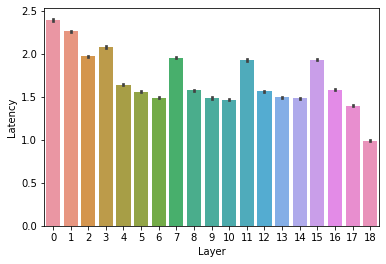

In [ ]:
x = [i for i in range(20)]
plt.xticks(x)
sns.barplot(x="Layer",y="Latency", data=df_vgg16, ci=95)


In [ ]:
#input_data_real = [3072, 65536, 16884, 32768, 8192, 16384, 16384, 16384, 4096, 8192, 8192, 8192, 2048, 2048, 2048, 2048, 512, 4096, 4096]

#imagenet
input_data_real = 64*np.array([3072, 65536, 16884, 32768, 8192, 16384, 16384, 16384, 4096, 8192, 8192, 8192, 2048, 2048, 2048, 2048, 512, 4096, 4096])

input_data_monotone = 64*np.array([65536, 65536, 32768, 32768, 16384, 16384, 16384, 16384, 8192, 8192, 8192, 8192, 2048, 2048, 2048, 2048, 512, 512, 512])

In [ ]:
input_data_real[0]

196608

In [ ]:
in_ratio = 1
min = input_data_real[0]
for i in input_data_real:
  if in_ratio < i/min:
    in_ratio = i/min

print(in_ratio)


21.333333333333332


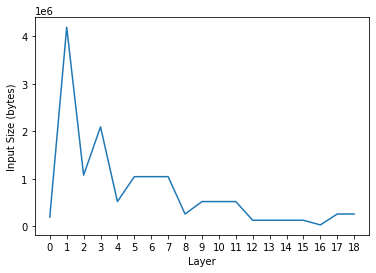

In [ ]:
ip_data = pd.DataFrame(np.array(input_data_real))
ip_data.reset_index(level=0, inplace=True)
ip_data.columns = ['Layer','Input Size (bytes)']
x = [i for i in range(len(input_data_real))]
plt.xticks(x)
sns.lineplot(x="Layer",y="Input Size (bytes)", data=ip_data, ci=95)


In [ ]:
def linkrate(i):
  link_rate = input_data_real[0]/sum(np.mean(vgg16_compute_values_local_array[i],axis=0))
  return link_rate

In [ ]:
def remote_compute_values():
  return [1+2*random.random() for i in range(10)]

In [ ]:
def local_compute_values(arr):
  return [2+4*random.random() for i in arr]

In [ ]:
# updated as we want to compare same general linkrate with a limit to how slow it can get, multiplicatively
# updated it back cause we want to check for uniformly distributed linkrate about same value with increasing max ratio

def randComm(ratio,link_rate):
  sq = math.sqrt(ratio)
  return link_rate/sq + random.random()*(link_rate*sq-link_rate/sq)

def randCommGamma(ratio , prev, comp):
  return max(0,prev-comp*ratio) + comp*(random.random()*(2*ratio))

def randMonoComm(ratio, link_rate):
  return (link_rate/(math.pow((ratio),(1/(ratio)))) + random.random()*((1-1/(math.pow((ratio),(1/(ratio))))*link_rate)))
  
def randMonoCommB(ratio, link_rate, max):
  return (max/10 + random.random()*(link_rate-max/10))

In [ ]:
comp_comm = []

In [ ]:
def prob(p):
  if random.random() < p:
    return 1
  else:
    return 0

In [ ]:
def ALPHAOPT(current_comms_uniform,current_comps_local,current_comps_remote):
  
  makespans = []
  # print(len(current_comps_local),current_comms_uniform,len(current_comms_uniform),len(current_comps_remote))
  # print(len(current_comms_uniform),len(current_comps_local),len(current_comps_remote))
  for i in range(len(current_comms_uniform)):
    makespans.append(sum(current_comps_local[:i])+current_comms_uniform[i]+sum(current_comps_remote[i:]))

  # print(np.min(makespans))

  return np.min(makespans), np.argmin(makespans)


In [ ]:
def ALGALPHA(current_comms_uniform,current_comps_local,current_comps_remote,r,counter,alg):

  Tr = sum(current_comps_remote)
  alm = 1
  alM = r

  best = sum(current_comps_local)
  c_best = current_comms_uniform[-1]

  for i in range(len(current_comms_uniform)):

      term0 = sum(current_comps_local[:i]) + sum(current_comps_remote[i:])
      term1 = sum(current_comps_local[:i]) + alm*sum(current_comps_remote[i:])
      term2 = sum(current_comps_local[:i]) + alM*sum(current_comps_remote[i:])
      # print(i,Tr,temp)
      # if i == 0:
      #   print(current_comms_uniform[i], math.sqrt(term1*term2) - term1,current_comms_uniform[i]+sum(current_comps_remote[i:]),sum(current_comps_local),(current_comms_uniform[i]+sum(current_comps_remote[i:])/sum(current_comps_local)))
      if current_comms_uniform[i] <= (math.sqrt(term1*term2) - term1):
          c_best = current_comms_uniform[i]
          best = term1 + c_best
          if i is not (len(current_comms_uniform)-1):
            # print(i)
            counter = counter + 1
          # print(i)
          return best, c_best, i, counter
  # print(len(current_comms_uniform))
  return best, c_best, len(current_comms_uniform), counter
  

In [ ]:
# def ALGALPHARAND(current_comms_uniform,current_comps_local,current_comps_remote,r,alg):

#   Tr = sum(current_comps_remote)
#   al = r
#   best = current_comms_uniform[0] + Tr

#   alTr = al*Tr
#   best = 100*Tr

#   for i in range(len(current_comms_uniform)):
#       T_i = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])  
#       if  T_i <= best:
#         best = T_i
#         # print(T_i, alg)
#         p = random.random()
#         q = Tr/(T_i)
#         if q > p:
#           return T_i, current_comms_uniform[i], i        
#   # print(sum(current_comps_local), alg)
#   return sum(current_comps_local),0, len(current_comms_uniform)

In [ ]:
# def ALGALPHARAND(current_comms_uniform,current_comps_local,current_comps_remote,r,alg):

#   Tr = sum(current_comps_remote)
#   al = r
#   best = current_comms_uniform[0] + Tr

#   alTr = al*Tr
#   best = al*Tr

#   for i in range(len(current_comms_uniform)):
#       T_i = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])  
#       if  T_i <= best:
#         best = T_i
#         # print(T_i, alg)
#         p = random.random()
#         q = (alTr-T_i)/(alTr-Tr)
#         if q > p:
#           return T_i, current_comms_uniform[i], i        
#   # print(sum(current_comps_local), alg)
#   return sum(current_comps_local),0, len(current_comms_uniform)

In [ ]:
def ALGALPHARAND(current_comms_uniform,current_comps_local,current_comps_remote,r,alg):

  Tr = sum(current_comps_remote)
  alm = 1
  alM = r
  al = alM/alm

  eps = [(-al* lambertw((1/(al*e  ))-1/e)).real, al-math.sqrt(al), al-1]
  ep = eps[alg]
  b = random.random()
  k = al - (al-1)/(math.exp(b*(al-ep)/al))

  cdf1 = (al/(al-ep))*(np.log((al-1)/ep))
  
  thresh = al
  
  if b <= cdf1:
    thresh = k
  else:
    thresh = al

  for i in range(len(current_comms_uniform)):
      T_i = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])  
      if  T_i <= thresh*Tr:
        # print(T_i, alg)
        return T_i, current_comms_uniform[i], i

  # print(sum(current_comps_local), alg)
  return sum(current_comps_local),0, len(current_comms_uniform)

In [ ]:
def ALGRANDCNUL(current_comms_uniform,current_comps_local,current_comps_remote,r):


  best = sum(current_comps_local)
  c_best = current_comms_uniform[-1]

  for i in range(len(current_comms_uniform)):
    
    al = r
    Ti = sum(current_comps_local[:i])+ current_comms_uniform[i] + sum(current_comps_remote[i:])
    Tic = sum(current_comps_local[:i])+sum(current_comps_remote[i:])
    Ticsqa = sum(current_comps_local[:i])+math.sqrt(al)*sum(current_comps_remote[i:])
    Tica = sum(current_comps_local[:i])+al*sum(current_comps_remote[i:])
    
    
    
    if (Ticsqa/Tic) <= (Tica/Ti):
      
      p = ((Tica/Ti)-(Ticsqa/Tic))/((Ti/Tic)-(Ticsqa/Tic)+(Tica/Ti)-1)
      num = random.random()
      
      if num <= p:
        best = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])
        c_best = current_comms_uniform[i]
        break

  return best, c_best

In [ ]:
def ALGRANDCNLP(current_comms_uniform,current_comps_local,current_comps_remote,r):

  best = sum(current_comps_local)
  c_best = current_comms_uniform[-1]
  
  temp = r*sum(current_comps_remote)

  for i in range(len(current_comms_uniform)):
    
    al = r
    T1 = sum(current_comps_local[:i])+sum(current_comps_remote[i:])
    T2 = sum(current_comps_local[:i])+al*sum(current_comps_remote[i:])
    Ci = current_comms_uniform[i]
    
    num = random.random()
    
    p = ((T2/(T1+Ci))-1)/(((T2/(T1+Ci))-1) + Ci/T1)

    T_i = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])
    
    if T_i <= temp:
      temp = T_i
      if num <= p:
        best = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])
        c_best = current_comms_uniform[i]
        break

  return best, c_best

In [ ]:
def ALGRANDCN(current_comms_uniform,current_comps_local,current_comps_remote,r):

  best = sum(current_comps_local)
  c_best = current_comms_uniform[-1]


  for i in range(len(current_comms_uniform)):
    
    Tr = sum(current_comps_remote)
    Ci = current_comms_uniform[i]
    al = r
    b = Ci/Tr

    num = random.random()
    p = (al-1-b)/(b*b + al-1)
    if num <= p:
      best = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])
      c_best = current_comms_uniform[i]
      break

  return best, c_best

In [ ]:
def ALGRANDC0(current_comms_uniform,current_comps_local,current_comps_remote,r):

  Tr = sum(current_comps_remote)
  C0 = current_comms_uniform[0]
  al = r

  best = sum(current_comps_local)
  c_best = current_comms_uniform[-1]

  if al < (1+current_comms_uniform[0]/Tr):
    
    for i in range(len(current_comps_local)):

        temp = sum(current_comps_local[:i]) + sum(current_comps_remote[i:])
        
        if current_comms_uniform[i] <= (math.sqrt(al*Tr*temp) - temp):
            c_best = current_comms_uniform[i]
            best = temp + c_best
            break
  else:
    num = random.random()
    p = (Tr*(Tr*(al-1)-C0))/(C0*C0 + Tr*Tr*(al-1))
    if num <= p:
      best = C0+Tr
      c_best = C0
    else:
      best = sum(current_comps_local)
      c_best = 0
  
  return best, c_best

In [ ]:
def min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote):
  best_i = 0
  best = current_comms_uniform[0] + sum(current_comps_remote)

  for i in range(len(current_comps_remote)+1):
    if sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:]) < best:
      best = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])
      best_i = i

  return best_i, best

Alpha vs Deterministic Alg (1-10)

In [ ]:
current_comps_local_expected = np.mean(vgg16_compute_values_local_array[1],axis=0)
current_comps_remote = vgg16_compute_values_remote_expected
print(sum(current_comps_local_expected)-sum(current_comps_remote))

32.27650157780019


In [ ]:
# alphas = [2,2.5,3,3.5,4,4.5]
alphas = [1.1,1.5,2,2.5,3,4,6]
# alphas = [2,4,8,16,32,64,128]
# alphas = [1/5,1/3,1/2,1,2,3,5]
# alphas = [1/10,2/10,3/10,4/10,5/10] #Epsilons


In [ ]:
for i in range(len(alphas)):
  al = alphas[i]
  ep = -al* lambertw((1/(al*e))-1/e)
  print("ep",ep.real, al/(al-ep.real),math.sqrt(al))

ep 0.03808391154359768 1.0358633906742634 1.0488088481701516
ep 0.21184086148355352 1.164452399668202 1.224744871391589
ep 0.46392190597306887 1.3020171355721026 1.4142135623730951
ep 0.7427086561160602 1.422644007609197 1.5811388300841898
ep 1.0409448291227394 1.5313504410682863 1.7320508075688772
ep 1.6794744038960918 1.723747415980189 2.0
ep 3.0664021575398186 2.045270116154798 2.449489742783178


In [ ]:
current_comps_remote+(4-1)*np.random.rand(len(current_comps_remote))

array([2.86549682, 3.57735491, 2.1340759 , 2.06574992, 3.91477891,
       2.77654002, 3.63927438, 2.07749193, 1.45968124, 1.93944436,
       3.10934171, 2.42122428, 2.41526213, 3.81731257, 3.86584768,
       2.21615025, 1.08498085, 3.23220477, 2.93082114])

In [ ]:
vgg16_compute_values_local_array[0][0]

array([2.65520595, 2.96711184, 1.51831595, 1.58028346, 1.50930763,
       1.72751022, 1.9202555 , 2.51421557, 1.94342337, 1.72049133,
       1.19041554, 1.79028601, 1.31701492, 1.69865887, 1.02405757,
       1.56851936, 1.72805827, 1.22519912, 1.08026538])

In [ ]:
current_comps_remote1 = np.random.rand(19)
current_comps_local1 = np.multiply(current_comps_remote1,1+(4-1)*np.random.rand(len(current_comps_remote1)))
current_comms_uniform1 = []
for p in range(len(current_comps_local1)):
 current_comms_uniform1.append(0.5*(sum(current_comps_local1)-sum(current_comps_remote1))+0.5*random.random()*(sum(current_comps_local1)-sum(current_comps_remote1))) #Non Monotone with Gamma 
current_comms_uniform1.append(0)

In [ ]:
opt_best1 = ALPHAOPT(current_comms_uniform1,current_comps_local1,current_comps_remote1)
alg_best11, c_cut11, alg_best1_point1, counter1 = ALGALPHA(current_comms_uniform1,current_comps_local1,current_comps_remote1,4, 0,0)
alg_best41_main = []
for i in range(100000):
  alg_best41, c_cut41, alg_best4_point1 = ALGALPHARAND(current_comms_uniform1,current_comps_local1,current_comps_remote1,4,0)
  alg_best41_main.append(alg_best41)


print(alg_best11/opt_best1, np.mean(alg_best41_main)/opt_best1)

[1.08001887        inf] [1.15028459        inf]


<ipython-input-49-52953261ac46>:9: RuntimeWarning: divide by zero encountered in true_divide
  print(alg_best11/opt_best1, np.mean(alg_best41_main)/opt_best1)


In [ ]:

samples = []
samples1 = []
ratio_theory = []
verify = []
verify1 = []

def generateSamples(i, c, d, flag, samples11, samples12, samples13, samples2, samples3, samples4, samples5, samples6, samples7, TALG11, TALG12, TALG13, TALG2, TALG3, TALG4, TALG5, TALG6, TALG7, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array, opt_points, det_points, rand_points):
  
  k=0
  l = 0
  r = alphas[i]
  enum = 0
  opts = [0] * 19

  for j in range(7000):
    #j = math.floor(random.random()*7000)
    #current_comms_uniform = [k/randComm(r,link_rate) for k in input_data_real] #Non Monotone
    # current_comms_uniform = [input_data_real[0]/linkrate(i)]
    # for k in input_data_monotone[:len(input_data_monotone)-1]:
    #   current_comms_uniform.append(randMonoComm(r,current_comms_uniform[-1])) #Monotone
    # current_comms_uniform = [input_data_real[0]/linkrate(i)]
    # for k in input_data_real[:len(input_data_real)-1]:
    #   current_comms_uniform.append(randComm(r,input_data_real[0]/linkrate(i))) #Non Monotone  
    # current_comms_uniform.append(0)
    

    # print(al,i,j)
    # print(current_comms_uniform)
    #Checking for Monotone
    # for x in range(1,len(current_comms_uniform)):
    #   if current_comms_uniform[x] > current_comms_uniform[x-1]:
    #     print("FAIL")
    #     break

    if flag == 0:
      current_comps_remote = vgg16_compute_values_remote_expected
      # current_comps_local = np.multiply(current_comps_remote,1+0.2*(r-1)*np.random.rand(len(current_comps_remote))) #Gives good perfromance for randomized
      # current_comps_local = np.multiply(current_comps_remote,1 + 0.8*(r-1) + 0.2*(r-1)*np.random.rand(len(current_comps_remote))) #Gives good perfromance for randomized
      # current_comps_local = np.multiply(current_comps_remote,math.sqrt(r)+(r-math.sqrt(r))*np.random.rand(len(current_comps_remote))) #Gives good perfromance for randomized
      # current_comps_local = np.multiply(current_comps_remote,1+(math.sqrt(r)-1)*np.random.rand(len(current_comps_remote))) #Gives good perfromance for randomized
      current_comps_local = np.multiply(current_comps_remote,1+2*(math.sqrt(r)-1)*np.random.rand(len(current_comps_remote))) #Gives good perfromance for randomized


      # current_comps_local = np.multiply(current_comps_remote,math.sqrt(r)-(math.sqrt(r)/20)+(math.sqrt(r)/10)*np.random.rand(len(current_comps_remote)))

      # current_comps_local = np.multiply(current_comps_remote,1-r+(2+r-(1-r))*np.random.rand(len(current_comps_remote)))

      # current_comps_local = vgg16_compute_values_local_array[i][j]
      # current_comps_local_expected = np.mean(vgg16_compute_values_local_array[i],axis=0)
    elif flag == 1:
      current_comps_remote = np.random.rand(19)
      current_comps_local = np.multiply(current_comps_remote,1+(r-1)*np.random.rand(len(current_comps_remote)))
    
    else:
      current_comps_remote = np.random.rand(19)
      current_comps_local = []
      for i in current_comps_remote:
        current_comps_local.append((1+random.random(r-1))*sum(current_comps_remote))

    # print("Diff",current_comps_local_expected-current_comps_remote)
    # print(current_comps_local_expected,current_comps_remote)
    #print(np.shape(vgg16_compute_values_local_array))
    # current_comms_uniform = [(1-c)*(sum(current_comps_local_expected)-sum(current_comps_remote)) + 2*c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))]
    r_layer = random.random()*len(current_comps_local)
    current_comms_uniform = []
    
    if sum(current_comps_local) < math.sqrt(r)*sum(current_comps_remote):
      enum = enum + 1

    u = len(current_comps_local)*1 #random.random()

    linkrate_min = input_data_real[0]/((r-1)*sum(current_comps_remote)/2)


    rand = random.random()


    for p in range(len(current_comps_local)):
    

      # current_comms_uniform.append(max(current_comms_uniform[-1]-(current_comps_local[p]-current_comps_remote[p])-current_comms_uniform[-1]/100,0.01))
      # if r_layer < p+1:
      #   current_comms_uniform.append(sum(current_comps_local_expected)-sum(current_comps_remote))
      # else:
      #   current_comms_uniform.append(0)
      # current_comms_uniform.append(randMonoCommB(r,current_comms_uniform[-1],current_comms_uniform[0]))
      # current_comms_uniform.append(randMonoComm(r,current_comms_uniform[-1]))
      # current_comms_uniform.append(randCommGamma(r,current_comms_uniform[-1], current_comps_local_expected[p]-current_comps_remote[p])) #Non Monotone with Gamma    
      # current_comms_uniform.append((1-c)*(sum(current_comps_local_expected)-sum(current_comps_remote)) + 2*c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
      
      # if p < u:

      if rand < 0:

        term1 = sum(current_comps_local[:p]) + sum(current_comps_remote[p:])
        term2 = sum(current_comps_local[:p]) + r*sum(current_comps_remote[p:])
        if p == 0:
        #   print("Terms",al*term1, term1, term2, al)
          current_comms_uniform.append((math.sqrt(term1*term2) - (term1))+0.000000001)
        else:
          current_comms_uniform.append(sum(current_comps_local))
        
      else:

        # Rl = (r-1)*sum(current_comps_remote)
        # Rl = abs(sum(current_comps_local)-sum(current_comps_remote))
        # current_comms_uniform.append(Rl/2 + random.random()*Rl) #Non Monotone with Gamma 

        Rl = (math.sqrt(r)-1)*sum(current_comps_remote)
        # current_comms_uniform.append(Rl-Rl/10 + (Rl/5)*random.random())
        current_comms_uniform.append((2*Rl)*random.random())

        # current_comms_uniform.append(Rl-0.000001)




      
      # term1 = sum(current_comps_local[:0]) + sum(current_comps_remote[0:])
      # term2 = sum(current_comps_local[:0]) + r*sum(current_comps_remote[0:])
      # current_comms_uniform.append((math.sqrt(term1*term2) - (term1))+random.random()*(np.max(math.sqrt(term1*term2)-sum(current_comps_local))))
      
      # term1 = sum(current_comps_local[:0]) + sum(current_comps_remote[0:])
      # term2 = sum(current_comps_local[:0]) + r*sum(current_comps_remote[0:])
      # # current_comms_uniform.append((math.sqrt(term1*term2) - (term1))-0.000000001+0.000000100*random.random())
      # current_comms_uniform.append((math.sqrt(term1*term2) - (term1))+0.000000001)

      # if p == 0:
      #   #   print("Terms",al*term1, term1, term2, al)
      #   current_comms_uniform.append((math.sqrt(term1*term2) - (term1))+0.000000001)
      # else:
      #   current_comms_uniform.append(sum(current_comps_local))

      # term1 = sum(current_comps_local[:0]) + sum(current_comps_remote[0:])
      # term2 = sum(current_comps_local[:0]) + r*sum(current_comps_remote[0:])
      # # current_comms_uniform.append((math.sqrt(term1*term2) - (term1))-0.000000001+0.000000100*random.random())
      # current_comms_uniform.append((math.sqrt(term1*term2) - (term1))+random.random()*((math.sqrt(term1*term2) - (term1))/2))
      
      # term1 = sum(current_comps_local[:p]) + sum(current_comps_remote[p:])
      # term2 = sum(current_comps_local[:p]) + r*sum(current_comps_remote[p:])
      # if random.random() < 1/2:
      #   current_comms_uniform.append((math.sqrt(term1*term2) - (term1))/2)
      # else:
      #   current_comms_uniform.append(sum(current_comps_local)-sum(current_comps_remote))
      
      # v = (r-1)/2
      # current_comms_uniform.append((2*v/3)*sum(current_comps_remote)+random.random()*(2*v/3)*sum(current_comps_remote)) #Non Monotone with Gamma     
      
      
      # v1 = 2*(r-1)/5
      # current_comms_uniform.append(v1*(sum(current_comps_remote)) + random.random()*(1.5*v1*(sum(current_comps_remote))))

      # current_comms_uniform.append(random.random()*((sum(current_comps_local)-sum(current_comps_remote))))

      # current_comms_uniform.append((math.sqrt(r)-1)*sum(current_comps_remote))/2+random.random()*((math.sqrt(r)-1)/2)*sum(current_comps_remote))

      # current_comms_uniform.append((math.sqrt(r)-1)*sum(current_comps_remote)+0.000000001*random.random()*(sum(current_comps_local)-math.sqrt(r)*sum(current_comps_remote))) #Non Monotone with Gamma 
      
      
      # current_comms_uniform.append(c*(sum(current_comps_local)-sum(current_comps_remote))+d*random.random()*(sum(current_comps_local)-sum(current_comps_remote))) #Non Monotone with Gamma 
      # current_comms_uniform.append(c*((r-1)*sum(current_comps_remote))+d*random.random()*(r-1)*sum(current_comps_remote))
      # current_comms_uniform.append(c*((r-1)/2)*sum(current_comps_remote)+d*random.random()*((r-1)/2)*sum(current_comps_remote))
      
      # val = (r-1)/4
      # current_comms_uniform.append(random.random()*val+val/2) #Non Monotone with Gamma 

      # lr_current = 1*linkrate_min/2 + 1*(linkrate_min)*random.random()/1
      # current_comms_uniform.append(input_data_real[p]/lr_current)

      # current_comms_uniform.append(random.random()*c*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
    # print("1",(sum(current_comps_local)-sum(current_comps_remote)))
    current_comms_uniform.append(0)
    # print(current_comms_uniform)

    # print("2",current_comms_uniform)
    # print("Comms",(current_comms_uniform),"Local",(current_comps_local),"Remote",(current_comps_remote))

    # print(len(current_comms_uniform),len(current_comps_local),len(current_comps_remote))
    # print("comms",len(current_comms_uniform))
    # print(len(current_comps_local))
    # print(len(current_comps_remote))
    opt_best, opt_best_point = ALPHAOPT(current_comms_uniform,current_comps_local,current_comps_remote)



    # alg_best_point, alg_best, c_cut, best_point, best, c_opt = ALG(current_comms_uniform,current_comps_local,current_comps_remote)
    counter = 0
    alg_best11, c_cut11, alg_best1_point, counter = ALGALPHA(current_comms_uniform,current_comps_local,current_comps_remote,r, counter,0.5)
    alg_best12, c_cut12, alg_best2_point, counter = ALGALPHA(current_comms_uniform,current_comps_local,current_comps_remote,r, counter,1)
    alg_best13, c_cut13, alg_best3_point, counter = ALGALPHA(current_comms_uniform,current_comps_local,current_comps_remote,r, counter,2)
    # if counter is 0:
    #   print("Fail")
    alg_best4, c_cut4, alg_best4_point = ALGALPHARAND(current_comms_uniform,current_comps_local,current_comps_remote,r,0)
    # alg_best5, c_cut5, alg_best5_point = ALGALPHARAND(current_comms_uniform,current_comps_local,current_comps_remote,r,1)
    # alg_best6, c_cut6, alg_best6_point = ALGALPHARAND(current_comms_uniform,current_comps_local,current_comps_remote,r,2)
    alg_best5, c_cut5 = ALGRANDCNUL(current_comms_uniform,current_comps_local,current_comps_remote,r)
    alg_best6, c_cut6 = ALGRANDCNLP(current_comms_uniform,current_comps_local,current_comps_remote,r)
    alg_best7, c_cut7 = ALGRANDCN(current_comms_uniform,current_comps_local,current_comps_remote,r)
    # print(opt_best_point,alg_best_point)
    # print(current_comms_uniform,current_comps_local,current_comps_remote)
    # print("OPT",opt_best_point, opt_best)
    # print("ALG",alg_best_point,alg_best, best_point)
    # print(sum(current_comps_local))
    # print("ALG1",alg_best_point1,alg_best1, best_point1)
    # if opt_best_point != alg_best_point:
    #   print("Opt best point from algo",best_point)
    #   print("Opt best point",opt_best_point)
    #   print("Alg best point",alg_best_point)

    # rho_theory_best = 1 + (1-p)*c_cut/(c_opt + sum(current_comps_remote))
    # M = len(mins)
    # performance_best = math.pow((1-p),M)*algI
    # for m in range(len(mins)):
    #   min_m = sum(current_comps_local[:mins[m]]) + current_comms_uniform[mins[m]] +  sum(current_comps_remote[mins[m]:])
    #   min_pair = np.minimum(alg_best,min_m)
    #   performance_best = performance_best + p*(math.pow((1-p),(M-m-1)))*min_pair

    
    # if offl < length:
    #   alg_best1 = sum(current_comps_local[:offl]) + current_comms_uniform[offl] + sum(current_comps_remote[offl:])
    # else :
    #   alg_best1 = sum(current_comps_local[:opt_best_point]) + current_comms_uniform[opt_best_point] + current_comms_uniform[opt_best_point] + sum(current_comps_remote[opt_best_point:])

    alg_best2 = sum(current_comps_local[:0]) + current_comms_uniform[0] + sum(current_comps_remote[0:])
    alg_best3 = sum(current_comps_local[:len(current_comps_local)]) + current_comms_uniform[len(current_comps_local)] + sum(current_comps_remote[len(current_comps_local):])

    # print(alg_best1, opt_best, opt_best*math.sqrt(r))

    # print(current_comms_uniform[0], sum(current_comps_remote[0:]), alg_best2, opt_best, opt_best_point)
    # print(current_comms_uniform,current_comps_local,current_comps_remote)

    k = k + 1

    # if opt_best_point != 0:
    #   l = l + 1

    opt_points.append(opt_best_point)
    det_points.append(alg_best2_point)
    rand_points.append(alg_best4_point)

    samples11.append(alg_best11/opt_best)
    samples12.append(alg_best12/opt_best)
    samples13.append(alg_best13/opt_best)
    samples2.append(alg_best2/opt_best)
    samples3.append(alg_best3/opt_best)
    samples4.append(alg_best4/opt_best)
    samples5.append(alg_best5/opt_best)
    samples6.append(alg_best6/opt_best)
    samples7.append(alg_best7/opt_best)
    # print(alg_best1/opt_best,alg_best2/opt_best,alg_best3/opt_best,alg_best4/opt_best,alg_best5/opt_best,opt_best/opt_best)
    TALG11.append(alg_best11)
    TALG12.append(alg_best12)
    TALG13.append(alg_best13)
    TALG2.append(alg_best2)
    TALG3.append(alg_best3)
    TALG4.append(alg_best4)
    TALG5.append(alg_best5)
    TALG4.append(alg_best6)
    TALG5.append(alg_best7)
    TOPT.append(opt_best)
    # opt_offload.append(opt_best_point)
    # alg_offload.append(alg_best_point)
    # c_opt_array.append(c_opt)
    # c_cut_array.append(c_cut)
    # ratio_theory.append((1+best_R/best_comm)*(1+r)*(e/(e-1))) # non monotone
    # try:
    #   ro = 1+best_R/best_comm
    #   # print(ro, best_comm)
    # except:
    #   print(best_R,best_comm)
  print(l,k)
  print(enum)
  return (samples11, samples12, samples13, samples2, samples3, samples4, samples5, samples6, samples7, TALG11, TALG12, TALG13, TALG2, TALG3, TALG4, TALG5, TALG6, TALG7, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array, opt_points, det_points, rand_points)

In [ ]:
final1 = []
final2 = []
final3 = []
final4 = []
final5 = []
samples11_final = []
samples12_final = []
samples13_final = []
samples2_final = []
samples3_final = []
samples4_final = []
samples5_final = []
samples6_final = []
samples7_final = []
TALG11_final = []
TALG12_final = []
TALG13_final = []
TALG2_final = []
TALG3_final = []
TALG4_final = []
TALG5_final = []
TALG6_final = []
TALG7_final = []
TOPT_final = []
opt_offload_final = []
alg_offload_final = []
c_opt_array_final = []
c_cut_array_final = []

opt_points_final = []
det_points_final = []
rand_points_final = []
# gammas = [2, 4, 8, 10,20]

algs = ["Alpha-1/2", "Alpha-1", "Alpha-2", "Always Offload", "Never Offload", "Alpha Randomized epsilon", "RandCNUL", "RandCNLP", "RandCN"]
makespans = ["TALGD1/2","TALGD1","TALGD2","TALGAO","TALGNO", "TALGR0", "TALGR1", "TALGR2", "TRANDC0","TOPT"]

for i in range(7):
  samples11 = []
  samples12 = []
  samples13 = []
  samples2 = []
  samples3 = []
  samples4 = []
  samples5 = []
  samples6 = []
  samples7 = []
  TALG11 = []
  TALG12 = []
  TALG13 = []
  TALG2 = []
  TALG3 = []
  TALG4 = []
  TALG5 = []
  TALG6 = []
  TALG7 = []
  TOPT = []
  opt_offload = []
  alg_offload = []
  c_cut_array = []
  c_opt_array = []
  opt_points = []
  det_points = []
  rand_points = []
  
  samples11, samples12, samples13, samples2, samples3, samples4, samples5, samples6, samples7, TALG11, TALG12, TALG13, TALG2, TALG3, TALG4, TALG5, TALG6, TALG7, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array, opt_points, det_points, rand_points = generateSamples(i,0,1,0, samples11, samples12, samples13, samples2, samples3, samples4, samples5, samples6, samples7, TALG11, TALG12, TALG13, TALG2, TALG3, TALG4, TALG5, TALG6, TALG7, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array, opt_points, det_points, rand_points) #Non Monotone with Max/Min = r
  
  samples11_final.append(samples11)
  samples12_final.append(samples12)
  samples13_final.append(samples13)
  samples2_final.append(samples2)
  samples3_final.append(samples3)
  samples4_final.append(samples4)
  samples5_final.append(samples5)
  samples6_final.append(samples6)
  samples7_final.append(samples7)
  TALG11_final.append(TALG11)
  TALG12_final.append(TALG12)
  TALG13_final.append(TALG13)
  TALG2_final.append(TALG2)
  TALG3_final.append(TALG3)
  TALG4_final.append(TALG4)
  TALG5_final.append(TALG5)
  TALG6_final.append(TALG6)
  TALG7_final.append(TALG7)
  TOPT_final.append(TOPT)
  opt_offload_final.append(opt_offload)
  alg_offload_final.append(alg_offload)
  c_opt_array_final.append(c_opt_array)
  c_cut_array_final.append(c_cut_array)
  opt_points_final.append(opt_points)
  det_points_final.append(det_points)
  rand_points_final.append(rand_points)

final1.append(samples11_final)
final1.append(samples12_final)
final1.append(samples13_final)
final1.append(samples2_final)
final1.append(samples3_final)
final1.append(samples4_final)
final1.append(samples5_final)
final1.append(samples6_final)
final1.append(samples7_final)
final2.append(TALG11_final)
final2.append(TALG12_final)
final2.append(TALG13_final)
final2.append(TALG2_final)
final2.append(TALG3_final)
final2.append(TALG4_final)
final2.append(TALG5_final)
final2.append(TALG6_final)
final2.append(TALG7_final)
final2.append(TOPT_final)


<ipython-input-38-fde65c845615>:19: RuntimeWarning: invalid value encountered in double_scalars
  p = ((Tica/Ti)-(Ticsqa/Tic))/((Ti/Tic)-(Ticsqa/Tic)+(Tica/Ti)-1)
<ipython-input-39-0443651ab9c6>:17: RuntimeWarning: invalid value encountered in double_scalars
  p = ((T2/(T1+Ci))-1)/(((T2/(T1+Ci))-1) + Ci/T1)


0 7000
3474
0 7000
3483
0 7000
3491
0 7000
3544
0 7000
3467
0 7000
3519
0 7000
3447


In [ ]:
np.max(opt_points_final[2])

19

In [ ]:
# opt_points_final

In [ ]:
import numpy

In [ ]:
p31 = numpy.asarray(opt_points_final)
za = (p31 < 10).sum()

In [ ]:
za

46859

In [ ]:
hist = np.histogram(opt_points_final[2],bins=np.arange(19))[0]

(array([1615., 1230.,  996.,  781.,  612.,  464.,  380.,  288.,  198.,
         135.,   96.,   65.,   41.,   26.,   17.,   11.,    6.,    3.,
          36.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <a list of 19 Patch objects>)

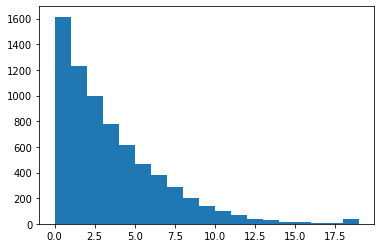

In [ ]:
plt.hist(opt_points_final[0], bins=19)

In [ ]:
df = pd.DataFrame(opt_points_final)

In [ ]:
df

0     1     2     3     4     5     6     7     8     9     ...  6990  \
0     7     0     0     1     0     3     3     3     5     3  ...     0   
1     4     3     4     2     2     1     6     0     3     1  ...     5   
2    13     4     1     6     1     2     2     7     2     1  ...     2   
3     1     2     1     0     6     3     3     0     1     7  ...     2   
4     3     3     1     4     7     0     0     3     3     5  ...     1   
5     1     1     4     0     3     6     7     1     5     4  ...     9   
6     0     1     1     0    10     2     0     6     0     0  ...     0   

   6991  6992  6993  6994  6995  6996  6997  6998  6999  
0     3     3     3     1     1     5     6     0     1  
1     6     2     0     2     0     0     0     1     3  
2     2     5     4     5     5     0     5     0     0  
3     4    12     0     1     7     0     1     4    19  
4     3     6     2     1     4     2     1    10     1  
5     4     1     2     3     3     0     4     8     2  
6     1     0     1     0     2     3     0     3     4  

[7 rows x 7000 columns]

(array([1.598e+03, 1.301e+03, 1.019e+03, 7.920e+02, 5.560e+02, 5.040e+02,
        3.450e+02, 2.740e+02, 1.760e+02, 1.350e+02, 1.100e+02, 6.400e+01,
        4.600e+01, 2.400e+01, 1.000e+01, 1.100e+01, 6.000e+00, 1.000e+00,
        2.800e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <a list of 19 Patch objects>)

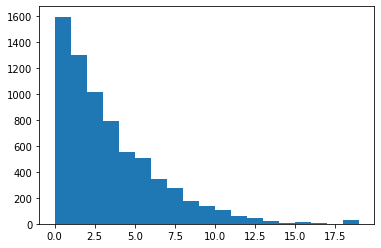

In [ ]:
plt.hist(opt_points_final[2], bins=19)

(array([3.476e+03, 1.650e+03, 8.300e+02, 4.550e+02, 2.280e+02, 1.370e+02,
        8.600e+01, 3.900e+01, 2.800e+01, 2.200e+01, 1.700e+01, 8.000e+00,
        4.000e+00, 5.000e+00, 1.000e+00, 1.000e+00, 5.000e+00, 0.000e+00,
        8.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <a list of 19 Patch objects>)

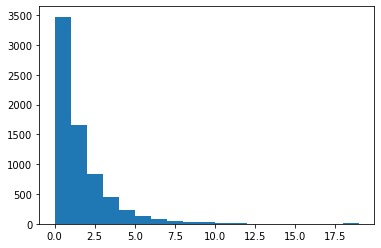

In [ ]:
plt.hist(det_points_final[2], bins=19)

(array([3.748e+03, 6.410e+02, 3.870e+02, 2.050e+02, 1.280e+02, 8.300e+01,
        5.700e+01, 2.700e+01, 2.800e+01, 1.800e+01, 8.000e+00, 5.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.662e+03]),
 array([ 0.        ,  1.05263158,  2.10526316,  3.15789474,  4.21052632,
         5.26315789,  6.31578947,  7.36842105,  8.42105263,  9.47368421,
        10.52631579, 11.57894737, 12.63157895, 13.68421053, 14.73684211,
        15.78947368, 16.84210526, 17.89473684, 18.94736842, 20.        ]),
 <a list of 19 Patch objects>)

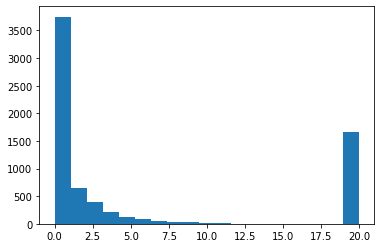

In [ ]:
plt.hist(rand_points_final[2], bins=19)

(array([3.748e+03, 6.410e+02, 3.870e+02, 2.050e+02, 1.280e+02, 8.300e+01,
        5.700e+01, 2.700e+01, 2.800e+01, 1.800e+01, 8.000e+00, 5.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.662e+03]),
 array([ 0.        ,  1.05263158,  2.10526316,  3.15789474,  4.21052632,
         5.26315789,  6.31578947,  7.36842105,  8.42105263,  9.47368421,
        10.52631579, 11.57894737, 12.63157895, 13.68421053, 14.73684211,
        15.78947368, 16.84210526, 17.89473684, 18.94736842, 20.        ]),
 <a list of 19 Patch objects>)

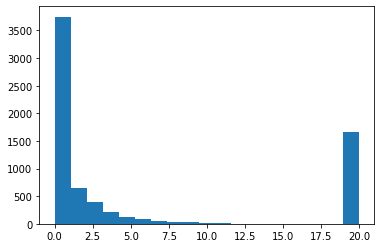

In [ ]:
plt.hist(rand_points_final[2], bins=19)

In [ ]:
compiled = []
for k in range(9):
  if k==1 or k==4 or k == 3 or k==5:#or k==3 or k==5 # or k==6 or k==7 or k==8: # and k!=7 alpha-1 same as always offload
    for i in range(7):
      for j in range(7000):
        compiled.append([final1[k][i][j], alphas[i], algs[k]])

In [ ]:
df_max = pd.DataFrame(np.amax(final1,axis=2))
df_max

0         1         2         3         4         5         6
0  1.045319  1.213209  1.375827  1.518071  1.701340  1.845934  2.176313
1  1.045319  1.213209  1.375827  1.518071  1.701340  1.845934  2.176313
2  1.045319  1.213209  1.375827  1.518071  1.701340  1.845934  2.176313
3  1.094960  1.422157  1.771504  2.104320  2.405061  2.920105  3.655645
4  1.066359  1.300713  1.555370  1.794910  2.013079  2.359762  3.010995
5  1.057996  1.265087  1.475935  1.678578  1.876812  2.308057  2.840938
6  1.055696  1.206065  1.423092  1.522638  1.743391  1.841705  2.323979
7  1.089052  1.383249  1.725297  1.986111  2.294498  2.805265  3.574553
8  1.087681  1.431216  1.811966  2.103284  2.417899  2.690651  3.479017

In [ ]:
df_mean = pd.DataFrame(np.mean(final1,axis=2))
df_mean

0         1         2         3         4         5         6
0  1.007151  1.032059  1.055531  1.075327  1.092987  1.116913  1.153546
1  1.007151  1.032059  1.055531  1.075327  1.092987  1.116913  1.153546
2  1.007151  1.032059  1.055531  1.075327  1.092987  1.116913  1.153546
3  1.028869  1.124120  1.218251  1.287024  1.350380  1.438122  1.566377
4  1.029032  1.127366  1.224636  1.299085  1.364286  1.469375  1.615743
5  1.009925  1.042918  1.075832  1.098955  1.124987  1.157743  1.206122
6  1.005041  1.021144  1.035392  1.050002  1.061300  1.076611  1.102526
7  1.013113  1.057964  1.101911  1.136190  1.167152  1.214008  1.280213
8  1.016954  1.074734  1.131349  1.176975  1.216383  1.267040  1.345446

In [ ]:
df_main1 = pd.DataFrame(compiled, columns = ['Performance', 'Error', 'Alg'])

In [ ]:
df_main1.shape

(196000, 3)

In [ ]:
df_main1.head()

Performance  Error      Alg
0     1.009712    1.1  Alpha-1
1     1.000000    1.1  Alpha-1
2     1.000000    1.1  Alpha-1
3     1.010519    1.1  Alpha-1
4     1.000000    1.1  Alpha-1

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

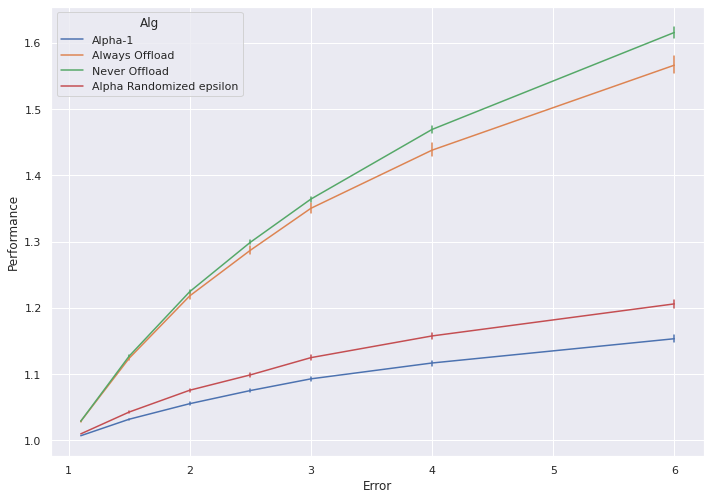

In [ ]:
sns.lineplot(x="Error",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Range about 2*(sqrt(r)-1)Pkr and 2*(sqrt(r)-1)sum_remote

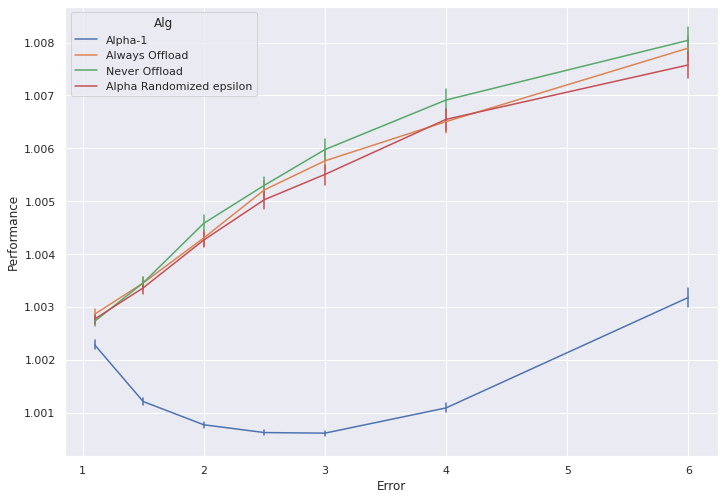

In [ ]:
sns.lineplot(x="Error",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Old Rand

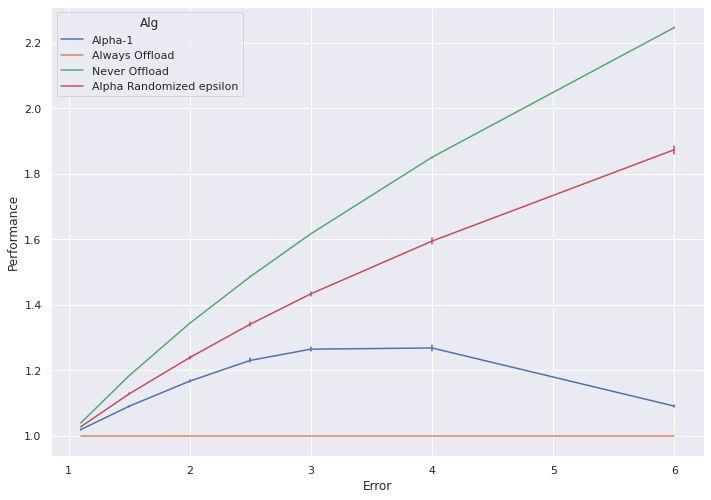

In [ ]:
sns.lineplot(x="Error",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Old Rand

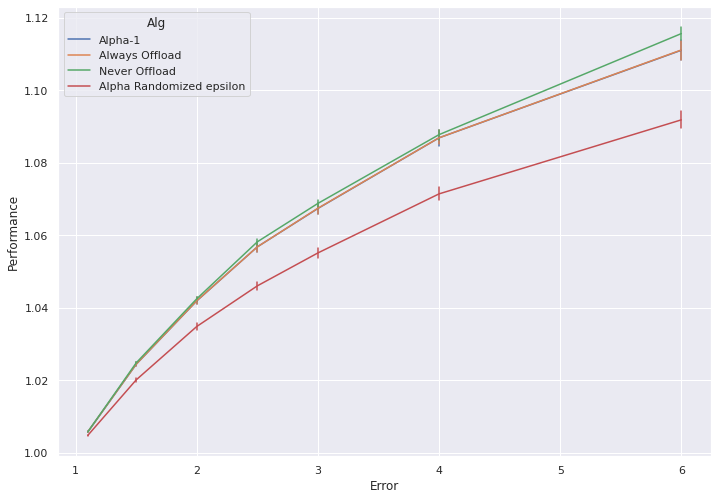

In [ ]:
sns.lineplot(x="Error",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Mid Low Pks = sqrt(r)Pkr with avg C0 = Sum_local-Sum_remote

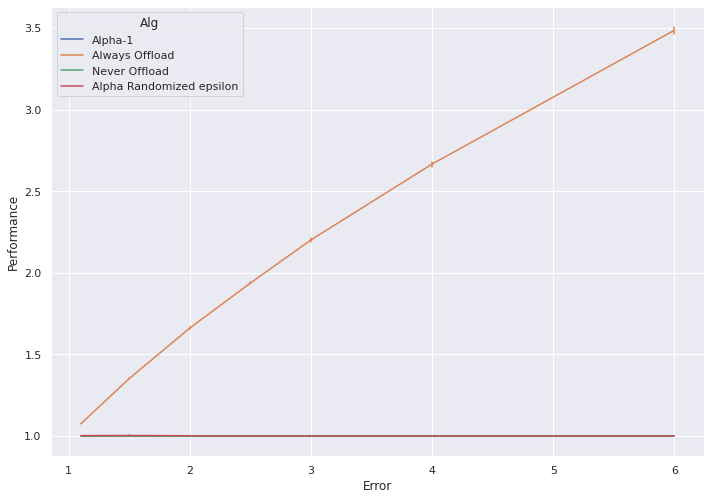

In [ ]:
sns.lineplot(x="Error",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Mid Low Pks with avg C0 = (r-1)Sum_remote

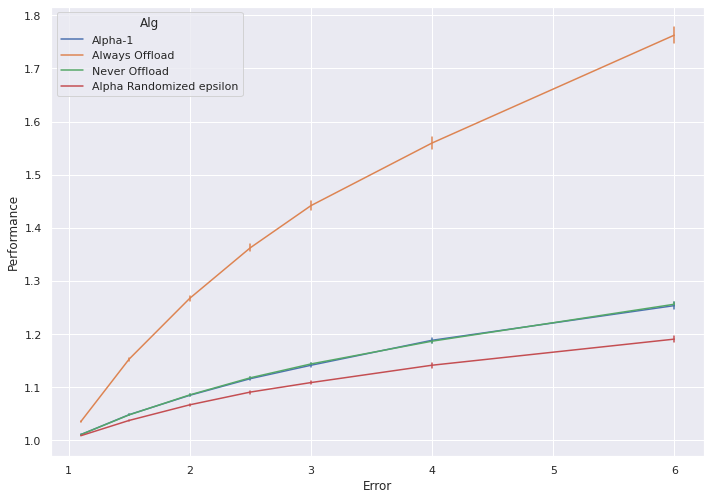

In [ ]:
sns.lineplot(x="Error",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Mid Low Pks with avg C0 = (sqrt(r)-1)Sum_remote Biggest range

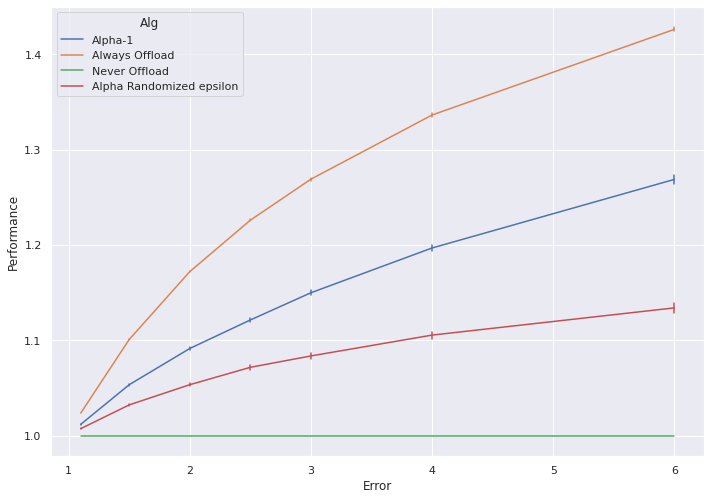

In [ ]:
sns.lineplot(x="Error",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Mid Low Pks with avg C0 = (sqrt(r)-1)Sum_remote Bigger range

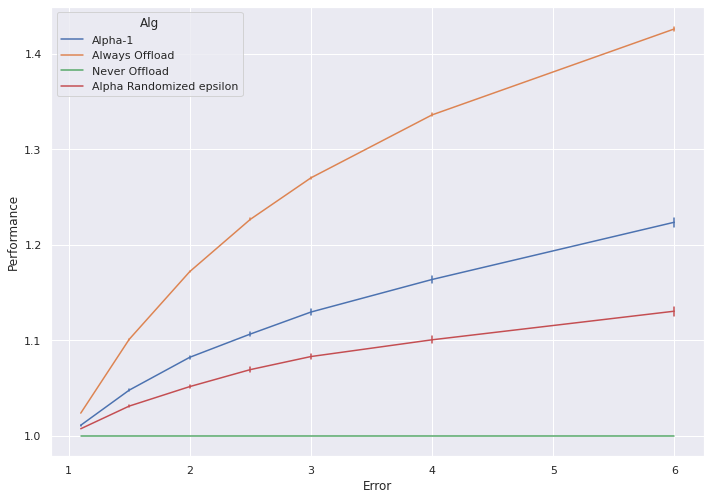

In [ ]:
sns.lineplot(x="Error",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Mid Low Pks with avg C0 = (sqrt(r)-1)Sum_remote Bigger range

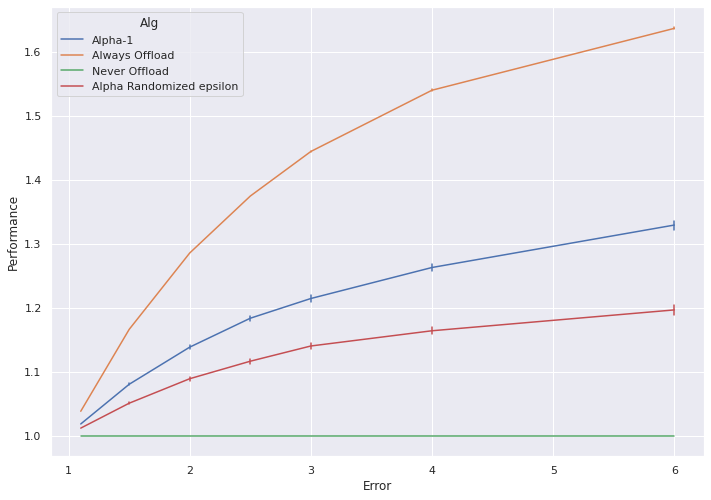

In [ ]:
sns.lineplot(x="Error",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Lower Pks

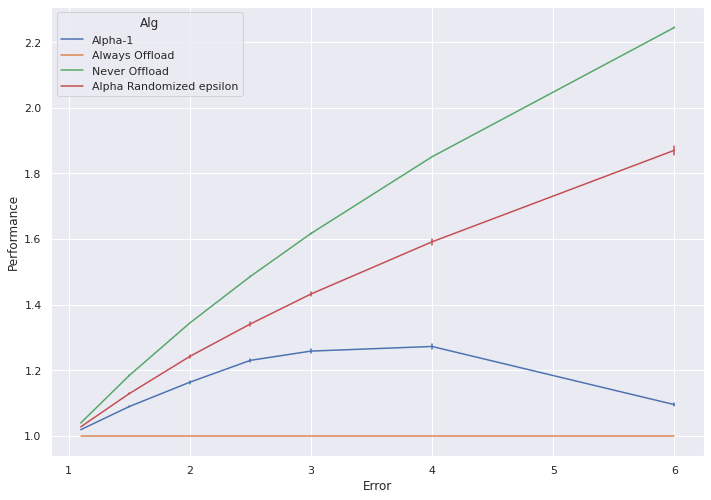

In [ ]:
sns.lineplot(x="Error",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Higher Pks

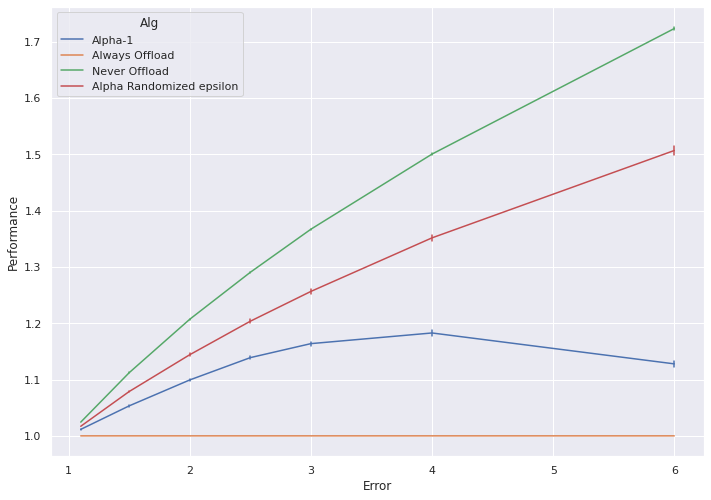

In [ ]:
sns.lineplot(x="Error",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Mid High Pk

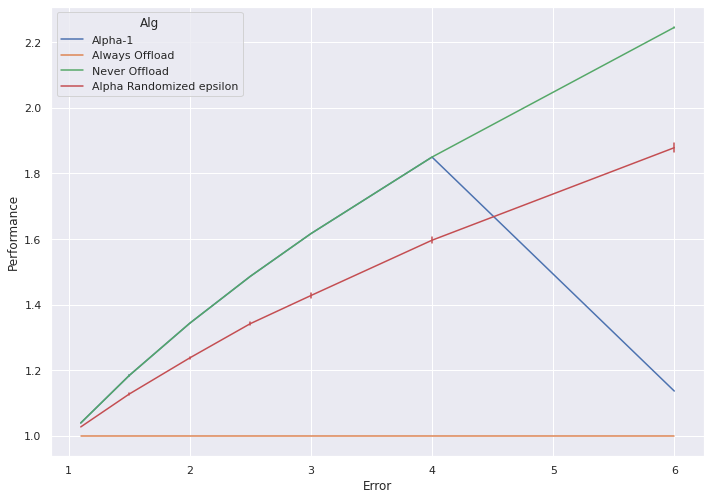

In [ ]:
sns.lineplot(x="Error",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Old Rand

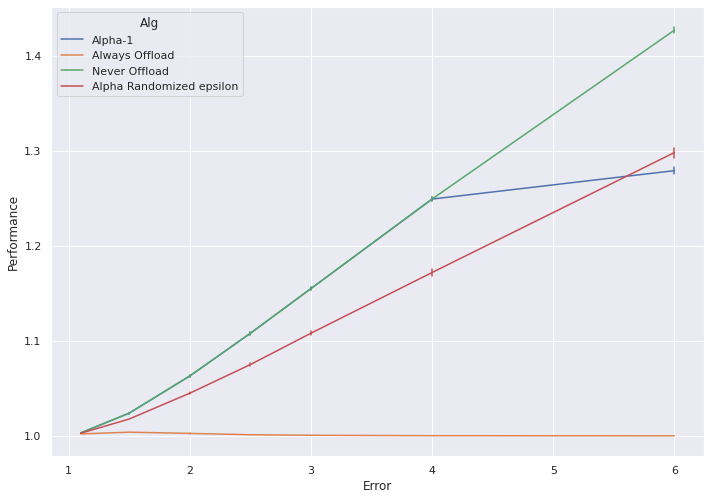

In [ ]:
sns.lineplot(x="Error",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Old Rand

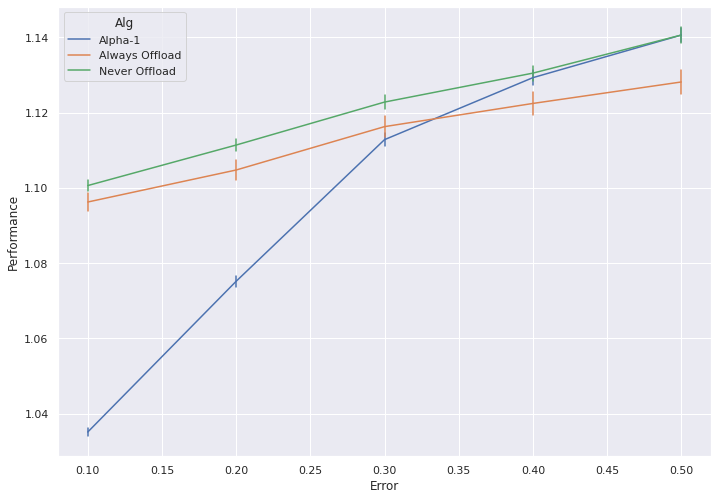

In [ ]:
sns.lineplot(x="Error",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Old Rand

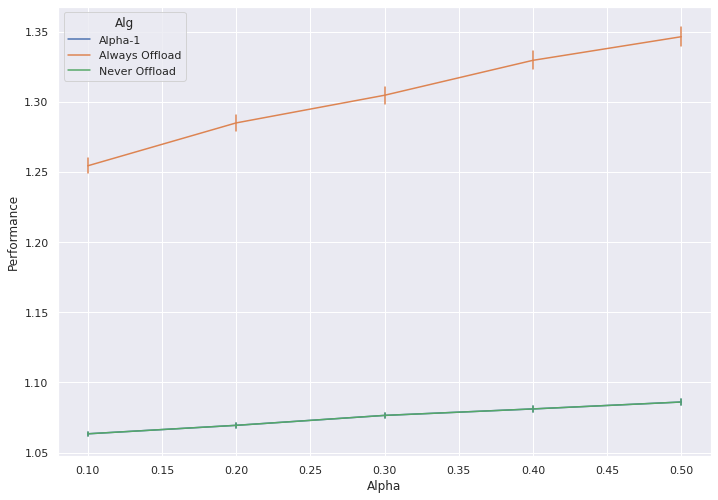

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Old Rand

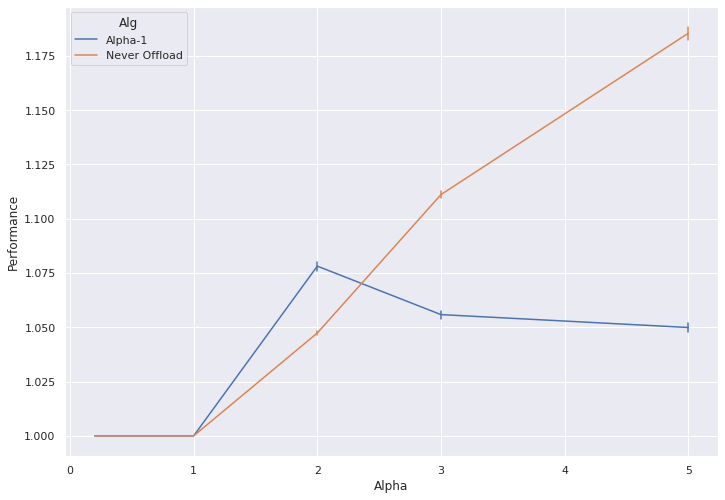

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # New Rand Unknown Alpha 1/19

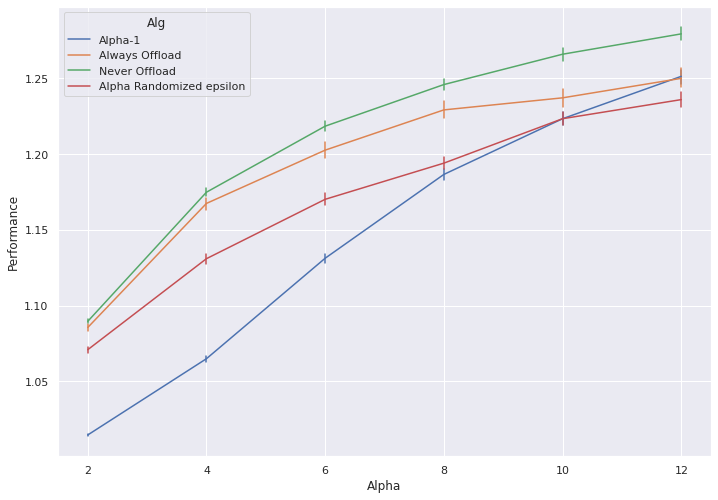

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # New Rand Unknown Alpha

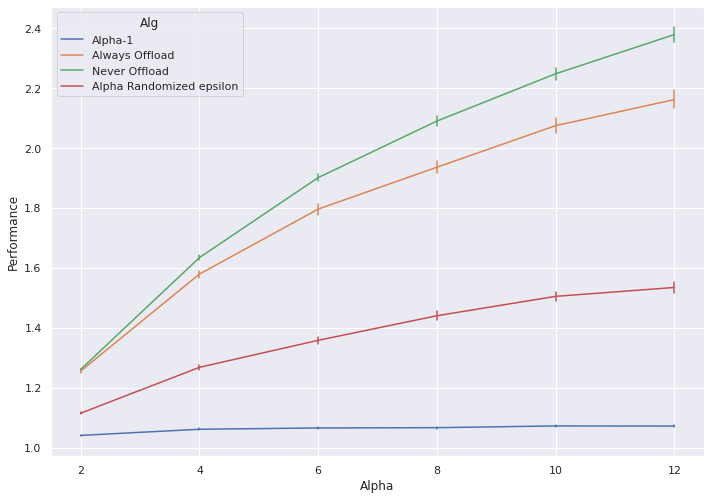

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # New Rand Double range

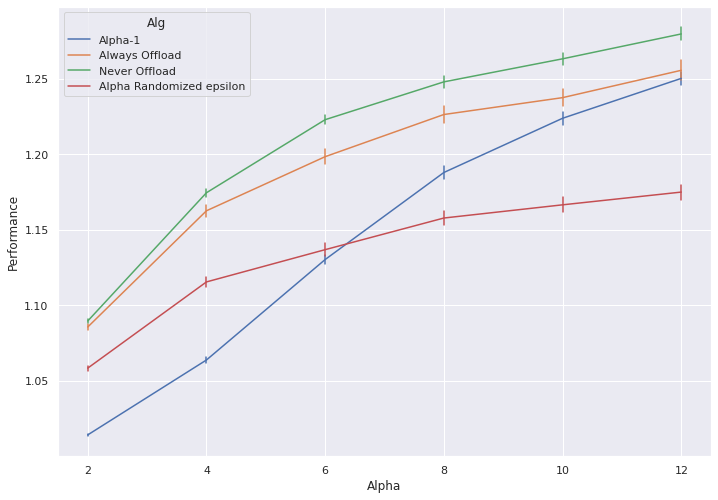

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # New Rand

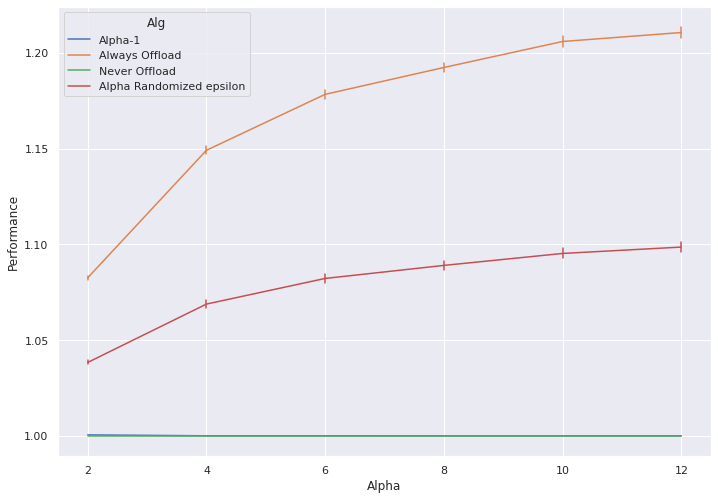

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # New Rand High

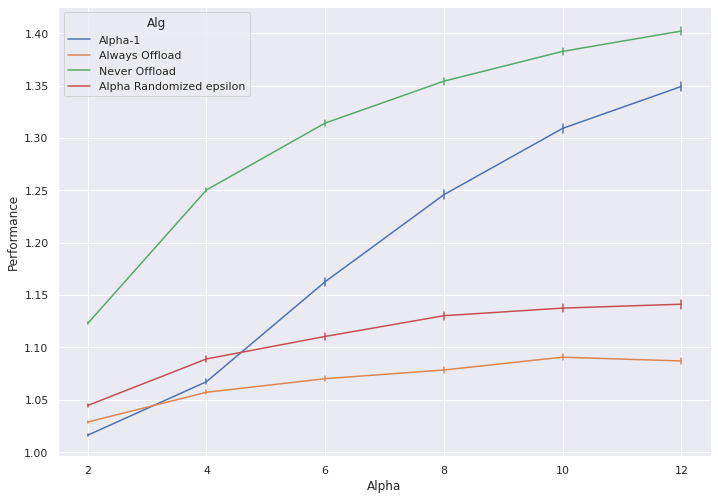

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # New Rand Low

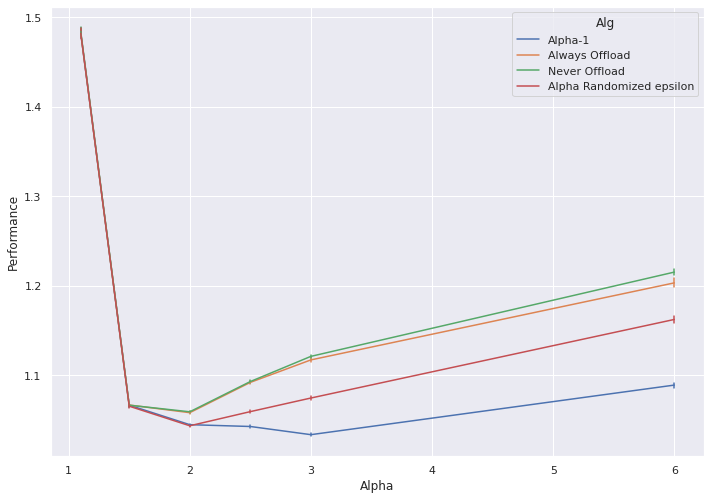

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # 3/4 and 1/2

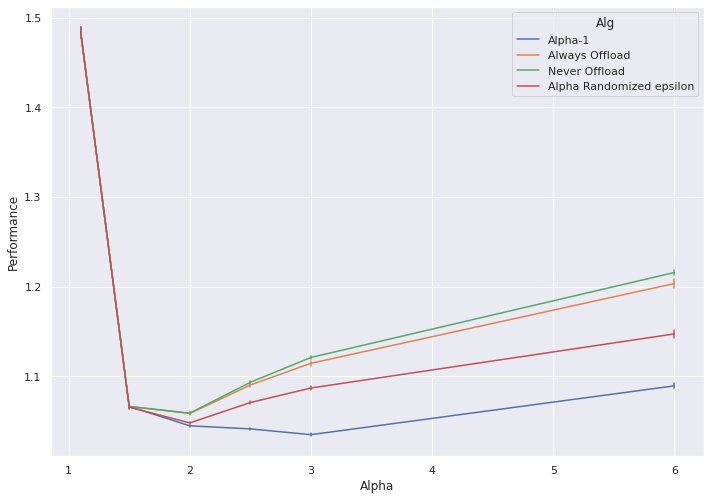

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # 3/4 and 1/2

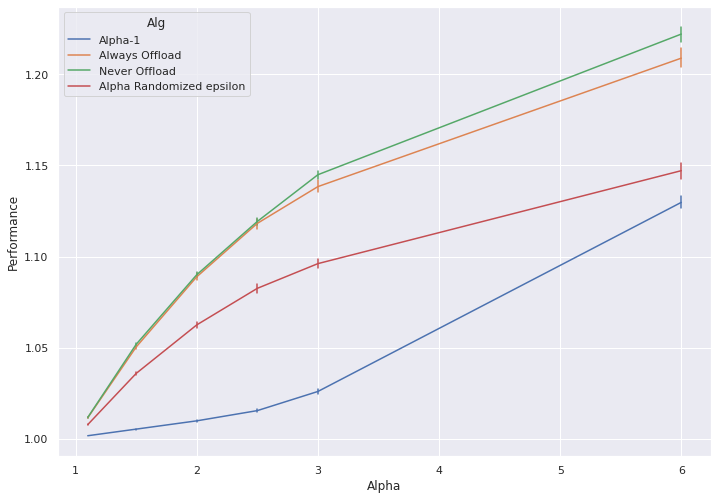

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # 3/4 and 1/2

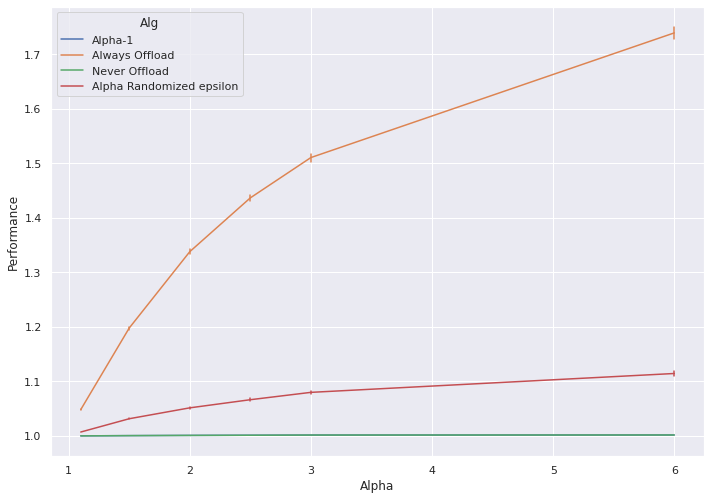

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # 3/4 and 1/2

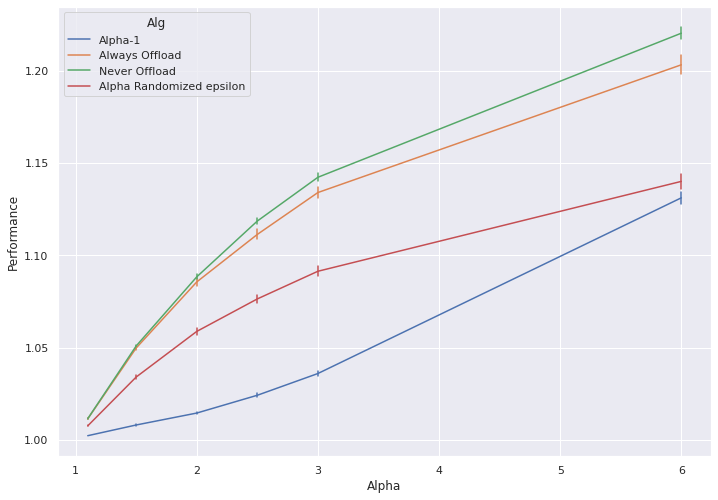

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # 3/4 and 1/2

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # 3/4 and 1/2

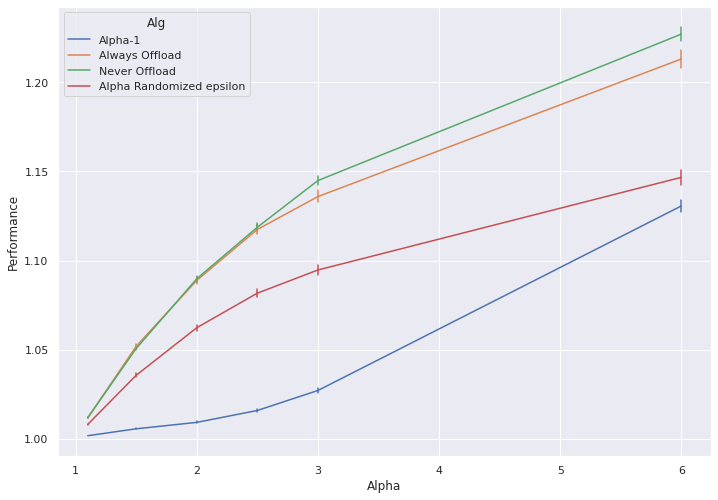

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # 3/4 and 1/2

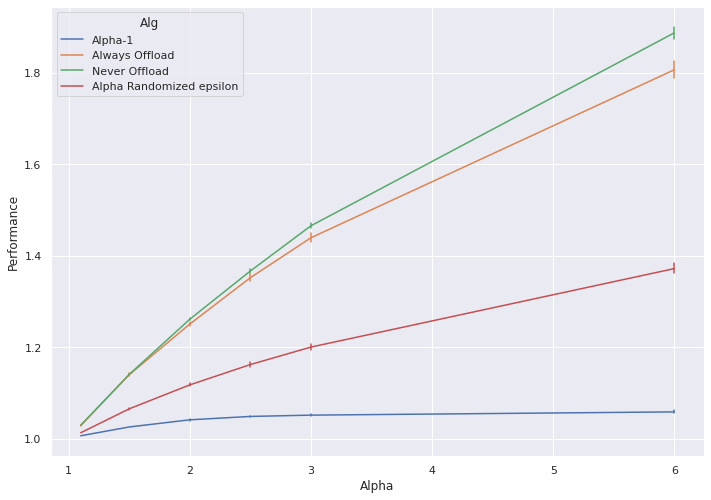

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # 3/4 and 1/2

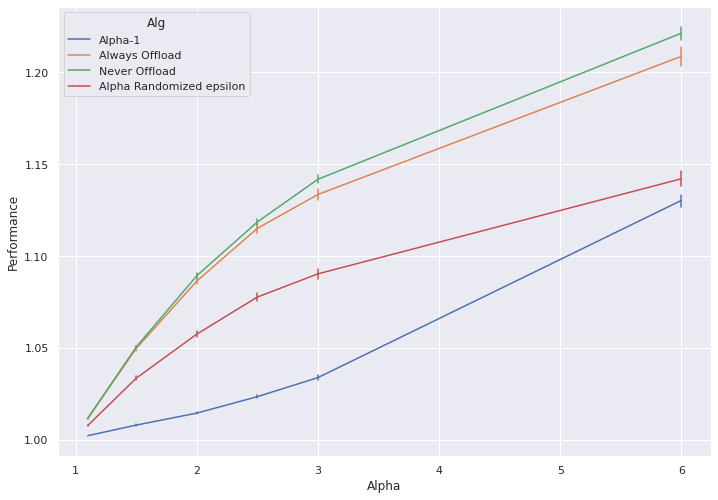

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # 3/4 and 1/2

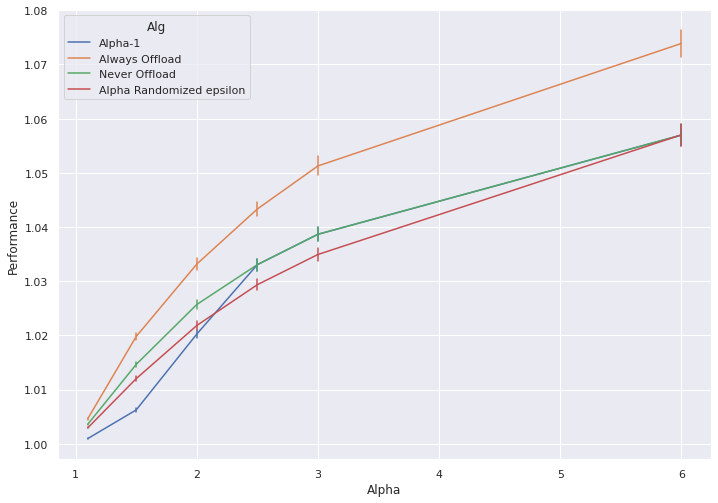

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # 3/4 and 1/2

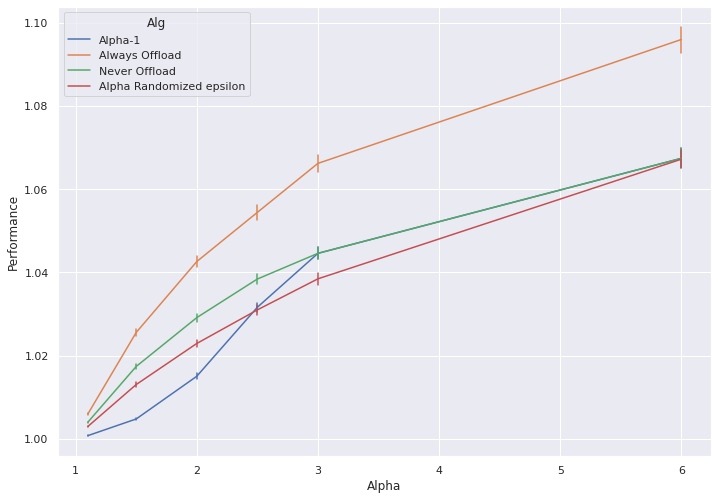

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # 2/3 and 2/3

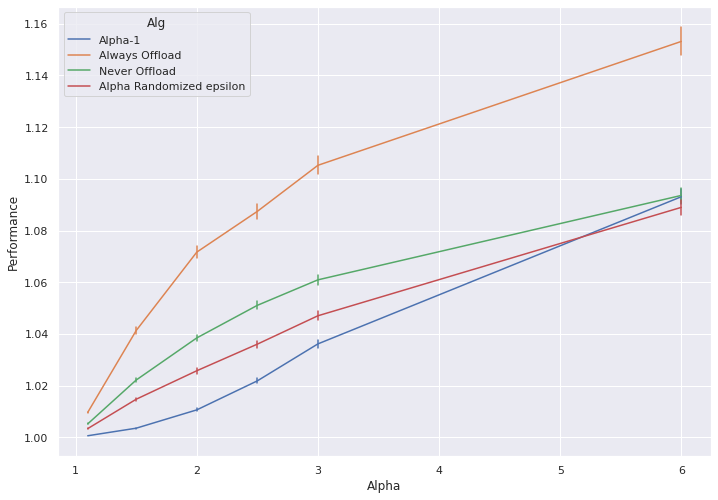

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # 1/2 and 1

Without Input Data

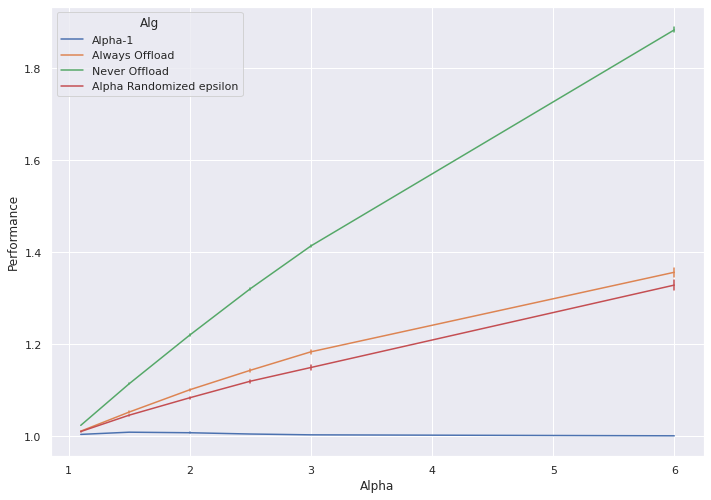

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # 1/2 max and boundry

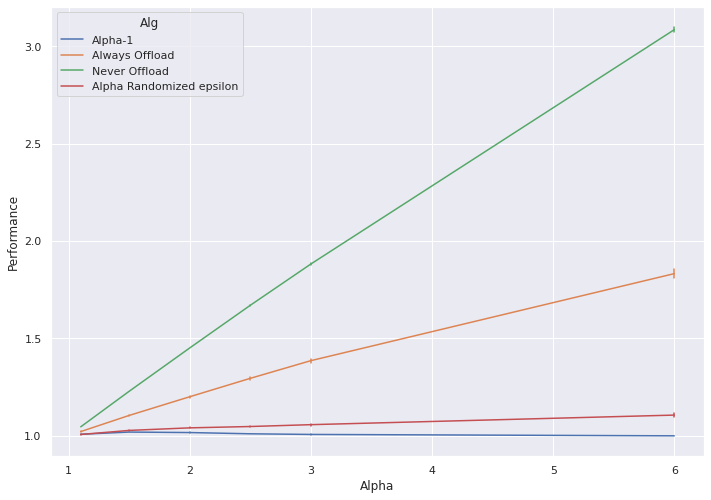

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # 1/2 max and min

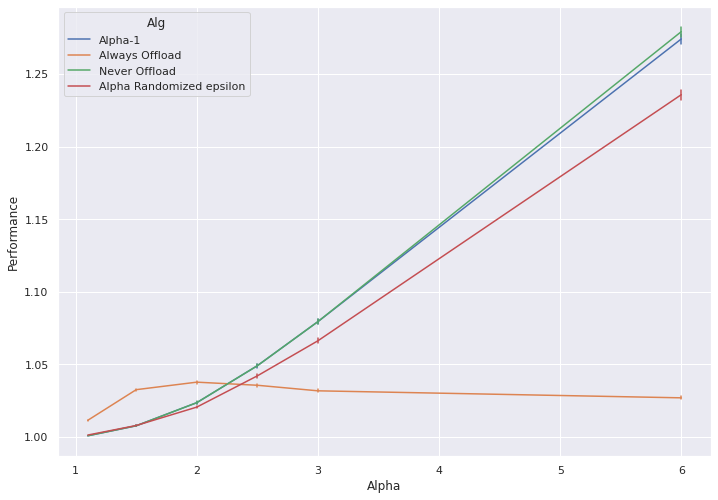

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # sqrt(TL*Tr)-Tr + U(0,(sqrt(TL*Tr)-Tr)/2)

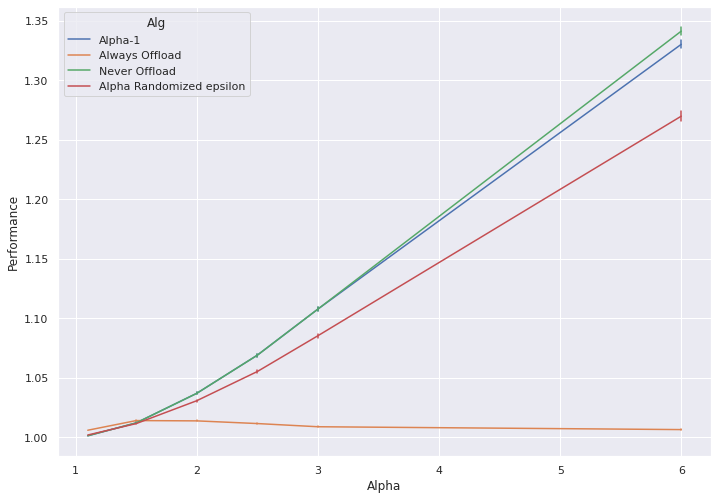

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # sqrt(TL*Tr)-Tr + U(0,(sqrt(TL*Tr)-Tr)/4)

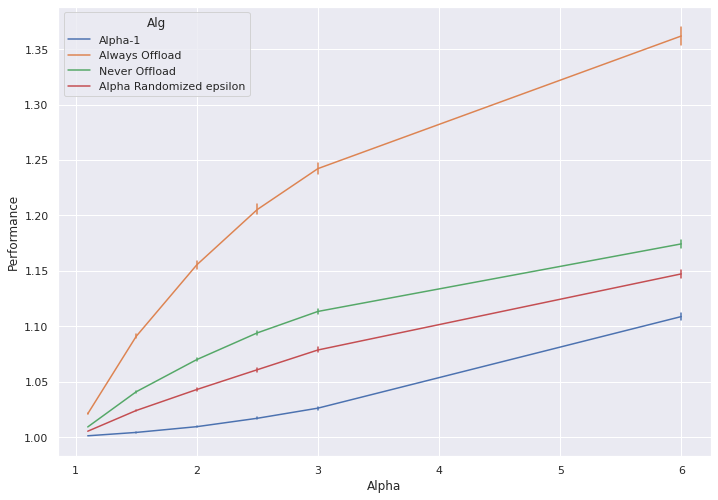

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # U(sqrt(alpha)-1)Tr/4,3(sqrt(alpha)-1)Tr/4))

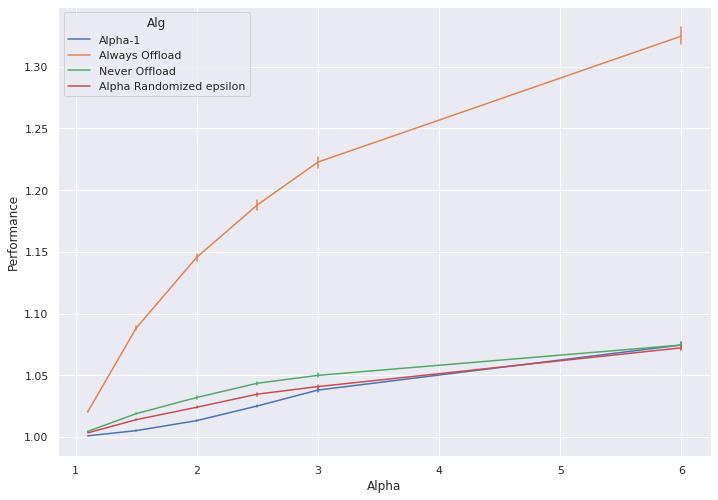

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # U(sqrt(alpha)-1)Tr/3,2(sqrt(alpha)-1)Tr/3))

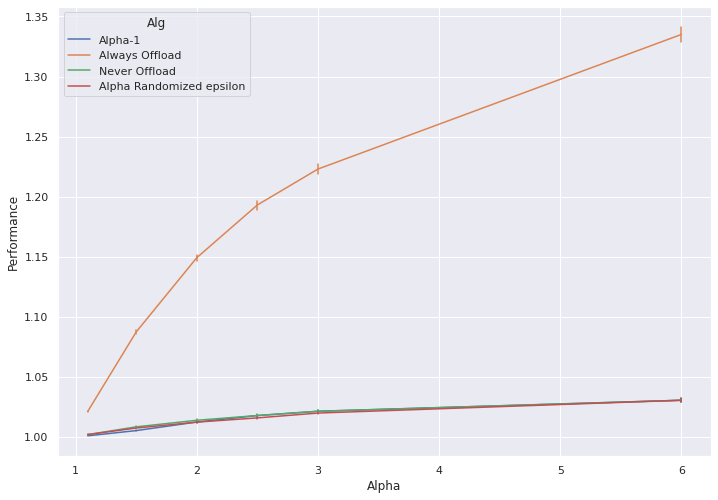

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # U(2sqrt(alpha)-1)Tr/5,3(sqrt(alpha)-1)Tr/5))

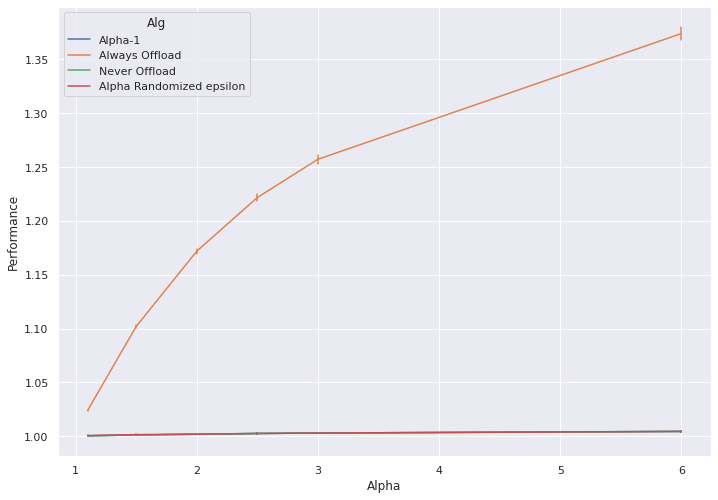

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # U(sqrt(alpha)-1)Tr/2,(sqrt(alpha)-1)Tr))

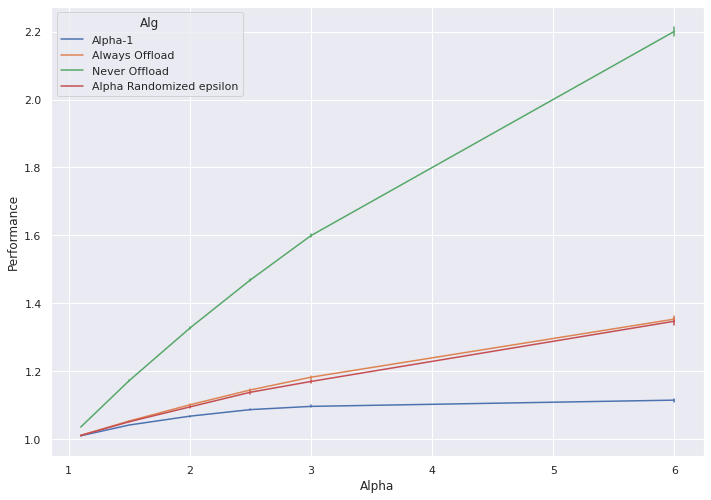

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # U(0,(TL-Tr)Tr)

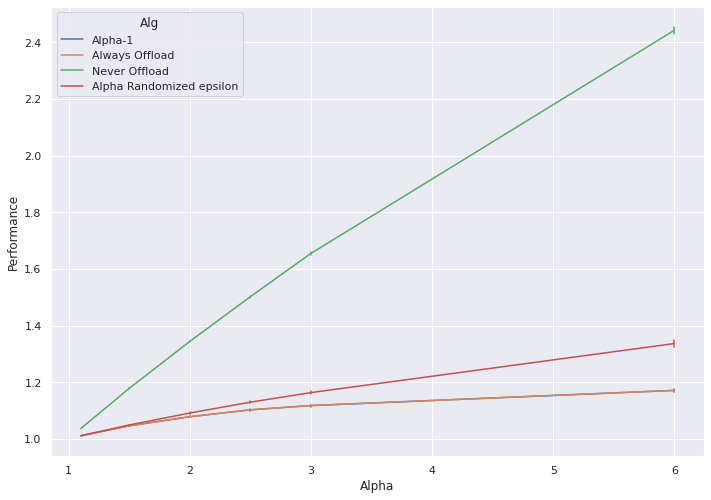

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # U(0,(sqrt(alpha)-1)Tr)

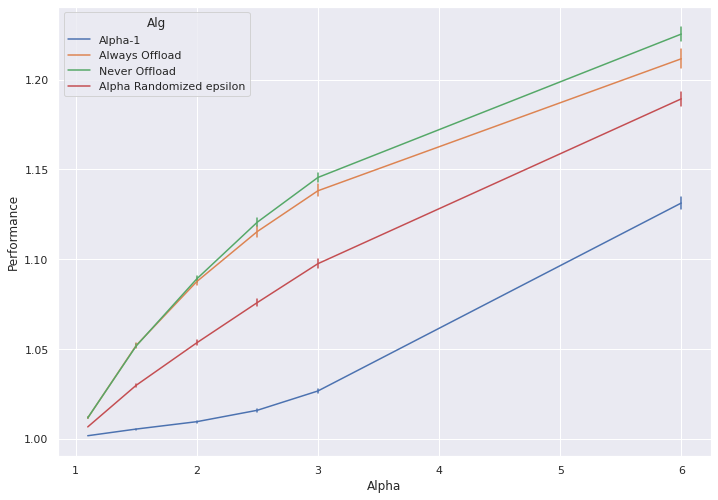

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # using v=1/2 + 1

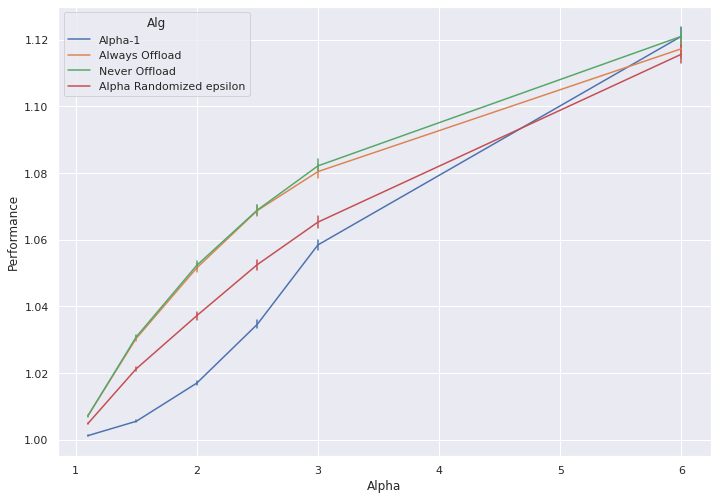

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # using v=2/3 + 2/3

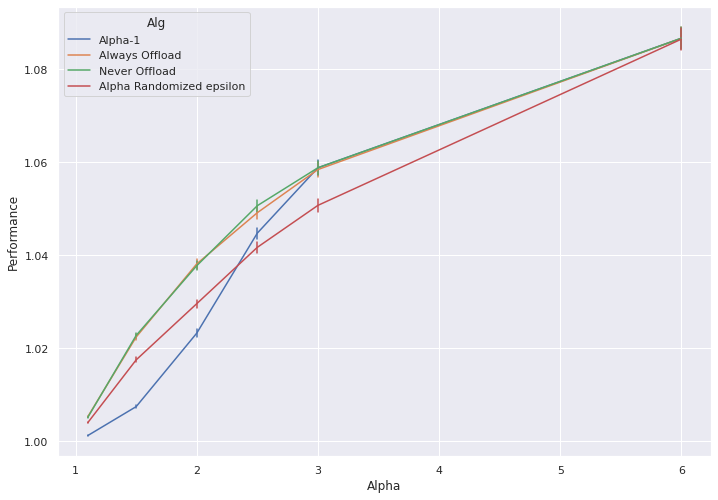

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # using v=3/4 + 1/2

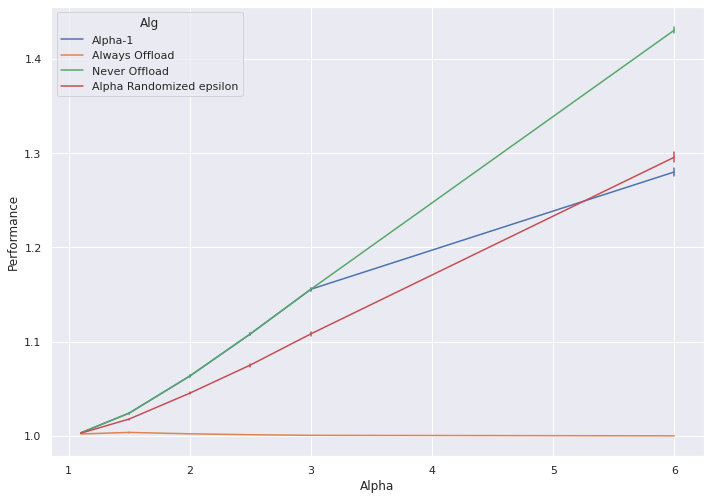

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # Ci = C0 adversary

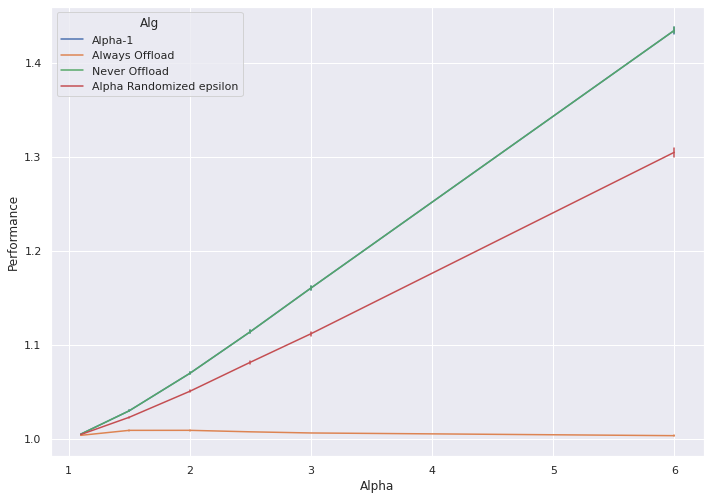

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

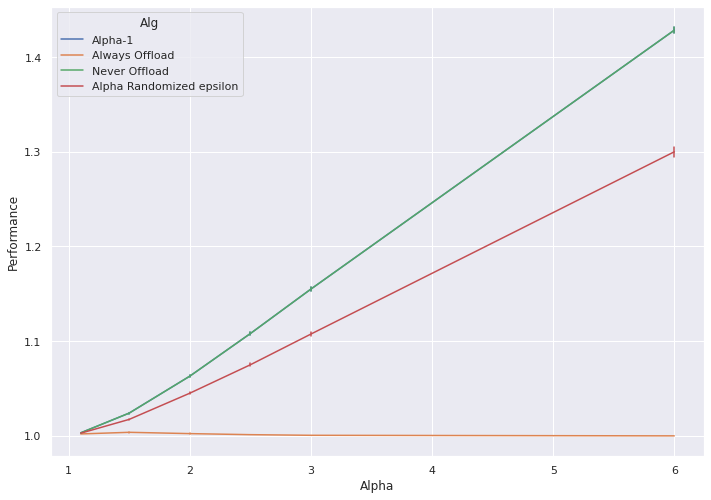

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

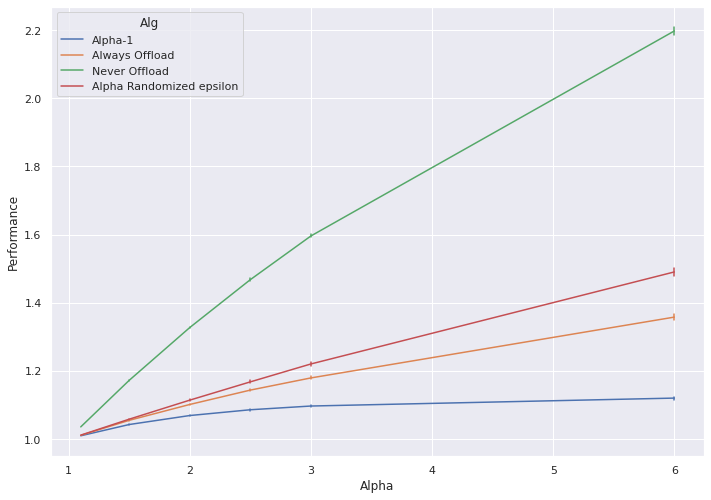

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

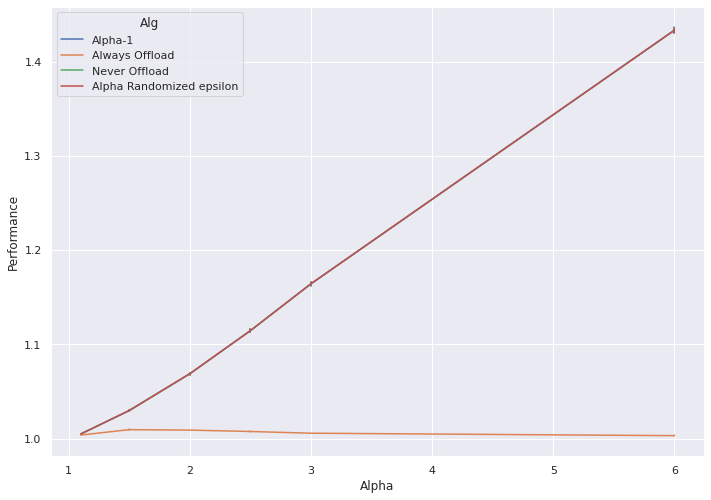

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

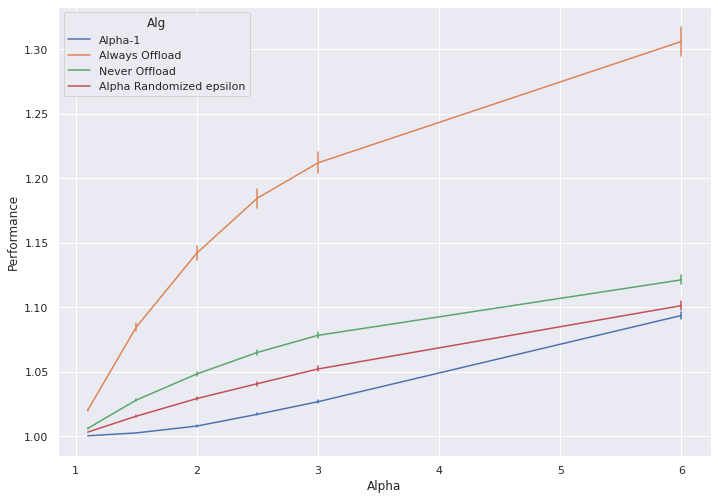

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

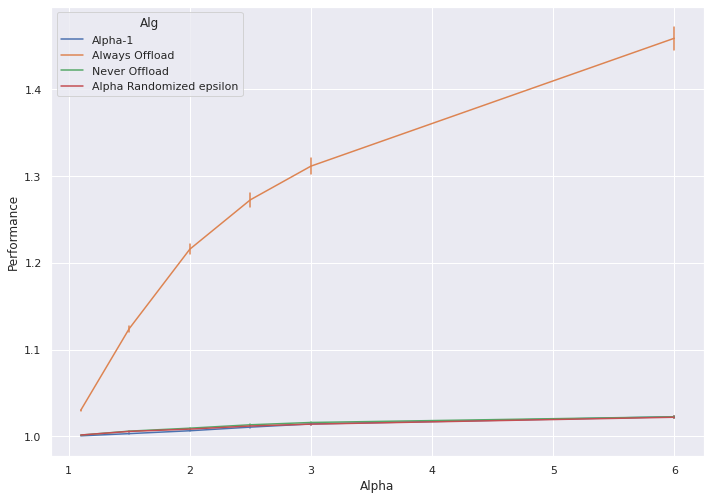

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

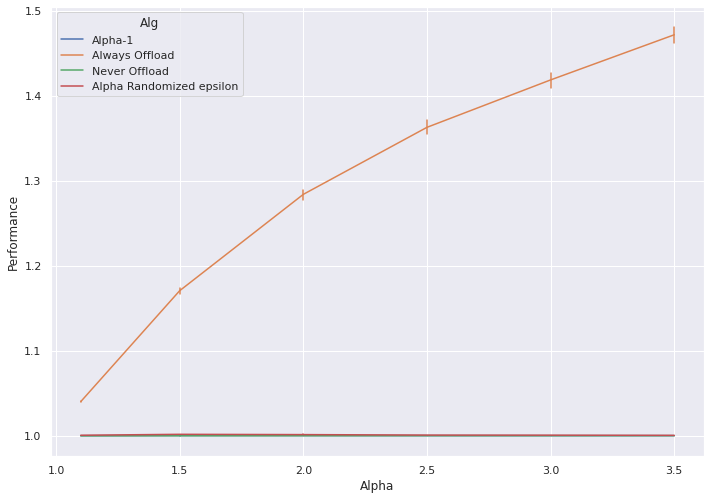

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

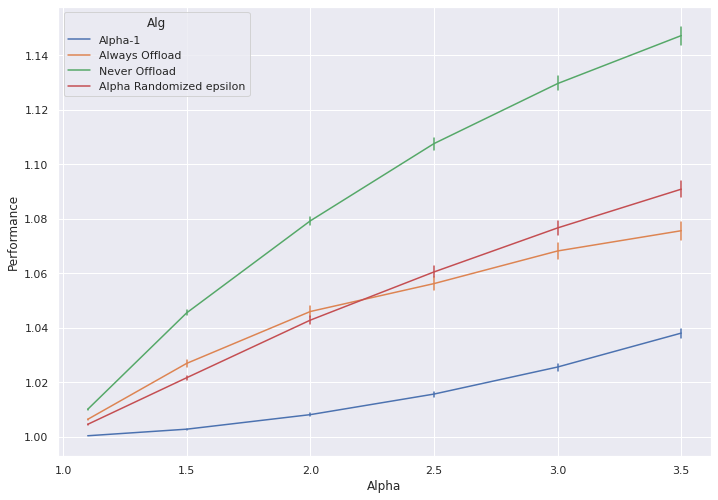

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

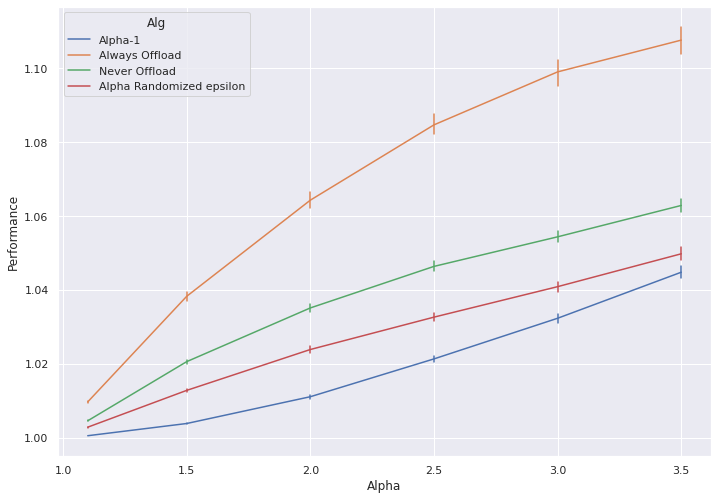

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

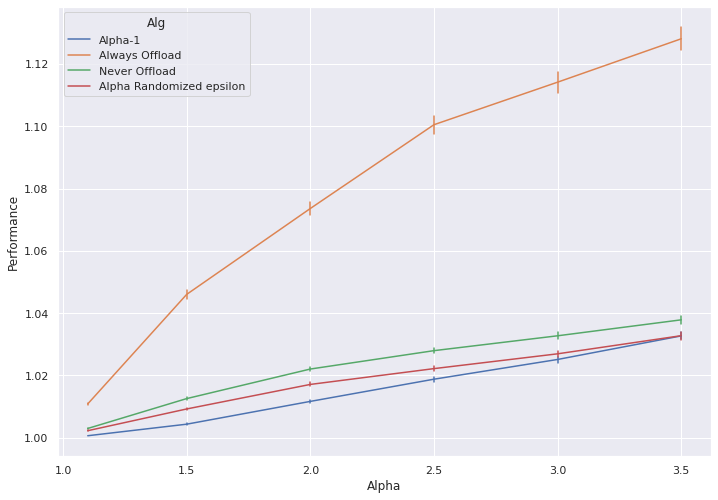

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)] 0.85

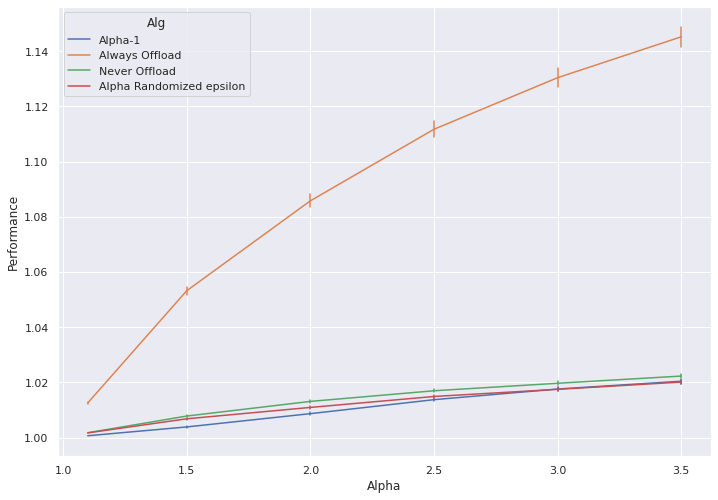

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)] 5/2

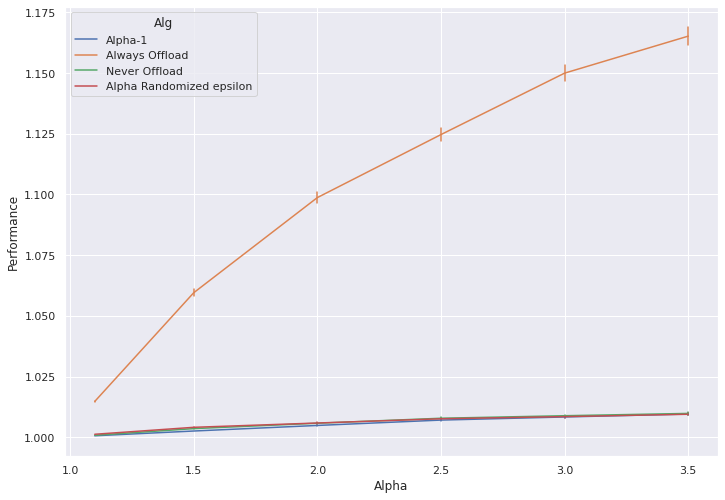

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)] 0.65

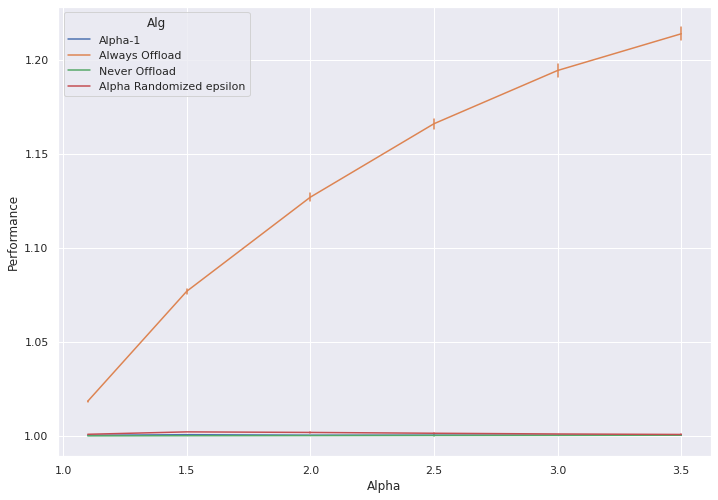

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

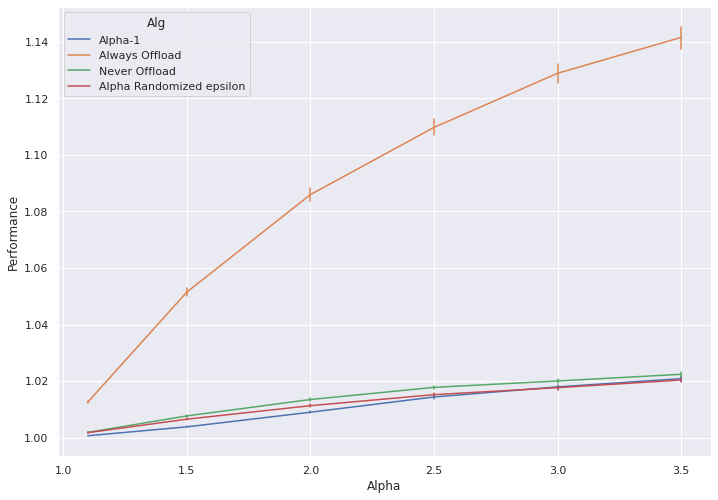

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)] 5/2

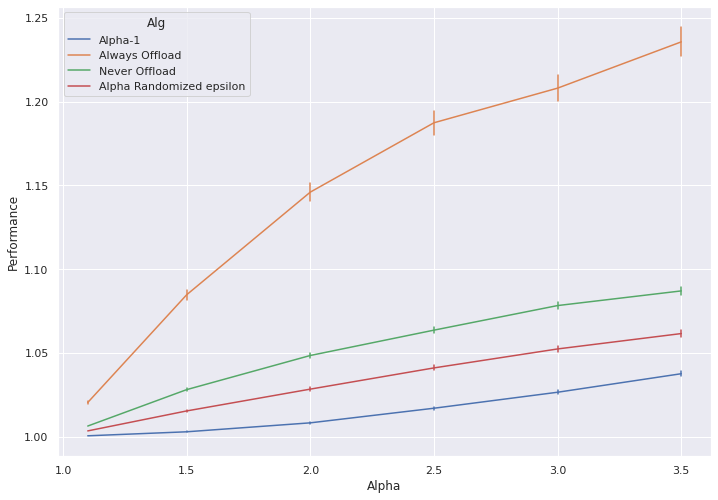

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

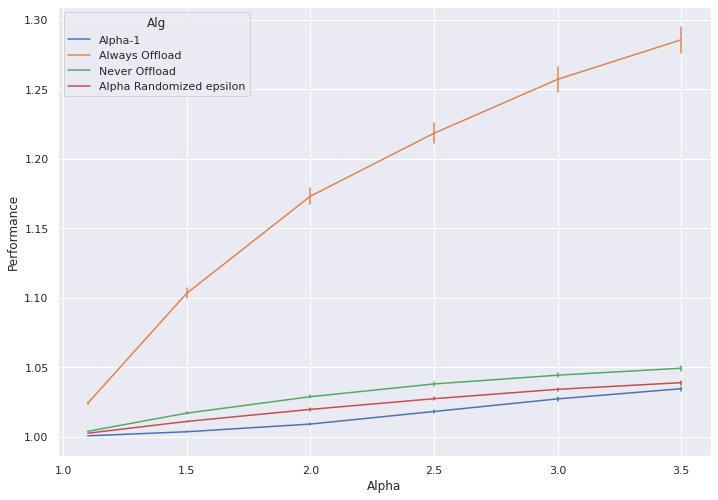

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

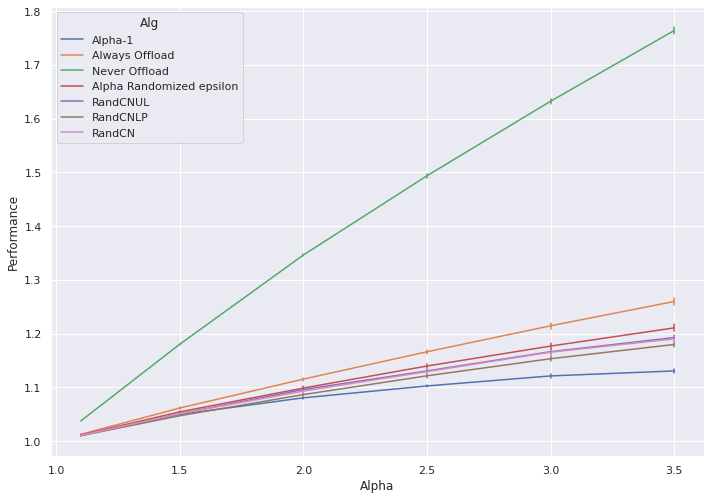

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

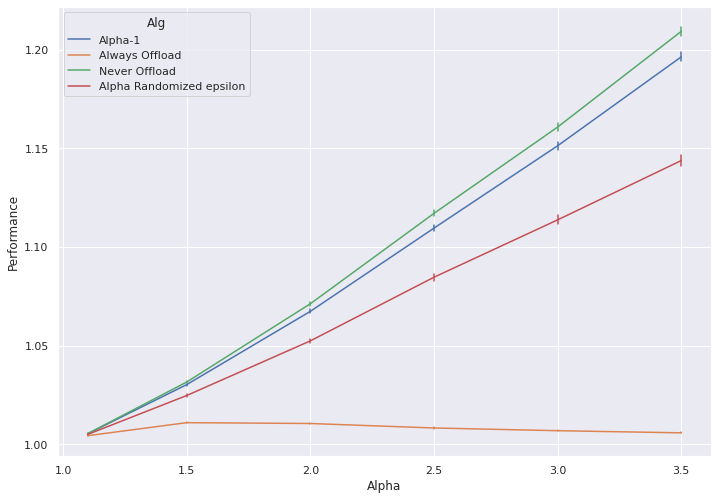

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

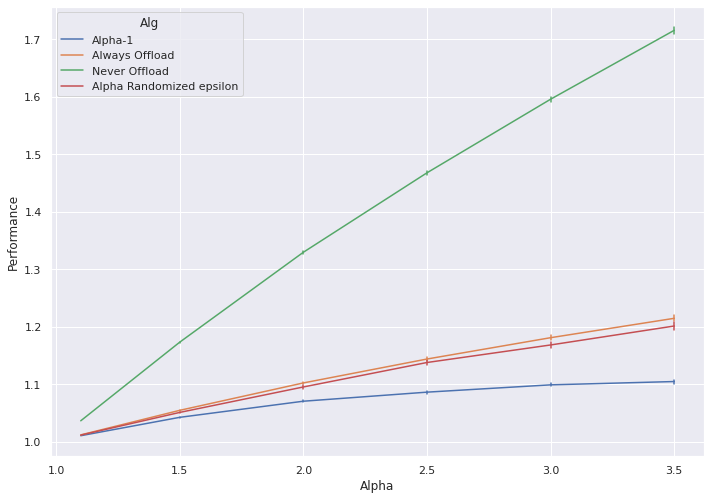

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

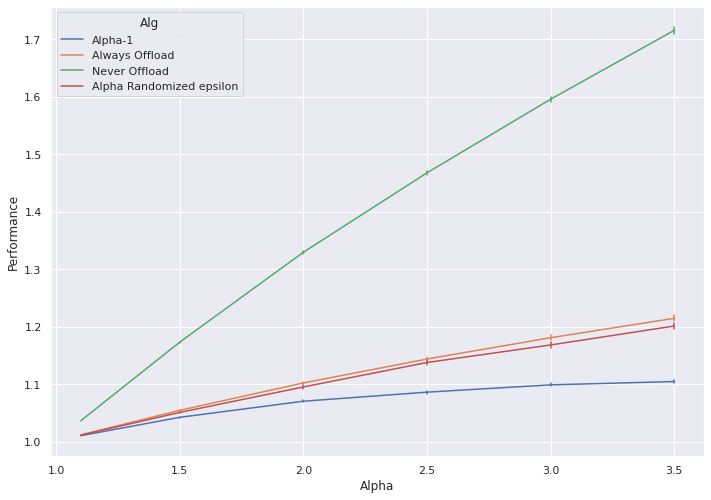

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] comms (sqrt(t1*t2)-t1)+U[0,TL-sqrt(t1*t2)]

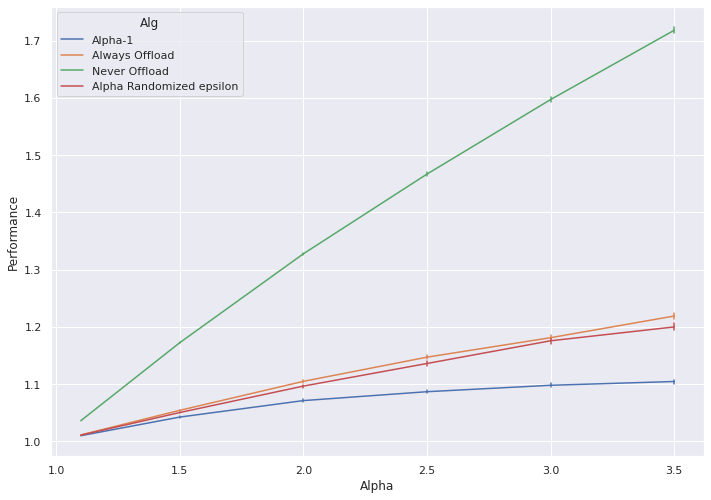

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # alpha = [1.1,3.5] c=0 d=1

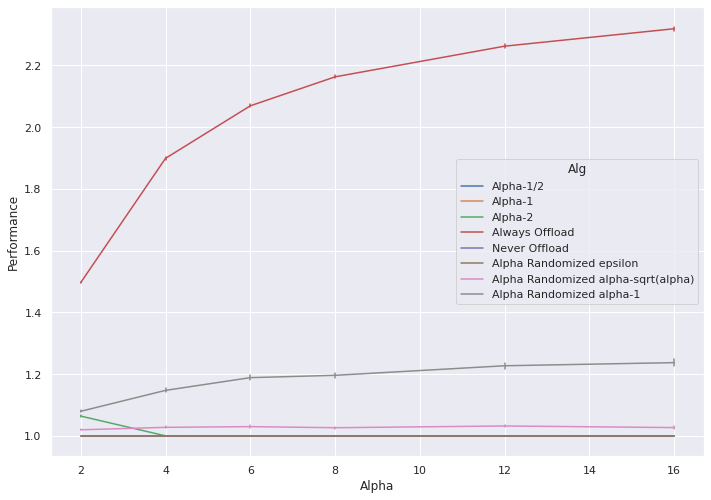

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # c=2 d=1

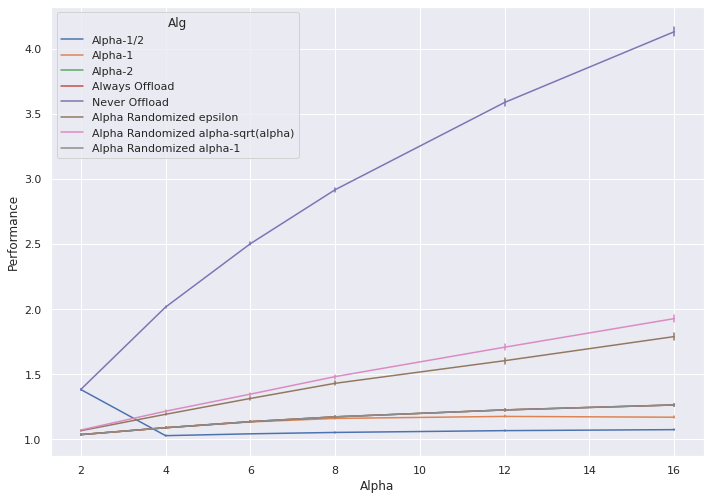

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # c=0 d=0.5

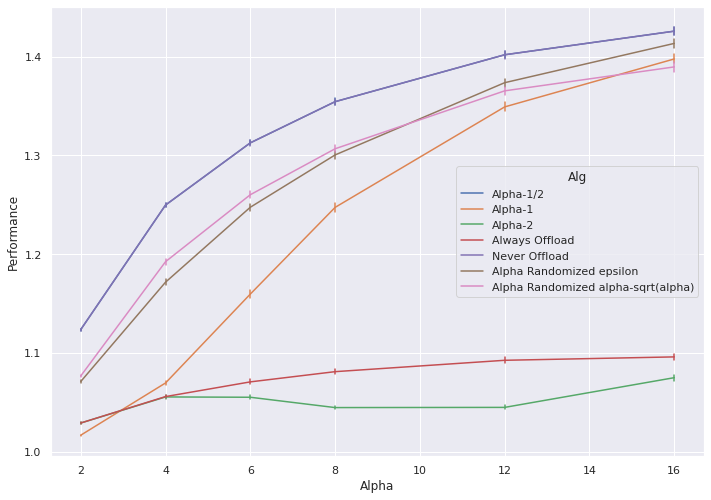

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # c=0.5 d=0.5

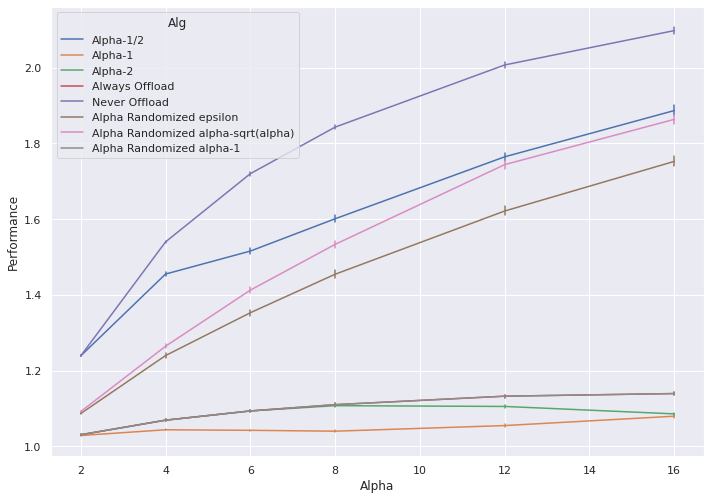

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # c=0.25 d=0.5

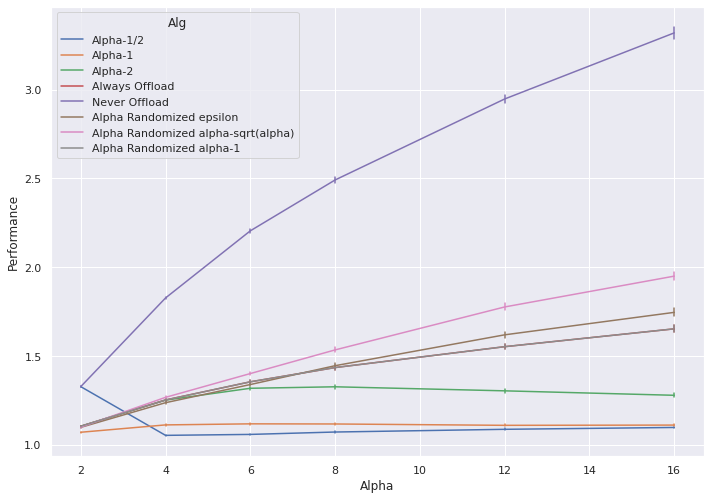

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # c=0 d=1

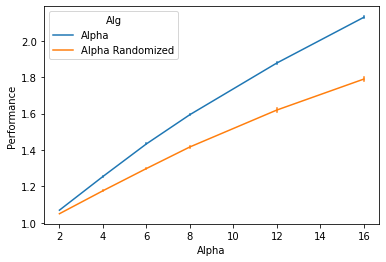

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

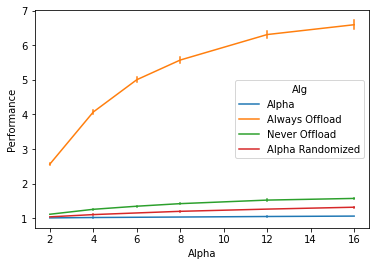

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

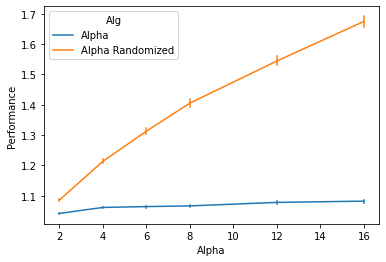

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

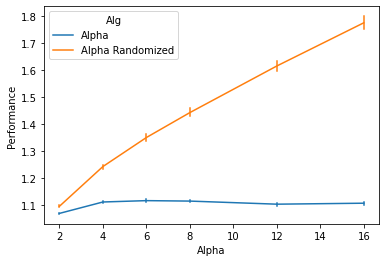

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

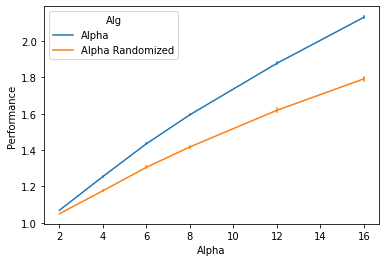

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

In [ ]:
compiled1 = []
for k in range(5):
  if k != 1 and k!=2 and k!=4:
    for i in range(6):
      for j in range(7000):
        compiled.append([final2[k][i][j], alphas[i], algs[k]])

In [ ]:
df_main1 = pd.DataFrame(compiled, columns = ['Offload Points', 'Alpha', 'Alg'])

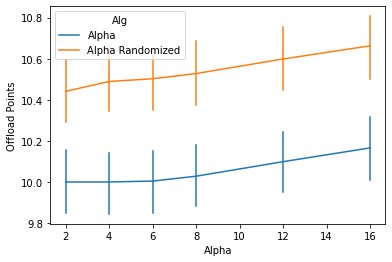

In [ ]:
sns.lineplot(x="Alpha",y="Offload Points", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

0.5 0.5

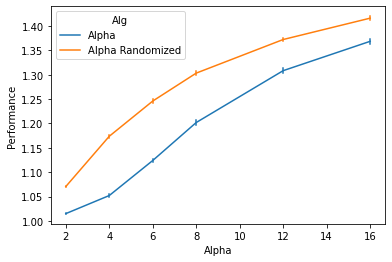

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

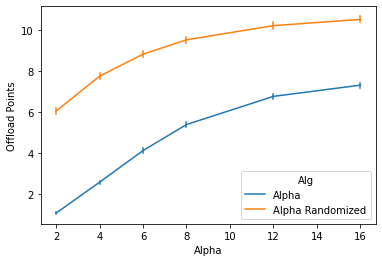

In [ ]:
sns.lineplot(x="Alpha",y="Offload Points", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

In [ ]:
A = np.array(final1)

In [ ]:
A.shape

(5, 6, 7000)

In [ ]:
A = np.swapaxes(A,1,2)

In [ ]:
A.shape

(5, 7000, 6)

In [ ]:
A

array([[[1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.06728097, 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.00215091, 1.        , 1.        ,
         1.03039412],
        ...,
        [1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        ]],

       [[1.13648623, 1.40942829, 1.74637411, 1.35656595, 1.35526782,
         1.48698503],
        [1.17990197, 1.2023637 , 1.        , 1.09006709, 1.34350013,
         1.38996135],
        [1.22245054, 1.07799683, 1.46869066, 1.69222661, 1.85396268,
         1.35774716],
        ...,
        [1.04480846, 1.55731303, 1.40702293, 1.70491938, 1.28274516,
         2.10677778],
        [1.30047784, 1.38506366, 1.25517867, 1.34891873, 1.347

In [ ]:
names = ['x', 'y', 'z']
index = pd.MultiIndex.from_product([range(s)for s in A.shape], names=names)
df = pd.DataFrame({'A': A.flatten()}, index=index)['A']

In [ ]:
df

x  y     z
0  0     0    1.0
         1    1.0
         2    1.0
         3    1.0
         4    1.0
             ... 
4  6999  0    1.0
         1    1.0
         2    1.0
         3    1.0
         4    1.0
Name: A, Length: 175000, dtype: float64

In [ ]:
df = df.unstack(level='x').swaplevel().sort_index()
df.columns = [algs[0], algs[1], algs[2], algs[3], algs[4]]
df.index.names = ['Alphas', 'Samples']

In [ ]:
df

Alpha  Always Offload  Never Offload  Alpha Randomized  \
Alphas Samples                                                           
0      0          1.0        1.017801            1.0               1.0   
       1          1.0        1.324734            1.0               1.0   
       2          1.0        1.205282            1.0               1.0   
       3          1.0        1.336001            1.0               1.0   
       4          1.0        1.054664            1.0               1.0   
...               ...             ...            ...               ...   
4      6995       1.0        1.851933            1.0               1.0   
       6996       1.0        1.449309            1.0               1.0   
       6997       1.0        1.787726            1.0               1.0   
       6998       1.0        1.735015            1.0               1.0   
       6999       1.0        1.220239            1.0               1.0   

                  RandC0  
Alphas Samples            
0      0        1.017801  
       1        1.000000  
       2        1.000000  
       3        1.000000  
       4        1.054664  
...                  ...  
4      6995     1.000000  
       6996     1.000000  
       6997     1.000000  
       6998     1.000000  
       6999     1.000000  

[35000 rows x 5 columns]

In [ ]:
dfm = df.melt(var_name='Algs', value_name='vals')


In [ ]:
dfm

Algs  vals
0        Alpha   1.0
1        Alpha   1.0
2        Alpha   1.0
3        Alpha   1.0
4        Alpha   1.0
...        ...   ...
174995  RandC0   1.0
174996  RandC0   1.0
174997  RandC0   1.0
174998  RandC0   1.0
174999  RandC0   1.0

[175000 rows x 2 columns]

In [ ]:
sns.lineplot(x="vals",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

NameError: ignored

In [ ]:
compiled = []
for k in range(5):
  # if k != 1 and k!=4:
    for i in range(5):
      for j in range(7000):
        compiled.append([final1[k][i][j], alphas[i], algs[k]])

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4


In [ ]:
df_main1 = pd.DataFrame(compiled, columns = ['Performance', 'Alpha', 'Alg'])

In [ ]:
df = pd.DataFrame(a, columns=['a'])

In [ ]:
def populate(df):
  for k in range(5):
      for i in range(5):
        print(k,i)
        for j in range(7000):
          df.loc[len(df.index)] = [final1[k][i][j], alphas[i], algs[k]]
  return df

In [ ]:
populate(df_main1)

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4


Performance Alpha     Alg
0              1.0     2   Alpha
1              1.0     2   Alpha
2              1.0     2   Alpha
3              1.0     2   Alpha
4              1.0     2   Alpha
...            ...   ...     ...
349995         1.0    32  RandC0
349996         1.0    32  RandC0
349997         1.0    32  RandC0
349998         1.0    32  RandC0
349999         1.0    32  RandC0

[350000 rows x 3 columns]

In [ ]:
df_main1.shape

(175000, 3)

In [ ]:
df_main1.head()

Performance  Alpha    Alg
0     1.067366      2  Alpha
1     1.000000      2  Alpha
2     1.008417      2  Alpha
3     1.000965      2  Alpha
4     1.025479      2  Alpha

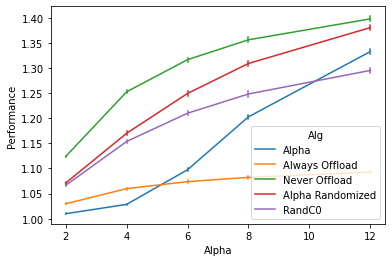

In [ ]:
sns.lineplot(x="Alpha",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

Deterministic Alg (1-10)

In [ ]:
current_comps_local_expected = np.mean(vgg16_compute_values_local_array[1],axis=0)
current_comps_remote = vgg16_compute_values_remote_expected
print(sum(current_comps_local_expected)-sum(current_comps_remote))

32.277207973579394


In [ ]:

samples = []
samples1 = []
ratio_theory = []
verify = []
verify1 = []

def generateSamples(r, i, c, samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array):
  
  k=0
  l = 0
  for j in range(7000):
    #j = math.floor(random.random()*7000)
    #current_comms_uniform = [k/randComm(r,link_rate) for k in input_data_real] #Non Monotone
    # current_comms_uniform = [input_data_real[0]/linkrate(i)]
    # for k in input_data_monotone[:len(input_data_monotone)-1]:
    #   current_comms_uniform.append(randMonoComm(r,current_comms_uniform[-1])) #Monotone
    # current_comms_uniform = [input_data_real[0]/linkrate(i)]
    # for k in input_data_real[:len(input_data_real)-1]:
    #   current_comms_uniform.append(randComm(r,input_data_real[0]/linkrate(i))) #Non Monotone  
    # current_comms_uniform.append(0)
    

    
    # print(current_comms_uniform)
    #Checking for Monotone
    # for x in range(1,len(current_comms_uniform)):
    #   if current_comms_uniform[x] > current_comms_uniform[x-1]:
    #     print("FAIL")
    #     break
    
    current_comps_local = vgg16_compute_values_local_array[i][j]
    current_comps_remote = vgg16_compute_values_remote_expected
    for z in range(len(current_comps_local)):
      if current_comps_local[z] < current_comps_remote[z]:
        print(z)

    current_comps_local_expected = np.mean(vgg16_compute_values_local_array[i],axis=0)
    # print("Diff",current_comps_local_expected-current_comps_remote)
    # print(current_comps_local_expected,current_comps_remote)
    #print(np.shape(vgg16_compute_values_local_array))
    # current_comms_uniform = [(1-c)*(sum(current_comps_local_expected)-sum(current_comps_remote)) + 2*c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))]
    current_comms_uniform = [0.000001+c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))]
    
    r_layer = random.random()*len(current_comps_local)
    for p in range(len(current_comps_local)-1):
      # current_comms_uniform.append(max(current_comms_uniform[-1]-(current_comps_local[p]-current_comps_remote[p])-current_comms_uniform[-1]/100,0.01))
      # if r_layer < p+1:
      #   current_comms_uniform.append(sum(current_comps_local_expected)-sum(current_comps_remote))
      # else:
      #   current_comms_uniform.append(0)
      # current_comms_uniform.append(randMonoCommB(r,current_comms_uniform[-1],current_comms_uniform[0]))
      # current_comms_uniform.append(randMonoComm(r,current_comms_uniform[-1]))
      # current_comms_uniform.append(randCommGamma(r,current_comms_uniform[-1], current_comps_local_expected[p]-current_comps_remote[p])) #Non Monotone with Gamma    
      # current_comms_uniform.append((1-c)*(sum(current_comps_local_expected)-sum(current_comps_remote)) + 2*c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
      current_comms_uniform.append(0.000001+c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
      # current_comms_uniform.append(random.random()*c*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
    current_comms_uniform.append(0)

    # print(len(current_comms_uniform),len(current_comps_local),len(current_comps_remote))
    opt_best_point, opt_best, best_R, best_comm = OPT(current_comms_uniform,current_comps_local,current_comps_remote)
    alg_best_point, alg_best, c_cut, best_point, best, c_opt = ALG(current_comms_uniform,current_comps_local,current_comps_remote)
    # print(opt_best_point,alg_best_point)
    # print(current_comms_uniform,current_comps_local,current_comps_remote)
    # print("OPT",opt_best_point, opt_best)
    # print("ALG",alg_best_point,alg_best, best_point)
    # print(sum(current_comps_local))
    # print("ALG1",alg_best_point1,alg_best1, best_point1)
    # if opt_best_point != alg_best_point:
    #   print("Opt best point from algo",best_point)
    #   print("Opt best point",opt_best_point)
    #   print("Alg best point",alg_best_point)

    # rho_theory_best = 1 + (1-p)*c_cut/(c_opt + sum(current_comps_remote))
    # M = len(mins)
    # performance_best = math.pow((1-p),M)*algI
    # for m in range(len(mins)):
    #   min_m = sum(current_comps_local[:mins[m]]) + current_comms_uniform[mins[m]] +  sum(current_comps_remote[mins[m]:])
    #   min_pair = np.minimum(alg_best,min_m)
    #   performance_best = performance_best + p*(math.pow((1-p),(M-m-1)))*min_pair

    
    # if offl < length:
    #   alg_best1 = sum(current_comps_local[:offl]) + current_comms_uniform[offl] + sum(current_comps_remote[offl:])
    # else :
    #   alg_best1 = sum(current_comps_local[:opt_best_point]) + current_comms_uniform[opt_best_point] + current_comms_uniform[opt_best_point] + sum(current_comps_remote[opt_best_point:])

    alg_best2 = sum(current_comps_local[:0]) + current_comms_uniform[0] + sum(current_comps_remote[0:])
    alg_best3 = sum(current_comps_local[:len(current_comps_local)]) + current_comms_uniform[len(current_comps_local)] + sum(current_comps_remote[len(current_comps_local):])

    # print(current_comms_uniform[0], sum(current_comps_remote[0:]), alg_best2, opt_best, opt_best_point)
    # print(current_comms_uniform,current_comps_local,current_comps_remote)

    k = k + 1

    if opt_best_point != 0:
      l = l + 1

    

    if best_point != opt_best_point:
      print("best point mismatch", best_point, opt_best_point, alg_best_point)
      print(current_comms_uniform,current_comps_local,current_comps_remote)
      # print(current_comps_remote)
      # print(current_comps_local)
      # print(current_comms_uniform)
      # print(opt_best, alg_best)
      print(min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote))
      point, span = min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote)
      if point != opt_best_point:
        print("Opt point mismatch", point, opt_best_point)

    # if best != opt_best:
    #   print("opt makespan mismatch", best, opt_best, alg_best)

    if alg_best < opt_best:
      print("fail best")
      print(alg_best,opt_best)
      print(alg_best_point, opt_best_point)    
      print(best_comm, c_opt, c_cut)
      exit(1)

    if alg_best_point < opt_best_point:
      print("fail best point")
      print(alg_best,opt_best)
      exit(1)
      
    samples.append(alg_best/opt_best)
    samples2.append(alg_best2/opt_best)
    samples3.append(alg_best3/opt_best)
    TALG.append(alg_best)
    TALG2.append(alg_best2)
    TALG3.append(alg_best3)
    TOPT.append(opt_best)
    opt_offload.append(opt_best_point)
    alg_offload.append(alg_best_point)
    c_opt_array.append(c_opt)
    c_cut_array.append(c_cut)
    ratio_theory.append((1+best_R/best_comm)*(1+r)*(e/(e-1))) # non monotone
    try:
      ro = 1+best_R/best_comm
      # print(ro, best_comm)
    except:
      print(best_R,best_comm)
  print(l,k)
  return (samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array)

In [ ]:
# alphas = [0.01,0.25,0.5,0.75,0.99]
alphas = [1,2,3,4,5,6,7,8,9]


In [ ]:
final1 = []
final2 = []
final3 = []
samples_final = []
samples1_final = []
samples2_final = []
samples3_final = []
TALG_final = []
TALG1_final = []
TALG2_final = []
TALG3_final = []
TOPT_final = []
opt_offload_final = []
alg_offload_final = []
c_opt_array_final = []
c_cut_array_final = []
# gammas = [2, 4, 8, 10,20]

algs = ["Deterministic", "Randomized", "Always Offload", "Never Offload"]
makespans = ["TALGD","TALGAO","TALGNO","TOPT"]

for c in range(9):
  samples = []
  samples1 = []
  samples2 = []
  samples3 = []
  TALG = []
  TALG1 = []
  TALG2 = []
  TALG3 = []
  TOPT = []
  opt_offload = []
  alg_offload = []
  c_cut_array = []
  c_opt_array = []
  samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array = generateSamples(4,1,alphas[c], samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array) #Non Monotone with Max/Min = r
  samples_final.append(samples)
  samples1_final.append(samples1)
  samples2_final.append(samples2)
  samples3_final.append(samples3)
  TALG_final.append(TALG)
  TALG1_final.append(TALG1)
  TALG2_final.append(TALG2)
  TALG3_final.append(TALG3)
  TOPT_final.append(TOPT)
  opt_offload_final.append(opt_offload)
  alg_offload_final.append(alg_offload)
  c_opt_array_final.append(c_opt_array)
  c_cut_array_final.append(c_cut_array)


final1.append(samples_final)
final1.append(samples1_final)
final1.append(samples2_final)
final1.append(samples3_final)
final2.append(TALG_final)
final2.append(TALG1_final)
final2.append(TALG2_final)
final2.append(TALG3_final)
final2.append(TOPT_final)


fail best
35.922915560037644 35.92291556003765
9 9
1.577828665139828 1.577828665139828 1.577828665139828
fail best
43.06694392208225 43.06694392208226
9 9
0.5348217516799356 0.5348217516799356 0.5348217516799356
fail best
38.95181414491109 38.9518141449111
9 9
1.0644536046017354 1.0644536046017354 1.0644536046017354
fail best
35.791636465766906 35.79163646576691
9 9
0.7731634042717346 0.7731634042717346 0.7731634042717346
fail best
31.674973072821587 31.67497307282159
9 9
0.20917875135991387 0.20917875135991387 0.20917875135991387
4731 7000
fail best
38.72883788685486 38.72883788685487
11 11
0.050949832700269315 0.050949832700269315 0.050949832700269315
fail best
32.771181511045576 32.77118151104558
9 9
0.2164132339445286 0.2164132339445286 0.2164132339445286
fail best
36.580772171439 36.58077217143901
9 9
0.8581436425397954 0.8581436425397954 0.8581436425397954


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: RuntimeWarning: divide by zero encountered in double_scalars


fail best
40.38759342370461 40.387593423704615
9 9
2.620289840676895 2.620289840676895 2.620289840676895
fail best
34.91086848168731 34.91086848168732
9 9
0.21677518614506405 0.21677518614506405 0.21677518614506405
fail best
36.06163477217088 36.06163477217089
9 9
1.4455620424567035 1.4455620424567035 1.4455620424567035
fail best
40.528843140921786 40.52884314092179
9 9
0.9510606766906268 0.9510606766906268 0.9510606766906268
fail best
42.65435617184398 42.654356171843986
9 9
2.1547478887459732 2.1547478887459732 2.1547478887459732
fail best
42.256518902944144 42.25651890294415
9 9
1.6293562342587355 1.6293562342587355 1.6293562342587355
fail best
33.684094708204505 33.68409470820451
9 9
1.096961385121771 1.096961385121771 1.096961385121771
fail best
37.361210221923756 37.36121022192376
11 11
0.5335884019821119 0.5335884019821119 0.5335884019821119
fail best
39.217309982201094 39.2173099822011
9 9
1.6571692022161386 1.6571692022161386 1.6571692022161386
fail best
37.38372555197859 37.3

In [ ]:
df_main1 = pd.DataFrame(columns = ['Performance', 'Parameter c', 'Alg'])

In [ ]:
def populate(df):
  for k in range(4):
    if k != 1:
      for i in range(9):
        for j in range(7000):
          df.loc[len(df.index)] = [final1[k][i][j], alphas[i], algs[k]]
  return df

In [ ]:
populate(df_main1)

Performance Parameter c            Alg
0          1.000000           1  Deterministic
1          1.222045           1  Deterministic
2          1.374187           1  Deterministic
3          1.000000           1  Deterministic
4          1.065904           1  Deterministic
...             ...         ...            ...
188995     1.000000           9  Never Offload
188996     1.609353           9  Never Offload
188997     1.358126           9  Never Offload
188998     1.062462           9  Never Offload
188999     1.000000           9  Never Offload

[189000 rows x 3 columns]

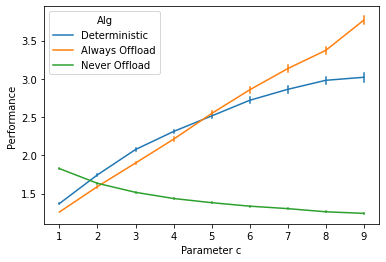

In [ ]:
sns.lineplot(x="Parameter c",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

In [ ]:
df_main3 = pd.DataFrame(columns = ['Offload Point', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [opt_offload_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Offload Point Parameter c
0                 1           1
1                 2           1
2                 3           1
3                 3           1
4                 1           1
...             ...         ...
62995            19           9
62996             5           9
62997             4           9
62998             7           9
62999            19           9

[63000 rows x 2 columns]

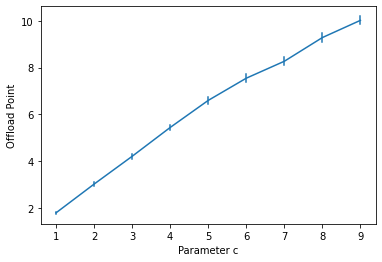

In [ ]:
sns.lineplot(x="Parameter c",y="Offload Point", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Alg Offload Point', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [alg_offload_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Alg Offload Point Parameter c
0                     1           1
1                    13           1
2                     4           1
3                     3           1
4                     4           1
...                 ...         ...
62995                19           9
62996                 6           9
62997                 9           9
62998                16           9
62999                19           9

[63000 rows x 2 columns]

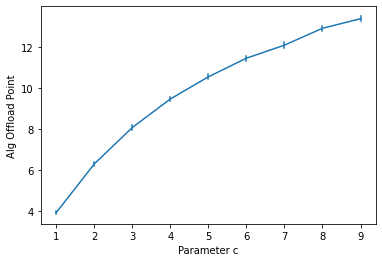

In [ ]:
sns.lineplot(x="Parameter c",y="Alg Offload Point", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Opt Comm', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [c_opt_array_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Opt Comm  Parameter c
0       0.885527          1.0
1      11.376223          1.0
2       4.821076          1.0
3       0.195810          1.0
4      11.684361          1.0
...          ...          ...
62995   0.000000          9.0
62996   1.455476          9.0
62997   9.704032          9.0
62998  18.557930          9.0
62999   0.000000          9.0

[63000 rows x 2 columns]

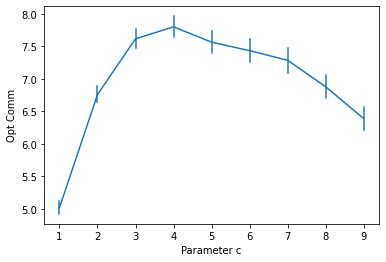

In [ ]:
sns.lineplot(x="Parameter c",y="Opt Comm", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Alg Comm', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [c_cut_array_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Alg Comm  Parameter c
0        0.885527          1.0
1        8.355213          1.0
2       14.375842          1.0
3        0.195810          1.0
4        4.365395          1.0
...           ...          ...
62995    0.000000          9.0
62996  185.531330          9.0
62997  158.282784          9.0
62998   90.116366          9.0
62999    0.000000          9.0

[63000 rows x 2 columns]

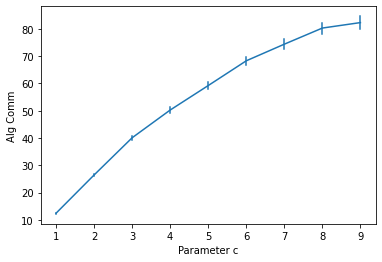

In [ ]:
sns.lineplot(x="Parameter c",y="Alg Comm", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Alg Makespan', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [final2[0][k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Alg Makespan  Parameter c
0         23.915433          1.0
1         42.226426          1.0
2         47.567970          1.0
3         29.253174          1.0
4         36.283063          1.0
...             ...          ...
62995     53.229699          9.0
62996    220.694877          9.0
62997    194.029900          9.0
62998    145.087436          9.0
62999     51.638554          9.0

[63000 rows x 2 columns]

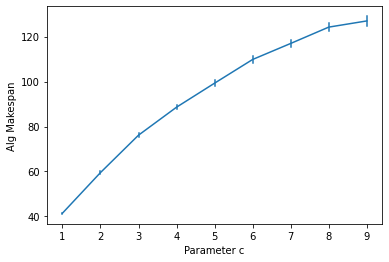

In [ ]:
sns.lineplot(x="Parameter c",y="Alg Makespan", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Opt Makespan', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [final2[4][k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Opt Makespan  Parameter c
0         23.915433          1.0
1         34.553898          1.0
2         34.615349          1.0
3         29.253174          1.0
4         34.039721          1.0
...             ...          ...
62995     53.229699          9.0
62996     35.533679          9.0
62997     38.398580          9.0
62998     57.170347          9.0
62999     51.638554          9.0

[63000 rows x 2 columns]

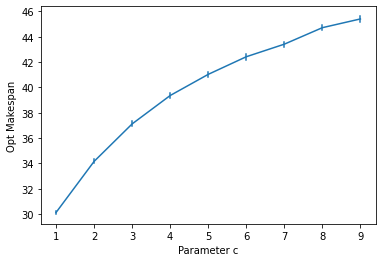

In [ ]:
sns.lineplot(x="Parameter c",y="Opt Makespan", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


Deterministic Alg Verification

In [ ]:
current_comps_local_expected = np.mean(vgg16_compute_values_local_array[1],axis=0)
current_comps_remote = vgg16_compute_values_remote_expected
print(sum(current_comps_local_expected)-sum(current_comps_remote))

32.28992878497482


In [ ]:

samples = []
samples1 = []
ratio_theory = []
verify = []
verify1 = []

def generateSamples(r, i, c, samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array):
  
  k=0
  l = 0
  for j in range(7000):
    #j = math.floor(random.random()*7000)
    #current_comms_uniform = [k/randComm(r,link_rate) for k in input_data_real] #Non Monotone
    # current_comms_uniform = [input_data_real[0]/linkrate(i)]
    # for k in input_data_monotone[:len(input_data_monotone)-1]:
    #   current_comms_uniform.append(randMonoComm(r,current_comms_uniform[-1])) #Monotone
    # current_comms_uniform = [input_data_real[0]/linkrate(i)]
    # for k in input_data_real[:len(input_data_real)-1]:
    #   current_comms_uniform.append(randComm(r,input_data_real[0]/linkrate(i))) #Non Monotone  
    # current_comms_uniform.append(0)
    

    
    # print(current_comms_uniform)
    #Checking for Monotone
    # for x in range(1,len(current_comms_uniform)):
    #   if current_comms_uniform[x] > current_comms_uniform[x-1]:
    #     print("FAIL")
    #     break
    
    current_comps_local = vgg16_compute_values_local_array[i][j]
    current_comps_remote = vgg16_compute_values_remote_expected
    for z in range(len(current_comps_local)):
      if current_comps_local[z] < current_comps_remote[z]:
        print(z)

    current_comps_local_expected = np.mean(vgg16_compute_values_local_array[i],axis=0)
    # print("Diff",current_comps_local_expected-current_comps_remote)
    # print(current_comps_local_expected,current_comps_remote)
    #print(np.shape(vgg16_compute_values_local_array))
    # current_comms_uniform = [(1-c)*(sum(current_comps_local_expected)-sum(current_comps_remote)) + 2*c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))]
    # current_comms_uniform = [0.000001+c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))]
    current_comms_uniform = [9*(sum(current_comps_local_expected)-sum(current_comps_remote))+(c-9)*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))]

    r_layer = random.random()*len(current_comps_local)
    for p in range(len(current_comps_local)-1):
      # current_comms_uniform.append(max(current_comms_uniform[-1]-(current_comps_local[p]-current_comps_remote[p])-current_comms_uniform[-1]/100,0.01))
      # if r_layer < p+1:
      #   current_comms_uniform.append(sum(current_comps_local_expected)-sum(current_comps_remote))
      # else:
      #   current_comms_uniform.append(0)
      # current_comms_uniform.append(randMonoCommB(r,current_comms_uniform[-1],current_comms_uniform[0]))
      # current_comms_uniform.append(randMonoComm(r,current_comms_uniform[-1]))
      # current_comms_uniform.append(randCommGamma(r,current_comms_uniform[-1], current_comps_local_expected[p]-current_comps_remote[p])) #Non Monotone with Gamma    
      # current_comms_uniform.append((1-c)*(sum(current_comps_local_expected)-sum(current_comps_remote)) + 2*c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
      # current_comms_uniform.append(0.000001+c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma
      current_comms_uniform.append(9*(sum(current_comps_local_expected)-sum(current_comps_remote))+(c-9)*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))) 
      # current_comms_uniform.append(random.random()*c*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
    current_comms_uniform.append(0)

    # print(len(current_comms_uniform),len(current_comps_local),len(current_comps_remote))
    opt_best_point, opt_best, best_R, best_comm = OPT(current_comms_uniform,current_comps_local,current_comps_remote)
    alg_best_point, alg_best, c_cut, best_point, best, c_opt = ALG(current_comms_uniform,current_comps_local,current_comps_remote)
    # print(opt_best_point,alg_best_point)
    # print(current_comms_uniform,current_comps_local,current_comps_remote)
    # print("OPT",opt_best_point, opt_best)
    # print("ALG",alg_best_point,alg_best, best_point)
    # print(sum(current_comps_local))
    # print("ALG1",alg_best_point1,alg_best1, best_point1)
    # if opt_best_point != alg_best_point:
    #   print("Opt best point from algo",best_point)
    #   print("Opt best point",opt_best_point)
    #   print("Alg best point",alg_best_point)

    # rho_theory_best = 1 + (1-p)*c_cut/(c_opt + sum(current_comps_remote))
    # M = len(mins)
    # performance_best = math.pow((1-p),M)*algI
    # for m in range(len(mins)):
    #   min_m = sum(current_comps_local[:mins[m]]) + current_comms_uniform[mins[m]] +  sum(current_comps_remote[mins[m]:])
    #   min_pair = np.minimum(alg_best,min_m)
    #   performance_best = performance_best + p*(math.pow((1-p),(M-m-1)))*min_pair

    
    # if offl < length:
    #   alg_best1 = sum(current_comps_local[:offl]) + current_comms_uniform[offl] + sum(current_comps_remote[offl:])
    # else :
    #   alg_best1 = sum(current_comps_local[:opt_best_point]) + current_comms_uniform[opt_best_point] + current_comms_uniform[opt_best_point] + sum(current_comps_remote[opt_best_point:])

    alg_best2 = sum(current_comps_local[:0]) + current_comms_uniform[0] + sum(current_comps_remote[0:])
    alg_best3 = sum(current_comps_local[:len(current_comps_local)]) + current_comms_uniform[len(current_comps_local)] + sum(current_comps_remote[len(current_comps_local):])

    # print(current_comms_uniform[0], sum(current_comps_remote[0:]), alg_best2, opt_best, opt_best_point)
    # print(current_comms_uniform,current_comps_local,current_comps_remote)

    k = k + 1

    if opt_best_point != 0:
      l = l + 1

    

    if best_point != opt_best_point:
      print("best point mismatch", best_point, opt_best_point, alg_best_point)
      print(current_comms_uniform,current_comps_local,current_comps_remote)
      # print(current_comps_remote)
      # print(current_comps_local)
      # print(current_comms_uniform)
      # print(opt_best, alg_best)
      print(min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote))
      point, span = min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote)
      if point != opt_best_point:
        print("Opt point mismatch", point, opt_best_point)

    # if best != opt_best:
    #   print("opt makespan mismatch", best, opt_best, alg_best)

    if alg_best < opt_best:
      print("fail best")
      print(alg_best,opt_best)
      print(alg_best_point, opt_best_point)    
      print(best_comm, c_opt, c_cut)
      exit(1)

    if alg_best_point < opt_best_point:
      print("fail best point")
      print(alg_best,opt_best)
      exit(1)
      
    samples.append(alg_best/opt_best)
    samples2.append(alg_best2/opt_best)
    samples3.append(alg_best3/opt_best)
    TALG.append(alg_best)
    TALG2.append(alg_best2)
    TALG3.append(alg_best3)
    TOPT.append(opt_best)
    opt_offload.append(opt_best_point)
    alg_offload.append(alg_best_point)
    c_opt_array.append(c_opt)
    c_cut_array.append(c_cut)
    ratio_theory.append((1+best_R/best_comm)*(1+r)*(e/(e-1))) # non monotone
    try:
      ro = 1+best_R/best_comm
      # print(ro, best_comm)
    except:
      print(best_R,best_comm)
  print(l,k)
  return (samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array)

In [ ]:
# alphas = [0.01,0.25,0.5,0.75,0.99]
alphas = [10,20,30,40,50,60,70,80,90]


In [ ]:
final1 = []
final2 = []
final3 = []
samples_final = []
samples1_final = []
samples2_final = []
samples3_final = []
TALG_final = []
TALG1_final = []
TALG2_final = []
TALG3_final = []
TOPT_final = []
opt_offload_final = []
alg_offload_final = []
c_opt_array_final = []
c_cut_array_final = []
# gammas = [2, 4, 8, 10,20]

algs = ["Deterministic", "Randomized", "Always Offload", "Never Offload"]
makespans = ["TALGD","TALGAO","TALGNO","TOPT"]

for c in range(9):
  samples = []
  samples1 = []
  samples2 = []
  samples3 = []
  TALG = []
  TALG1 = []
  TALG2 = []
  TALG3 = []
  TOPT = []
  opt_offload = []
  alg_offload = []
  c_cut_array = []
  c_opt_array = []
  samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array = generateSamples(4,1,alphas[c], samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array) #Non Monotone with Max/Min = r
  samples_final.append(samples)
  samples1_final.append(samples1)
  samples2_final.append(samples2)
  samples3_final.append(samples3)
  TALG_final.append(TALG)
  TALG1_final.append(TALG1)
  TALG2_final.append(TALG2)
  TALG3_final.append(TALG3)
  TOPT_final.append(TOPT)
  opt_offload_final.append(opt_offload)
  alg_offload_final.append(alg_offload)
  c_opt_array_final.append(c_opt_array)
  c_cut_array_final.append(c_cut_array)


final1.append(samples_final)
final1.append(samples1_final)
final1.append(samples2_final)
final1.append(samples3_final)
final2.append(TALG_final)
final2.append(TALG1_final)
final2.append(TALG2_final)
final2.append(TALG3_final)
final2.append(TOPT_final)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: RuntimeWarning: divide by zero encountered in double_scalars


7000 7000
7000 7000
7000 7000
7000 7000
7000 7000
7000 7000
7000 7000
7000 7000
7000 7000


In [ ]:
df_main1 = pd.DataFrame(columns = ['Performance', 'Parameter c', 'Alg'])

In [ ]:
def populate(df):
  for k in range(4):
    if k != 1:
      for i in range(9):
        for j in range(7000):
          df.loc[len(df.index)] = [final1[k][i][j], alphas[i], algs[k]]
  return df

In [ ]:
populate(df_main1)

Performance Parameter c            Alg
0               1.0          10  Deterministic
1               1.0          10  Deterministic
2               1.0          10  Deterministic
3               1.0          10  Deterministic
4               1.0          10  Deterministic
...             ...         ...            ...
188995          1.0          90  Never Offload
188996          1.0          90  Never Offload
188997          1.0          90  Never Offload
188998          1.0          90  Never Offload
188999          1.0          90  Never Offload

[189000 rows x 3 columns]

In [ ]:
df_main1.sort_values('Performance')


Performance Parameter c             Alg
0          1.000000          10   Deterministic
147006     1.000000          40   Never Offload
147005     1.000000          40   Never Offload
147004     1.000000          40   Never Offload
147003     1.000000          40   Never Offload
...             ...         ...             ...
124055    66.291462          90  Always Offload
125956    66.477442          90  Always Offload
125472    67.350080          90  Always Offload
125871    67.376849          90  Always Offload
120600    68.612801          90  Always Offload

[189000 rows x 3 columns]

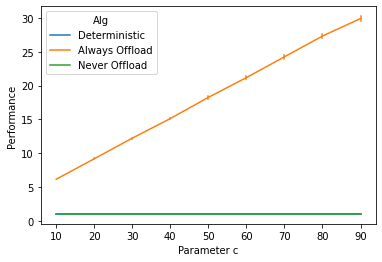

In [ ]:
sns.lineplot(x="Parameter c",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

In [ ]:
df_main3 = pd.DataFrame(columns = ['Offload Point', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [opt_offload_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Offload Point Parameter c
0                19          10
1                19          10
2                19          10
3                19          10
4                19          10
...             ...         ...
62995            19          90
62996            19          90
62997            19          90
62998            19          90
62999            19          90

[63000 rows x 2 columns]

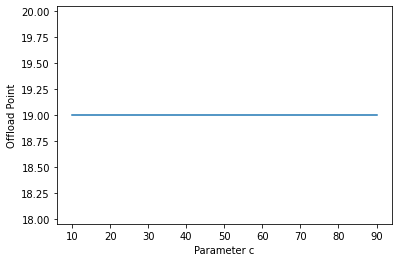

In [ ]:
sns.lineplot(x="Parameter c",y="Offload Point", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Alg Offload Point', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [alg_offload_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Alg Offload Point Parameter c
0                    19          10
1                    19          10
2                    19          10
3                    19          10
4                    19          10
...                 ...         ...
62995                19          90
62996                19          90
62997                19          90
62998                19          90
62999                19          90

[63000 rows x 2 columns]

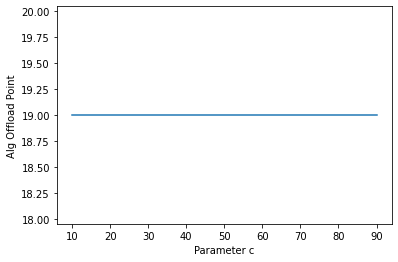

In [ ]:
sns.lineplot(x="Parameter c",y="Alg Offload Point", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Opt Comm', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [c_opt_array_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Opt Comm Parameter c
0            0          10
1            0          10
2            0          10
3            0          10
4            0          10
...        ...         ...
62995        0          90
62996        0          90
62997        0          90
62998        0          90
62999        0          90

[63000 rows x 2 columns]

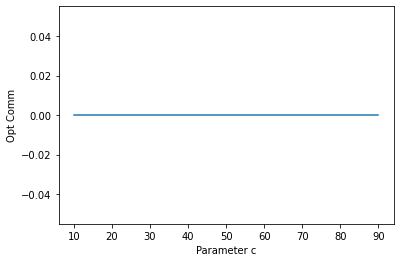

In [ ]:
sns.lineplot(x="Parameter c",y="Opt Comm", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Alg Comm', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [c_cut_array_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Alg Comm Parameter c
0            0          10
1            0          10
2            0          10
3            0          10
4            0          10
...        ...         ...
62995        0          90
62996        0          90
62997        0          90
62998        0          90
62999        0          90

[63000 rows x 2 columns]

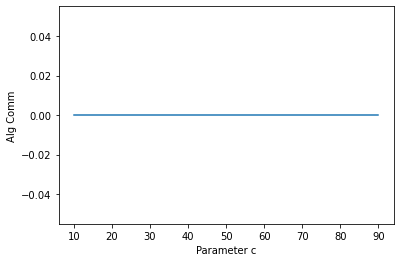

In [ ]:
sns.lineplot(x="Parameter c",y="Alg Comm", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Alg Makespan', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [final2[0][k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Alg Makespan  Parameter c
0         59.479057         10.0
1         58.917273         10.0
2         51.313583         10.0
3         54.049645         10.0
4         56.720492         10.0
...             ...          ...
62995     59.579613         90.0
62996     56.377735         90.0
62997     57.417527         90.0
62998     41.422429         90.0
62999     49.514773         90.0

[63000 rows x 2 columns]

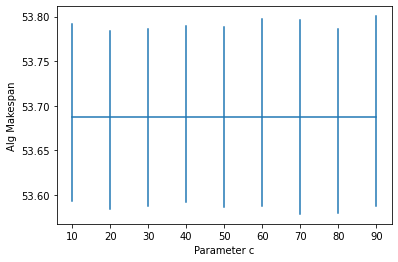

In [ ]:
sns.lineplot(x="Parameter c",y="Alg Makespan", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Opt Makespan', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [final2[4][k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Opt Makespan  Parameter c
0         59.479057         10.0
1         58.917273         10.0
2         51.313583         10.0
3         54.049645         10.0
4         56.720492         10.0
...             ...          ...
62995     59.579613         90.0
62996     56.377735         90.0
62997     57.417527         90.0
62998     41.422429         90.0
62999     49.514773         90.0

[63000 rows x 2 columns]

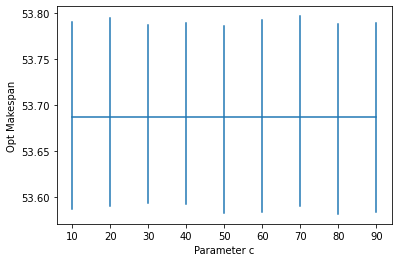

In [ ]:
sns.lineplot(x="Parameter c",y="Opt Makespan", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


Deterministic Alg (x2)

In [ ]:
current_comps_local_expected = np.mean(vgg16_compute_values_local_array[1],axis=0)
current_comps_remote = vgg16_compute_values_remote_expected
print(sum(current_comps_local_expected)-sum(current_comps_remote))

32.277207973579394


In [ ]:

samples = []
samples1 = []
ratio_theory = []
verify = []
verify1 = []

def generateSamples(r, i, c, samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array):
  
  k=0
  l = 0
  for j in range(7000):
    #j = math.floor(random.random()*7000)
    #current_comms_uniform = [k/randComm(r,link_rate) for k in input_data_real] #Non Monotone
    # current_comms_uniform = [input_data_real[0]/linkrate(i)]
    # for k in input_data_monotone[:len(input_data_monotone)-1]:
    #   current_comms_uniform.append(randMonoComm(r,current_comms_uniform[-1])) #Monotone
    # current_comms_uniform = [input_data_real[0]/linkrate(i)]
    # for k in input_data_real[:len(input_data_real)-1]:
    #   current_comms_uniform.append(randComm(r,input_data_real[0]/linkrate(i))) #Non Monotone  
    # current_comms_uniform.append(0)
    

    
    # print(current_comms_uniform)
    #Checking for Monotone
    # for x in range(1,len(current_comms_uniform)):
    #   if current_comms_uniform[x] > current_comms_uniform[x-1]:
    #     print("FAIL")
    #     break
    
    current_comps_local = vgg16_compute_values_local_array[i][j]
    current_comps_remote = vgg16_compute_values_remote_expected
    for z in range(len(current_comps_local)):
      if current_comps_local[z] < current_comps_remote[z]:
        print(z)

    current_comps_local_expected = np.mean(vgg16_compute_values_local_array[i],axis=0)
    # print("Diff",current_comps_local_expected-current_comps_remote)
    # print(current_comps_local_expected,current_comps_remote)
    #print(np.shape(vgg16_compute_values_local_array))
    # current_comms_uniform = [(1-c)*(sum(current_comps_local_expected)-sum(current_comps_remote)) + 2*c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))]
    current_comms_uniform = [0.000001+c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))]
    
    r_layer = random.random()*len(current_comps_local)
    for p in range(len(current_comps_local)-1):
      # current_comms_uniform.append(max(current_comms_uniform[-1]-(current_comps_local[p]-current_comps_remote[p])-current_comms_uniform[-1]/100,0.01))
      # if r_layer < p+1:
      #   current_comms_uniform.append(sum(current_comps_local_expected)-sum(current_comps_remote))
      # else:
      #   current_comms_uniform.append(0)
      # current_comms_uniform.append(randMonoCommB(r,current_comms_uniform[-1],current_comms_uniform[0]))
      # current_comms_uniform.append(randMonoComm(r,current_comms_uniform[-1]))
      # current_comms_uniform.append(randCommGamma(r,current_comms_uniform[-1], current_comps_local_expected[p]-current_comps_remote[p])) #Non Monotone with Gamma    
      # current_comms_uniform.append((1-c)*(sum(current_comps_local_expected)-sum(current_comps_remote)) + 2*c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
      current_comms_uniform.append(0.000001+c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
      # current_comms_uniform.append(random.random()*c*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
    current_comms_uniform.append(0)

    # print(len(current_comms_uniform),len(current_comps_local),len(current_comps_remote))
    opt_best_point, opt_best, best_R, best_comm = OPT(current_comms_uniform,current_comps_local,current_comps_remote)
    alg_best_point, alg_best, c_cut, best_point, best, c_opt = ALG(current_comms_uniform,current_comps_local,current_comps_remote)
    # print(opt_best_point,alg_best_point)
    # print(current_comms_uniform,current_comps_local,current_comps_remote)
    # print("OPT",opt_best_point, opt_best)
    # print("ALG",alg_best_point,alg_best, best_point)
    # print(sum(current_comps_local))
    # print("ALG1",alg_best_point1,alg_best1, best_point1)
    # if opt_best_point != alg_best_point:
    #   print("Opt best point from algo",best_point)
    #   print("Opt best point",opt_best_point)
    #   print("Alg best point",alg_best_point)

    # rho_theory_best = 1 + (1-p)*c_cut/(c_opt + sum(current_comps_remote))
    # M = len(mins)
    # performance_best = math.pow((1-p),M)*algI
    # for m in range(len(mins)):
    #   min_m = sum(current_comps_local[:mins[m]]) + current_comms_uniform[mins[m]] +  sum(current_comps_remote[mins[m]:])
    #   min_pair = np.minimum(alg_best,min_m)
    #   performance_best = performance_best + p*(math.pow((1-p),(M-m-1)))*min_pair

    
    # if offl < length:
    #   alg_best1 = sum(current_comps_local[:offl]) + current_comms_uniform[offl] + sum(current_comps_remote[offl:])
    # else :
    #   alg_best1 = sum(current_comps_local[:opt_best_point]) + current_comms_uniform[opt_best_point] + current_comms_uniform[opt_best_point] + sum(current_comps_remote[opt_best_point:])

    alg_best2 = sum(current_comps_local[:0]) + current_comms_uniform[0] + sum(current_comps_remote[0:])
    alg_best3 = sum(current_comps_local[:len(current_comps_local)]) + current_comms_uniform[len(current_comps_local)] + sum(current_comps_remote[len(current_comps_local):])

    # print(current_comms_uniform[0], sum(current_comps_remote[0:]), alg_best2, opt_best, opt_best_point)
    # print(current_comms_uniform,current_comps_local,current_comps_remote)

    k = k + 1

    if opt_best_point != 0:
      l = l + 1

    

    if best_point != opt_best_point:
      print("best point mismatch", best_point, opt_best_point, alg_best_point)
      print(current_comms_uniform,current_comps_local,current_comps_remote)
      # print(current_comps_remote)
      # print(current_comps_local)
      # print(current_comms_uniform)
      # print(opt_best, alg_best)
      print(min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote))
      point, span = min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote)
      if point != opt_best_point:
        print("Opt point mismatch", point, opt_best_point)

    # if best != opt_best:
    #   print("opt makespan mismatch", best, opt_best, alg_best)

    if alg_best < opt_best:
      print("fail best")
      print(alg_best,opt_best)
      print(alg_best_point, opt_best_point)    
      print(best_comm, c_opt, c_cut)
      exit(1)

    if alg_best_point < opt_best_point:
      print("fail best point")
      print(alg_best,opt_best)
      exit(1)
      
    samples.append(alg_best/opt_best)
    samples2.append(alg_best2/opt_best)
    samples3.append(alg_best3/opt_best)
    TALG.append(alg_best)
    TALG2.append(alg_best2)
    TALG3.append(alg_best3)
    TOPT.append(opt_best)
    opt_offload.append(opt_best_point)
    alg_offload.append(alg_best_point)
    c_opt_array.append(c_opt)
    c_cut_array.append(c_cut)
    ratio_theory.append((1+best_R/best_comm)*(1+r)*(e/(e-1))) # non monotone
    try:
      ro = 1+best_R/best_comm
      # print(ro, best_comm)
    except:
      print(best_R,best_comm)
  print(l,k)
  return (samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array)

In [ ]:
# alphas = [0.01,0.25,0.5,0.75,0.99]
alphas = [10,30,50,70,90,110,130,150,170]


In [ ]:
final1 = []
final2 = []
final3 = []
samples_final = []
samples1_final = []
samples2_final = []
samples3_final = []
TALG_final = []
TALG1_final = []
TALG2_final = []
TALG3_final = []
TOPT_final = []
opt_offload_final = []
alg_offload_final = []
c_opt_array_final = []
c_cut_array_final = []
# gammas = [2, 4, 8, 10,20]

algs = ["Deterministic", "Randomized", "Always Offload", "Never Offload"]
makespans = ["TALGD","TALGAO","TALGNO","TOPT"]

for c in range(9):
  samples = []
  samples1 = []
  samples2 = []
  samples3 = []
  TALG = []
  TALG1 = []
  TALG2 = []
  TALG3 = []
  TOPT = []
  opt_offload = []
  alg_offload = []
  c_cut_array = []
  c_opt_array = []
  samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array = generateSamples(4,1,alphas[c], samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload, c_opt_array, c_cut_array) #Non Monotone with Max/Min = r
  samples_final.append(samples)
  samples1_final.append(samples1)
  samples2_final.append(samples2)
  samples3_final.append(samples3)
  TALG_final.append(TALG)
  TALG1_final.append(TALG1)
  TALG2_final.append(TALG2)
  TALG3_final.append(TALG3)
  TOPT_final.append(TOPT)
  opt_offload_final.append(opt_offload)
  alg_offload_final.append(alg_offload)
  c_opt_array_final.append(c_opt_array)
  c_cut_array_final.append(c_cut_array)


final1.append(samples_final)
final1.append(samples1_final)
final1.append(samples2_final)
final1.append(samples3_final)
final2.append(TALG_final)
final2.append(TALG1_final)
final2.append(TALG2_final)
final2.append(TALG3_final)
final2.append(TOPT_final)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: RuntimeWarning: divide by zero encountered in double_scalars


fail best
37.134480932244 37.13448093224401
11 11
0.8491902393211702 0.8491902393211702 0.8491902393211702
fail best
41.09198325581287 41.09198325581288
9 9
1.6058687811601848 1.6058687811601848 1.6058687811601848
fail best
34.463210500146054 34.46321050014606
9 9
0.6369168455742573 0.6369168455742573 0.6369168455742573
fail best
41.940608955079064 41.94060895507907
9 9
0.408667846575879 0.408667846575879 0.408667846575879
6481 7000
fail best
41.37000244485518 41.37000244485519
9 9
0.9341568796894613 0.9341568796894613 0.9341568796894613
fail best
40.63593014674232 40.635930146742325
9 9
0.731611373992143 0.731611373992143 0.731611373992143
fail best
35.1857286509043 35.18572865090431
9 9
0.5266609056280473 0.5266609056280473 0.5266609056280473
6781 7000
6862 7000
fail best
45.30460590285184 45.30460590285185
9 9
0.3385636178085379 0.3385636178085379 0.3385636178085379
fail best
43.081677135701135 43.08167713570114
9 9
0.8894024851056452 0.8894024851056452 0.8894024851056452
fail best


In [ ]:
df_main1 = pd.DataFrame(columns = ['Performance', 'Parameter c', 'Alg'])

In [ ]:
def populate(df):
  for k in range(4):
    if k != 1:
      for i in range(9):
        for j in range(7000):
          df.loc[len(df.index)] = [final1[k][i][j], alphas[i], algs[k]]
  return df

In [ ]:
populate(df_main1)

Performance Parameter c            Alg
0          1.000000          10  Deterministic
1          1.000000          10  Deterministic
2          1.000000          10  Deterministic
3          2.946969          10  Deterministic
4         12.347730          10  Deterministic
...             ...         ...            ...
188995     1.000000         170  Never Offload
188996     1.359573         170  Never Offload
188997     1.000000         170  Never Offload
188998     1.000000         170  Never Offload
188999     1.000000         170  Never Offload

[189000 rows x 3 columns]

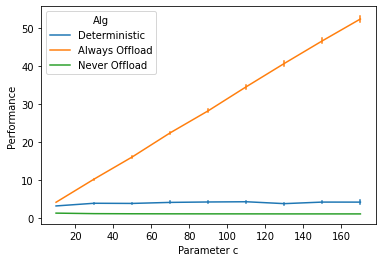

In [ ]:
sns.lineplot(x="Parameter c",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

In [ ]:
df_main3 = pd.DataFrame(columns = ['Offload Point', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [opt_offload_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Offload Point Parameter c
0                19          10
1                19          10
2                 8          10
3                 5          10
4                 0          10
...             ...         ...
62995            19         170
62996             2         170
62997            19         170
62998            19         170
62999            19         170

[63000 rows x 2 columns]

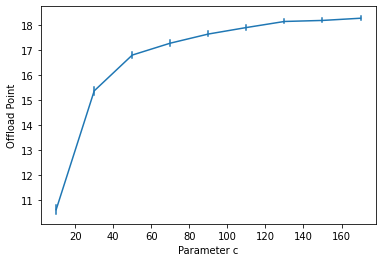

In [ ]:
sns.lineplot(x="Parameter c",y="Offload Point", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Alg Offload Point', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [alg_offload_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Alg Offload Point Parameter c
0                    19          10
1                    19          10
2                     8          10
3                     9          10
4                     1          10
...                 ...         ...
62995                19         170
62996                 9         170
62997                19         170
62998                19         170
62999                19         170

[63000 rows x 2 columns]

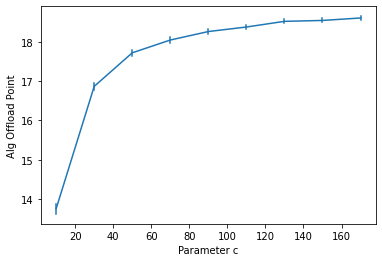

In [ ]:
sns.lineplot(x="Parameter c",y="Alg Offload Point", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Opt Comm', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [c_opt_array_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Opt Comm Parameter c
0              0          10
1              0          10
2       0.618913        10.0
3       5.474442        10.0
4        3.60924        10.0
...          ...         ...
62995          0         170
62996  13.956141       170.0
62997          0         170
62998          0         170
62999          0         170

[63000 rows x 2 columns]

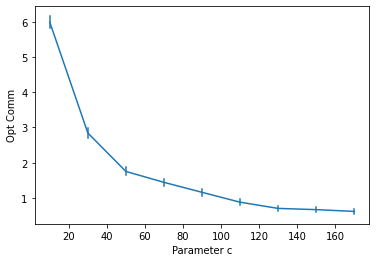

In [ ]:
sns.lineplot(x="Parameter c",y="Opt Comm", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Alg Comm', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [c_cut_array_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Alg Comm Parameter c
0                0          10
1                0          10
2         0.618913        10.0
3        75.385776        10.0
4       287.775875        10.0
...            ...         ...
62995            0         170
62996  1286.668466       170.0
62997            0         170
62998            0         170
62999            0         170

[63000 rows x 2 columns]

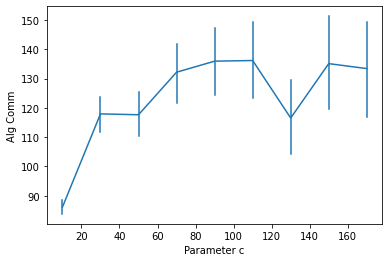

In [ ]:
sns.lineplot(x="Parameter c",y="Alg Comm", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Alg Makespan', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [final2[0][k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Alg Makespan  Parameter c
0         59.572481         10.0
1         42.405343         10.0
2         41.535116         10.0
3        113.863453         10.0
4        310.131235         10.0
...             ...          ...
62995     53.229699        170.0
62996   1327.180758        170.0
62997     52.150094        170.0
62998     60.741294        170.0
62999     51.638554        170.0

[63000 rows x 2 columns]

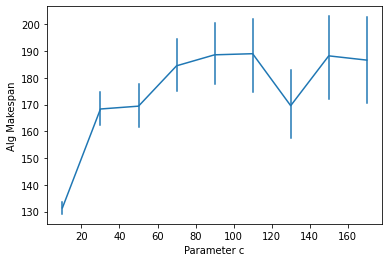

In [ ]:
sns.lineplot(x="Parameter c",y="Alg Makespan", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Opt Makespan', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [final2[4][k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Opt Makespan  Parameter c
0         59.572481         10.0
1         42.405343         10.0
2         41.535116         10.0
3         38.637482         10.0
4         25.116458         10.0
...             ...          ...
62995     53.229699        170.0
62996     42.061898        170.0
62997     52.150094        170.0
62998     60.741294        170.0
62999     51.638554        170.0

[63000 rows x 2 columns]

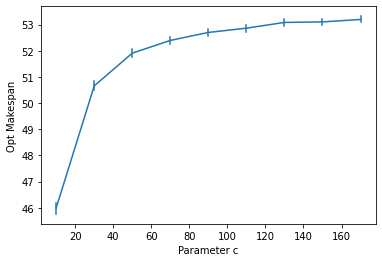

In [ ]:
sns.lineplot(x="Parameter c",y="Opt Makespan", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


Randomized

Threat Based

Weighted majority

In [ ]:
# alphas = [0.01,0.25,0.5,0.75,0.99]
alphas = [10,20,30,40,50,60,70,80,90]


In [ ]:
final1 = []
final2 = []
final3 = []
samples_final = []
samples1_final = []
samples2_final = []
samples3_final = []
TALG_final = []
TALG1_final = []
TALG2_final = []
TALG3_final = []
TOPT_final = []
opt_offload_final = []
alg_offload_final = []
# gammas = [2, 4, 8, 10,20]

algs = ["Deterministic", "Randomized", "Always Offload", "Never Offload"]
makespans = ["TALGD","TALGAO","TALGNO","TOPT"]

for c in range(9):
  samples = []
  samples1 = []
  samples2 = []
  samples3 = []
  TALG = []
  TALG1 = []
  TALG2 = []
  TALG3 = []
  TOPT = []
  opt_offload = []
  alg_offload = []
  samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload,alg_offload = generateSamples(4,4,alphas[c], samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload) #Non Monotone with Max/Min = r
  samples_final.append(samples)
  samples1_final.append(samples1)
  samples2_final.append(samples2)
  samples3_final.append(samples3)
  TALG_final.append(TALG)
  TALG1_final.append(TALG1)
  TALG2_final.append(TALG2)
  TALG3_final.append(TALG3)
  TOPT_final.append(TOPT)
  opt_offload_final.append(opt_offload)
  alg_offload_final.append(alg_offload)


final1.append(samples_final)
final1.append(samples1_final)
final1.append(samples2_final)
final1.append(samples3_final)
final2.append(TALG_final)
final2.append(TALG1_final)
final2.append(TALG3_final)
final2.append(TALG3_final)
final2.append(TOPT_final)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:136: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in double_scalars


fail best
279.25275801529983 279.2527580152999
11 11
13.678431279844435 13.678431279844435 13.678431279844435
fail best
264.7975680776851 264.7975680776852
11 11
15.386897667701941 15.386897667701941 15.386897667701941
fail best
281.1632935635148 281.16329356351486
11 11
15.829593918967053 15.829593918967053 15.829593918967053
fail best
260.6439409993502 260.64394099935026
11 11
28.97141985919859 28.97141985919859 28.97141985919859
fail best
267.04925743634647 267.0492574363465
11 11
18.999654698349413 18.999654698349413 18.999654698349413
6442 7000
fail best
289.794848466805 289.79484846680504
11 11
6.039021264054666 6.039021264054666 6.039021264054666
fail best
269.3526331316174 269.35263313161744
11 11
20.3075830645953 20.3075830645953 20.3075830645953
fail best
336.41528447935445 336.4152844793545
11 11
18.413708612594007 18.413708612594007 18.413708612594007
fail best
293.9243460472982 293.92434604729823
11 11
18.260238107857603 18.260238107857603 18.260238107857603
6693 7000
fail

In [ ]:
df_main1 = pd.DataFrame(columns = ['Performance', 'Parameter c', 'Alg'])

In [ ]:
def populate(df):
  for k in range(4):
    if k != 1:
      for i in range(9):
        for j in range(7000):
          df.loc[len(df.index)] = [final1[k][i][j], alphas[i], algs[k]]
  return df

In [ ]:
populate(df_main1)

Performance Parameter c            Alg
0          1.000000          10  Deterministic
1          1.000000          10  Deterministic
2          8.203499          10  Deterministic
3          5.450606          10  Deterministic
4          3.416493          10  Deterministic
...             ...         ...            ...
188995     1.000000          90  Never Offload
188996     1.000000          90  Never Offload
188997     1.086405          90  Never Offload
188998     1.000000          90  Never Offload
188999     1.000000          90  Never Offload

[189000 rows x 3 columns]

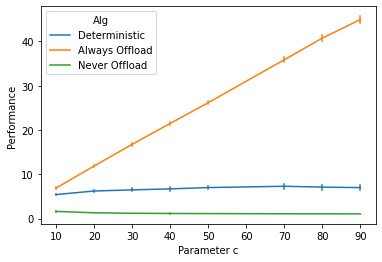

In [ ]:
sns.lineplot(x="Parameter c",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

In [ ]:
df_main3 = pd.DataFrame(columns = ['Offload Point', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [opt_offload_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Offload Point Parameter c
0                19          10
1                19          10
2                 6          10
3                 5          10
4                 7          10
...             ...         ...
62995            19          90
62996            19          90
62997             2          90
62998            19          90
62999            19          90

[63000 rows x 2 columns]

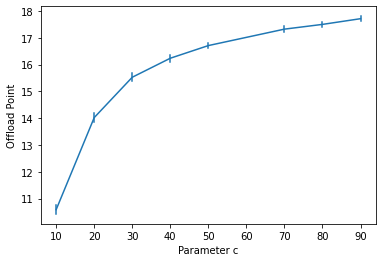

In [ ]:
sns.lineplot(x="Parameter c",y="Offload Point", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Alg Offload Point', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [alg_offload_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Alg Offload Point Parameter c
0                    16          10
1                    19          10
2                     4          10
3                    15          10
4                    19          10
...                 ...         ...
62995                19          90
62996                19          90
62997                19          90
62998                14          90
62999                19          90

[63000 rows x 2 columns]

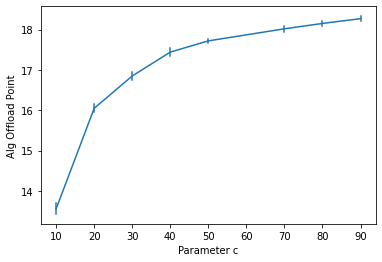

In [ ]:
sns.lineplot(x="Parameter c",y="Alg Offload Point", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


Threat Based Algo

In [ ]:

samples = []
samples1 = []
ratio_theory = []
verify = []
verify1 = []

def generateSamples(r, i, c, samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload):
  
  k=0
  l = 0
  for j in range(7000):
    #j = math.floor(random.random()*7000)
    #current_comms_uniform = [k/randComm(r,link_rate) for k in input_data_real] #Non Monotone
    # current_comms_uniform = [input_data_real[0]/linkrate(i)]
    # for k in input_data_monotone[:len(input_data_monotone)-1]:
    #   current_comms_uniform.append(randMonoComm(r,current_comms_uniform[-1])) #Monotone
    # current_comms_uniform = [input_data_real[0]/linkrate(i)]
    # for k in input_data_real[:len(input_data_real)-1]:
    #   current_comms_uniform.append(randComm(r,input_data_real[0]/linkrate(i))) #Non Monotone  
    # current_comms_uniform.append(0)
    

    
    # print(current_comms_uniform)
    #Checking for Monotone
    # for x in range(1,len(current_comms_uniform)):
    #   if current_comms_uniform[x] > current_comms_uniform[x-1]:
    #     print("FAIL")
    #     break
    
    current_comps_local = vgg16_compute_values_local_array[i][j]
    current_comps_remote = vgg16_compute_values_remote_expected
    for z in range(len(current_comps_local)):
      if current_comps_local[z] < current_comps_remote[z]:
        print(z)

    current_comps_local_expected = np.mean(vgg16_compute_values_local_array[i],axis=0)
    # print("Diff",current_comps_local_expected-current_comps_remote)
    # print(current_comps_local_expected,current_comps_remote)
    #print(np.shape(vgg16_compute_values_local_array))
    # current_comms_uniform = [(1-c)*(sum(current_comps_local_expected)-sum(current_comps_remote)) + 2*c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))]
    current_comms_uniform = [0.000001+c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))]
    
    r_layer = random.random()*len(current_comps_local)
    for p in range(len(current_comps_local)-1):
      # current_comms_uniform.append(max(current_comms_uniform[-1]-(current_comps_local[p]-current_comps_remote[p])-current_comms_uniform[-1]/100,0.01))
      # if r_layer < p+1:
      #   current_comms_uniform.append(sum(current_comps_local_expected)-sum(current_comps_remote))
      # else:
      #   current_comms_uniform.append(0)
      # current_comms_uniform.append(randMonoCommB(r,current_comms_uniform[-1],current_comms_uniform[0]))
      # current_comms_uniform.append(randMonoComm(r,current_comms_uniform[-1]))
      # current_comms_uniform.append(randCommGamma(r,current_comms_uniform[-1], current_comps_local_expected[p]-current_comps_remote[p])) #Non Monotone with Gamma    
      # current_comms_uniform.append((1-c)*(sum(current_comps_local_expected)-sum(current_comps_remote)) + 2*c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
      current_comms_uniform.append(0.000001+c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
      # current_comms_uniform.append(random.random()*c*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
    current_comms_uniform.append(0)

    # print(len(current_comms_uniform),len(current_comps_local),len(current_comps_remote))
    opt_best_point, opt_best, best_R, best_comm = OPT(current_comms_uniform,current_comps_local,current_comps_remote)
    alg_best_point, alg_best, c_cut, best_point, best, c_opt = ALG(current_comms_uniform,current_comps_local,current_comps_remote)
    # print(opt_best_point,alg_best_point)
    # print(current_comms_uniform,current_comps_local,current_comps_remote)
    # print("OPT",opt_best_point, opt_best)
    # print("ALG",alg_best_point,alg_best, best_point)
    # print(sum(current_comps_local))
    # print("ALG1",alg_best_point1,alg_best1, best_point1)
    # if opt_best_point != alg_best_point:
    #   print("Opt best point from algo",best_point)
    #   print("Opt best point",opt_best_point)
    #   print("Alg best point",alg_best_point)

    # rho_theory_best = 1 + (1-p)*c_cut/(c_opt + sum(current_comps_remote))
    # M = len(mins)
    # performance_best = math.pow((1-p),M)*algI
    # for m in range(len(mins)):
    #   min_m = sum(current_comps_local[:mins[m]]) + current_comms_uniform[mins[m]] +  sum(current_comps_remote[mins[m]:])
    #   min_pair = np.minimum(alg_best,min_m)
    #   performance_best = performance_best + p*(math.pow((1-p),(M-m-1)))*min_pair

    
    # if offl < length:
    #   alg_best1 = sum(current_comps_local[:offl]) + current_comms_uniform[offl] + sum(current_comps_remote[offl:])
    # else :
    #   alg_best1 = sum(current_comps_local[:opt_best_point]) + current_comms_uniform[opt_best_point] + current_comms_uniform[opt_best_point] + sum(current_comps_remote[opt_best_point:])

    alg_best2 = sum(current_comps_local[:0]) + current_comms_uniform[0] + sum(current_comps_remote[0:])
    alg_best3 = sum(current_comps_local[:len(current_comps_local)]) + current_comms_uniform[len(current_comps_local)] + sum(current_comps_remote[len(current_comps_local):])

    # print(current_comms_uniform[0], sum(current_comps_remote[0:]), alg_best2, opt_best, opt_best_point)
    # print(current_comms_uniform,current_comps_local,current_comps_remote)

    k = k + 1

    if opt_best_point != 0:
      l = l + 1

    

    if best_point != opt_best_point:
      print("best point mismatch", best_point, opt_best_point, alg_best_point)
      print(current_comms_uniform,current_comps_local,current_comps_remote)
      # print(current_comps_remote)
      # print(current_comps_local)
      # print(current_comms_uniform)
      # print(opt_best, alg_best)
      print(min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote))
      point, span = min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote)
      if point != opt_best_point:
        print("Opt point mismatch", point, opt_best_point)

    # if best != opt_best:
    #   print("opt makespan mismatch", best, opt_best, alg_best)

    if alg_best < opt_best:
      print("fail best")
      print(alg_best,opt_best)
      print(alg_best_point, opt_best_point)    
      print(best_comm, c_opt, c_cut)
      exit(1)

    if alg_best_point < opt_best_point:
      print("fail best point")
      print(alg_best,opt_best)
      exit(1)
      
    samples.append(alg_best/opt_best)
    samples2.append(alg_best2/opt_best)
    samples3.append(alg_best3/opt_best)
    TALG.append(alg_best)
    TALG2.append(alg_best2)
    TALG3.append(alg_best3)
    TOPT.append(opt_best)
    opt_offload.append(opt_best_point)
    alg_offload.append(alg_best_point)
    ratio_theory.append((1+best_R/best_comm)*(1+r)*(e/(e-1))) # non monotone
    try:
      ro = 1+best_R/best_comm
      # print(ro, best_comm)
    except:
      print(best_R,best_comm)
  print(l,k)
  return (samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload)

In [ ]:
# alphas = [0.01,0.25,0.5,0.75,0.99]
alphas = [10,20,30,40,50,60,70,80,90]


In [ ]:
final1 = []
final2 = []
final3 = []
samples_final = []
samples1_final = []
samples2_final = []
samples3_final = []
TALG_final = []
TALG1_final = []
TALG2_final = []
TALG3_final = []
TOPT_final = []
opt_offload_final = []
alg_offload_final = []
# gammas = [2, 4, 8, 10,20]

algs = ["Deterministic", "Randomized", "Always Offload", "Never Offload"]
makespans = ["TALGD","TALGAO","TALGNO","TOPT"]

for c in range(9):
  samples = []
  samples1 = []
  samples2 = []
  samples3 = []
  TALG = []
  TALG1 = []
  TALG2 = []
  TALG3 = []
  TOPT = []
  opt_offload = []
  alg_offload = []
  samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload,alg_offload = generateSamples(4,4,alphas[c], samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload, alg_offload) #Non Monotone with Max/Min = r
  samples_final.append(samples)
  samples1_final.append(samples1)
  samples2_final.append(samples2)
  samples3_final.append(samples3)
  TALG_final.append(TALG)
  TALG1_final.append(TALG1)
  TALG2_final.append(TALG2)
  TALG3_final.append(TALG3)
  TOPT_final.append(TOPT)
  opt_offload_final.append(opt_offload)
  alg_offload_final.append(alg_offload)


final1.append(samples_final)
final1.append(samples1_final)
final1.append(samples2_final)
final1.append(samples3_final)
final2.append(TALG_final)
final2.append(TALG1_final)
final2.append(TALG3_final)
final2.append(TALG3_final)
final2.append(TOPT_final)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:136: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in double_scalars


fail best
279.25275801529983 279.2527580152999
11 11
13.678431279844435 13.678431279844435 13.678431279844435
fail best
264.7975680776851 264.7975680776852
11 11
15.386897667701941 15.386897667701941 15.386897667701941
fail best
281.1632935635148 281.16329356351486
11 11
15.829593918967053 15.829593918967053 15.829593918967053
fail best
260.6439409993502 260.64394099935026
11 11
28.97141985919859 28.97141985919859 28.97141985919859
fail best
267.04925743634647 267.0492574363465
11 11
18.999654698349413 18.999654698349413 18.999654698349413
6442 7000
fail best
289.794848466805 289.79484846680504
11 11
6.039021264054666 6.039021264054666 6.039021264054666
fail best
269.3526331316174 269.35263313161744
11 11
20.3075830645953 20.3075830645953 20.3075830645953
fail best
336.41528447935445 336.4152844793545
11 11
18.413708612594007 18.413708612594007 18.413708612594007
fail best
293.9243460472982 293.92434604729823
11 11
18.260238107857603 18.260238107857603 18.260238107857603
6693 7000
fail

In [ ]:
df_main1 = pd.DataFrame(columns = ['Performance', 'Parameter c', 'Alg'])

In [ ]:
def populate(df):
  for k in range(4):
    if k != 1:
      for i in range(9):
        for j in range(7000):
          df.loc[len(df.index)] = [final1[k][i][j], alphas[i], algs[k]]
  return df

In [ ]:
populate(df_main1)

Performance Parameter c            Alg
0          1.000000          10  Deterministic
1          1.000000          10  Deterministic
2          8.203499          10  Deterministic
3          5.450606          10  Deterministic
4          3.416493          10  Deterministic
...             ...         ...            ...
188995     1.000000          90  Never Offload
188996     1.000000          90  Never Offload
188997     1.086405          90  Never Offload
188998     1.000000          90  Never Offload
188999     1.000000          90  Never Offload

[189000 rows x 3 columns]

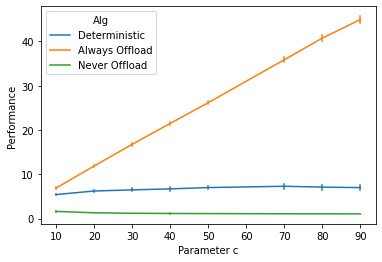

In [ ]:
sns.lineplot(x="Parameter c",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

In [ ]:
df_main3 = pd.DataFrame(columns = ['Offload Point', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [opt_offload_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Offload Point Parameter c
0                19          10
1                19          10
2                 6          10
3                 5          10
4                 7          10
...             ...         ...
62995            19          90
62996            19          90
62997             2          90
62998            19          90
62999            19          90

[63000 rows x 2 columns]

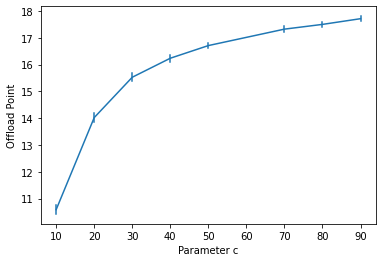

In [ ]:
sns.lineplot(x="Parameter c",y="Offload Point", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Alg Offload Point', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(9):
    for j in range(7000):
      df.loc[len(df.index)] = [alg_offload_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Alg Offload Point Parameter c
0                    16          10
1                    19          10
2                     4          10
3                    15          10
4                    19          10
...                 ...         ...
62995                19          90
62996                19          90
62997                19          90
62998                14          90
62999                19          90

[63000 rows x 2 columns]

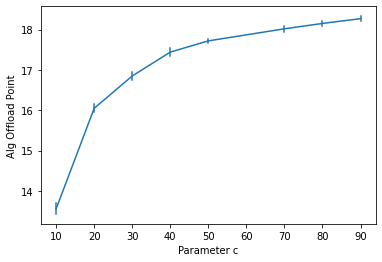

In [ ]:
sns.lineplot(x="Parameter c",y="Alg Offload Point", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


Ratio

In [ ]:

samples = []
samples1 = []
ratio_theory = []
verify = []
verify1 = []

def generateSamples(r, i, c, samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload):
  
  k=0
  l = 0
  for j in range(7000):
    #j = math.floor(random.random()*7000)
    #current_comms_uniform = [k/randComm(r,link_rate) for k in input_data_real] #Non Monotone
    # current_comms_uniform = [input_data_real[0]/linkrate(i)]
    # for k in input_data_monotone[:len(input_data_monotone)-1]:
    #   current_comms_uniform.append(randMonoComm(r,current_comms_uniform[-1])) #Monotone
    # current_comms_uniform = [input_data_real[0]/linkrate(i)]
    # for k in input_data_real[:len(input_data_real)-1]:
    #   current_comms_uniform.append(randComm(r,input_data_real[0]/linkrate(i))) #Non Monotone  
    # current_comms_uniform.append(0)
    

    
    # print(current_comms_uniform)
    #Checking for Monotone
    # for x in range(1,len(current_comms_uniform)):
    #   if current_comms_uniform[x] > current_comms_uniform[x-1]:
    #     print("FAIL")
    #     break
    
    current_comps_local = vgg16_compute_values_local_array[i][j]
    current_comps_remote = vgg16_compute_values_remote_expected
    for z in range(len(current_comps_local)):
      if current_comps_local[z] < current_comps_remote[z]:
        print(z)

    current_comps_local_expected = np.mean(vgg16_compute_values_local_array[i],axis=0)
    # print("Diff",current_comps_local_expected-current_comps_remote)
    # print(current_comps_local_expected,current_comps_remote)
    #print(np.shape(vgg16_compute_values_local_array))
    # current_comms_uniform = [(1-c)*(sum(current_comps_local_expected)-sum(current_comps_remote)) + 2*c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))]
    current_comms_uniform = [0.0001+c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))]
    
    r_layer = random.random()*len(current_comps_local)
    for p in range(len(current_comps_local)-1):
      # current_comms_uniform.append(max(current_comms_uniform[-1]-(current_comps_local[p]-current_comps_remote[p])-current_comms_uniform[-1]/100,0.01))
      # if r_layer < p+1:
      #   current_comms_uniform.append(sum(current_comps_local_expected)-sum(current_comps_remote))
      # else:
      #   current_comms_uniform.append(0)
      # current_comms_uniform.append(randMonoCommB(r,current_comms_uniform[-1],current_comms_uniform[0]))
      # current_comms_uniform.append(randMonoComm(r,current_comms_uniform[-1]))
      # current_comms_uniform.append(randCommGamma(r,current_comms_uniform[-1], current_comps_local_expected[p]-current_comps_remote[p])) #Non Monotone with Gamma    
      # current_comms_uniform.append((1-c)*(sum(current_comps_local_expected)-sum(current_comps_remote)) + 2*c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
      current_comms_uniform.append(0.0001+c*random.random()*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
      # current_comms_uniform.append(random.random()*c*(sum(current_comps_local_expected)-sum(current_comps_remote))) #Non Monotone with Gamma 
    current_comms_uniform.append(0)

    # print(len(current_comms_uniform),len(current_comps_local),len(current_comps_remote))
    opt_best_point, opt_best, best_R, best_comm = OPT(current_comms_uniform,current_comps_local,current_comps_remote)
    alg_best_point, alg_best, c_cut, best_point, best, c_opt = ALG(current_comms_uniform,current_comps_local,current_comps_remote)
    prob_sum, prob_sum1, length, alg_best_point1, offl, c_cut1, best_point1, best1, c_opt1 = ALG_RAND(current_comms_uniform,current_comps_local,current_comps_remote)
    # print(opt_best_point,alg_best_point)
    # print(current_comms_uniform,current_comps_local,current_comps_remote)
    # print("OPT",opt_best_point, opt_best)
    # print("ALG",alg_best_point,alg_best, best_point)
    # print(sum(current_comps_local))
    # print("ALG1",alg_best_point1,alg_best1, best_point1)
    # if opt_best_point != alg_best_point:
    #   print("Opt best point from algo",best_point)
    #   print("Opt best point",opt_best_point)
    #   print("Alg best point",alg_best_point)

    # rho_theory_best = 1 + (1-p)*c_cut/(c_opt + sum(current_comps_remote))
    # M = len(mins)
    # performance_best = math.pow((1-p),M)*algI
    # for m in range(len(mins)):
    #   min_m = sum(current_comps_local[:mins[m]]) + current_comms_uniform[mins[m]] +  sum(current_comps_remote[mins[m]:])
    #   min_pair = np.minimum(alg_best,min_m)
    #   performance_best = performance_best + p*(math.pow((1-p),(M-m-1)))*min_pair

    
    # if offl < length:
    #   alg_best1 = sum(current_comps_local[:offl]) + current_comms_uniform[offl] + sum(current_comps_remote[offl:])
    # else :
    #   alg_best1 = sum(current_comps_local[:opt_best_point]) + current_comms_uniform[opt_best_point] + current_comms_uniform[opt_best_point] + sum(current_comps_remote[opt_best_point:])

    alg_best1 = sum(current_comps_local[:offl]) + current_comms_uniform[offl] + sum(current_comps_remote[offl:])
    alg_best2 = sum(current_comps_local[:0]) + current_comms_uniform[0] + sum(current_comps_remote[0:])
    alg_best3 = sum(current_comps_local[:len(current_comps_local)]) + current_comms_uniform[len(current_comps_local)] + sum(current_comps_remote[len(current_comps_local):])

    # print(current_comms_uniform[0], sum(current_comps_remote[0:]), alg_best2, opt_best, opt_best_point)
    # print(current_comms_uniform,current_comps_local,current_comps_remote)

    k = k + 1

    if opt_best_point != 0:
      l = l + 1

    

    if best_point != opt_best_point:
      print("best point mismatch", best_point, opt_best_point, alg_best_point)
      print(current_comms_uniform,current_comps_local,current_comps_remote)
      # print(current_comps_remote)
      # print(current_comps_local)
      # print(current_comms_uniform)
      # print(opt_best, alg_best)
      print(min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote))
      point, span = min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote)
      if point != opt_best_point:
        print("Opt point mismatch", point, opt_best_point)

    # if best != opt_best:
    #   print("opt makespan mismatch", best, opt_best, alg_best)

    if alg_best < opt_best:
      print("fail best")
      print(alg_best,opt_best)
      print(alg_best_point, opt_best_point)    
      print(best_comm, c_opt, c_cut)
      exit(1)

    if alg_best_point < opt_best_point:
      print("fail best point")
      print(alg_best,opt_best)
      exit(1)
      
    samples.append(alg_best/opt_best)
    samples1.append(alg_best1/opt_best)
    samples2.append(alg_best2/opt_best)
    samples3.append(alg_best3/opt_best)
    TALG.append(alg_best)
    TALG1.append(alg_best1)
    TALG2.append(alg_best2)
    TALG3.append(alg_best3)
    TOPT.append(opt_best)
    opt_offload.append(opt_best_point)
    ratio_theory.append((1+best_R/best_comm)*(1+r)*(e/(e-1))) # non monotone
    try:
      ro = 1+best_R/best_comm
      # print(ro, best_comm)
    except:
      print(best_R,best_comm)
    verify.append(prob_sum)
    verify1.append(prob_sum1)
  print(l,k)
  return (samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload)

Different Starting Latencies

In [ ]:
# alphas = [0.01,0.25,0.5,0.75,0.99]
alphas = [10,20,30,40,50,50,70,80,90]


In [ ]:
final1 = []
final2 = []
final3 = []
samples_final = []
samples1_final = []
samples2_final = []
samples3_final = []
TALG_final = []
TALG1_final = []
TALG2_final = []
TALG3_final = []
TOPT_final = []
opt_offload_final = []
# gammas = [2, 4, 8, 10,20]

algs = ["Deterministic","Randomized", "Always Offload", "Never Offload"]
makespans = ["TALGD","TALGR","TALGAO","TALGNO","TOPT"]

for c in range(9):
  samples = []
  samples1 = []
  samples2 = []
  samples3 = []
  TALG = []
  TALG1 = []
  TALG2 = []
  TALG3 = []
  TOPT = []
  opt_offload = []
  samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload = generateSamples(4,4,alphas[c], samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload) #Non Monotone with Max/Min = r
  samples_final.append(samples)
  samples1_final.append(samples1)
  samples2_final.append(samples2)
  samples3_final.append(samples3)
  TALG_final.append(TALG)
  TALG1_final.append(TALG1)
  TALG2_final.append(TALG2)
  TALG3_final.append(TALG3)
  TOPT_final.append(TOPT)
  opt_offload_final.append(opt_offload)

final1.append(samples_final)
final1.append(samples1_final)
final1.append(samples2_final)
final1.append(samples3_final)
final2.append(TALG_final)
final2.append(TALG1_final)
final2.append(TALG3_final)
final2.append(TALG3_final)
final2.append(TOPT_final)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in double_scalars


fail best
286.7889850876047 286.7889850876048
11 11
16.15441144460852 16.15441144460852 16.15441144460852
fail best
259.9942869939001 259.9942869939002
11 11
19.08796796520323 19.08796796520323 19.08796796520323
fail best
262.8846648916308 262.88466489163085
11 11
10.933773426269676 10.933773426269676 10.933773426269676
fail best
285.94304358203635 285.9430435820364
11 11
22.37672881859315 22.37672881859315 22.37672881859315
fail best
135.4177252913251 135.41772529132513
11 11
21.502679740602105 21.502679740602105 21.502679740602105
fail best
261.84029556683697 261.840295566837
11 11
10.108100574936593 10.108100574936593 10.108100574936593
fail best
319.7819144938311 319.78191449383115
11 11
32.66353391167094 32.66353391167094 32.66353391167094
fail best
299.92854610544816 299.9285461054482
11 11
15.376917790626885 15.376917790626885 15.376917790626885
6417 7000
fail best
351.0165447200411 351.01654472004117
11 11
18.52191430472908 18.52191430472908 18.52191430472908
6671 7000
fail bes

In [ ]:
f = np.array(final1) # RL+(0-10RL)

In [ ]:
f.shape

(4, 1, 7000)

In [ ]:
f.mean(axis=2)

array([[1.04075199],
       [6.51021566],
       [5.79827951],
       [1.00052991]])

In [ ]:
f = np.array(opt_offload_final) # (0-100RL)

In [ ]:
f.shape

(1, 7000)

In [ ]:
f.mean()

18.84657142857143

In [ ]:
f = np.array(final1)

In [ ]:
f.shape

(4, 1, 7000)

In [ ]:
f.mean(axis=2)

array([[ 6.62537258],
       [49.06384054],
       [49.44545355],
       [ 1.0690206 ]])

In [ ]:
f = np.array(opt_offload_final)

In [ ]:
f.shape

(1, 7000)

In [ ]:
f.mean()

17.886285714285716

In [ ]:
means = []
def populate(df):
  for k in range(4):
    mean = []
    for i in range(10):
       mean.append(np.mean(f[k][i]))
  return df

In [ ]:
df_main1 = pd.DataFrame(columns = ['Performance', 'Parameter c', 'Alg'])

In [ ]:
def populate(df):
  for k in range(4):
    for i in range(9):
      for j in range(7000):
        df.loc[len(df.index)] = [final1[k][i][j], alphas[i], algs[k]]
  return df

In [ ]:
populate(df_main1)

Performance Parameter c            Alg
0          1.000000          10  Deterministic
1         29.967514          10  Deterministic
2          1.000000          10  Deterministic
3          5.375280          10  Deterministic
4          4.247362          10  Deterministic
...             ...         ...            ...
251995     1.157441          90  Never Offload
251996     1.000000          90  Never Offload
251997     1.000000          90  Never Offload
251998     1.000000          90  Never Offload
251999     1.000000          90  Never Offload

[252000 rows x 3 columns]

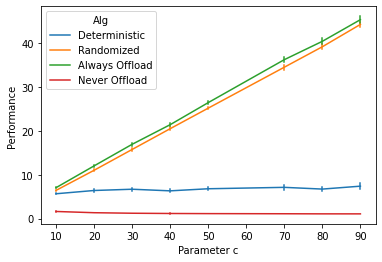

In [ ]:
sns.lineplot(x="Parameter c",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\

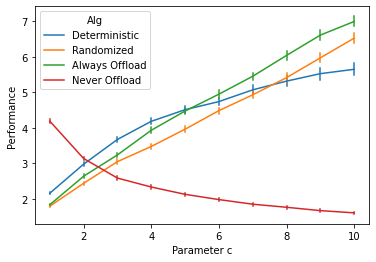

In [ ]:
sns.lineplot(x="Parameter c",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main3 = pd.DataFrame(columns = ['Offload Point', 'Parameter c'])

In [ ]:
def populate(df):
  for k in range(5):
    for j in range(7000):
      df.loc[len(df.index)] = [opt_offload_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Offload Point Parameter c
0                 0           1
1                 2           1
2                 0           1
3                 4           1
4                 0           1
...             ...         ...
34995             1           5
34996             2           5
34997             5           5
34998             1           5
34999            19           5

[35000 rows x 2 columns]

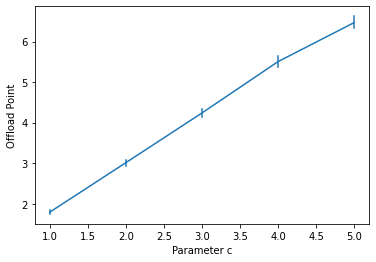

In [ ]:
sns.lineplot(x="Parameter c",y="Offload Point", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


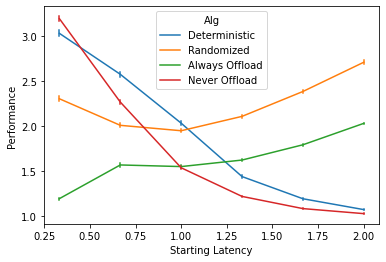

In [ ]:
sns.lineplot(x="Starting Latency",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


Gamma Non Monotonic

In [ ]:
alphas = [2,4,8,16]

In [ ]:
final1 = []
final2 = []
final3 = []
samples_final = []
samples1_final = []
samples2_final = []
samples3_final = []
TALG_final = []
TALG1_final = []
TALG2_final = []
TALG3_final = []
TOPT_final = []
opt_offload_final = []
# gammas = [2, 4, 8, 10,20]

algs = ["Deterministic","Randomized", "Always Offload", "Never Offload"]
makespans = ["TALGD","TALGR","TALGAO","TALGNO","TOPT"]

for i in range(4):
  samples = []
  samples1 = []
  samples2 = []
  samples3 = []
  TALG = []
  TALG1 = []
  TALG2 = []
  TALG3 = []
  TOPT = []
  opt_offload = []
  samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload = generateSamples(4, i, 1, samples, samples1, samples2, samples3, TALG, TALG1, TALG2, TALG3, TOPT, opt_offload) #Non Monotone with Max/Min = r
  samples_final.append(samples)
  samples1_final.append(samples1)
  samples2_final.append(samples2)
  samples3_final.append(samples3)
  TALG_final.append(TALG)
  TALG1_final.append(TALG1)
  TALG2_final.append(TALG2)
  TALG3_final.append(TALG3)
  TOPT_final.append(TOPT)
  opt_offload_final.append(opt_offload)

final1.append(samples_final)
final1.append(samples1_final)
final1.append(samples2_final)
final1.append(samples3_final)
final2.append(TALG_final)
final2.append(TALG1_final)
final2.append(TALG3_final)
final2.append(TALG3_final)
final2.append(TOPT_final)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:137: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: divide by zero encountered in double_scalars


4781 7000
4716 7000
4799 7000
4886 7000


In [ ]:
df_main3 = pd.DataFrame(columns = ['Offload Point', 'Alpha Max'])

In [ ]:
def populate(df):
  for k in range(4):
    for j in range(7000):
      df.loc[len(df.index)] = [opt_offload_final[k][j], alphas[k]]
  return df

In [ ]:
populate(df_main3)

Offload Point Alpha Max
0                 2         2
1                 1         2
2                 0         2
3                 0         2
4                 1         2
...             ...       ...
27995             1        16
27996             1        16
27997             2        16
27998             1        16
27999             1        16

[28000 rows x 2 columns]

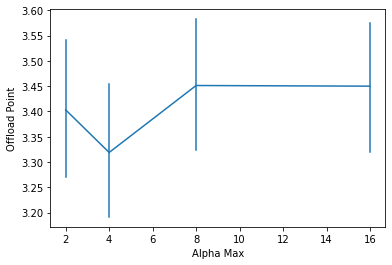

In [ ]:
sns.lineplot(x="Alpha Max",y="Offload Point", data=df_main3, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main1 = pd.DataFrame(columns = ['Performance', 'Alpha Max', 'Alg'])

In [ ]:
def populate(df):
  for k in range(4):
    for i in range(4):
      for j in range(7000):
        df.loc[len(df.index)] = [final1[k][i][j], alphas[i], algs[k]]
  return df

In [ ]:
populate(df_main1)

Performance Alpha Max            Alg
0          1.365271         2  Deterministic
1          1.549895         2  Deterministic
2          1.648982         2  Deterministic
3          1.875158         2  Deterministic
4          1.454053         2  Deterministic
...             ...       ...            ...
111995     1.018042        16  Never Offload
111996     1.017360        16  Never Offload
111997     1.210819        16  Never Offload
111998     1.098112        16  Never Offload
111999     1.011732        16  Never Offload

[112000 rows x 3 columns]

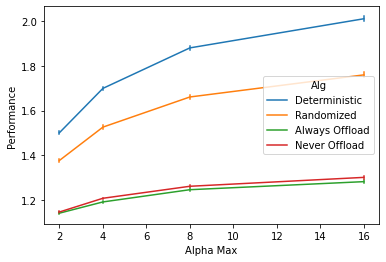

In [ ]:
sns.lineplot(x="Alpha Max",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


In [ ]:
df_main2 = pd.DataFrame(columns = ['Makespan', 'Alpha Max', 'Alg'])

In [ ]:
def populate(df):
  for k in range(5):
    for i in range(4):
      for j in range(7000):
        df.loc[len(df.index)] = [final2[k][i][j], alphas[i], makespans[k]]
  return df

In [ ]:
populate(df_main2)

Makespan Alpha Max    Alg
0        59.043034         2  TALGD
1        77.228014         2  TALGD
2        25.237743         2  TALGD
3        29.089919         2  TALGD
4        24.942148         2  TALGD
...            ...       ...    ...
139995   56.383467        16   TOPT
139996   85.815771        16   TOPT
139997   34.872185        16   TOPT
139998  170.383349        16   TOPT
139999   29.665027        16   TOPT

[140000 rows x 3 columns]

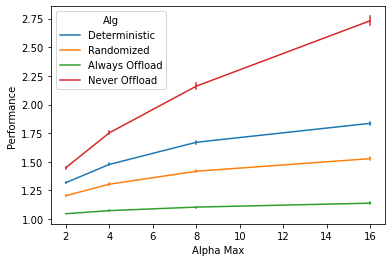

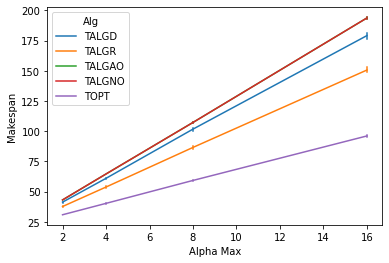

In [ ]:
sns.lineplot(x="Alpha Max",y="Makespan", hue="Alg", data=df_main2, err_style="bars", ci=95)


Alexnet-Extreme randomness slowdown

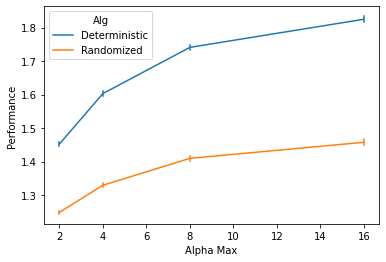

In [ ]:
sns.lineplot(x="Alpha Max",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


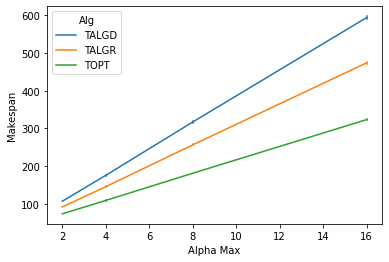

In [ ]:
sns.lineplot(x="Alpha Max",y="Makespan", hue="Alg", data=df_main2, err_style="bars", ci=95)


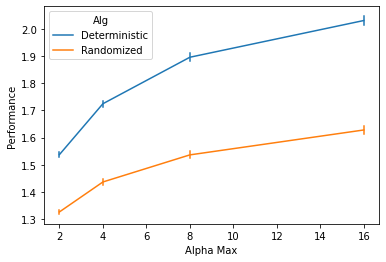

In [ ]:
sns.lineplot(x="Alpha Max",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95)


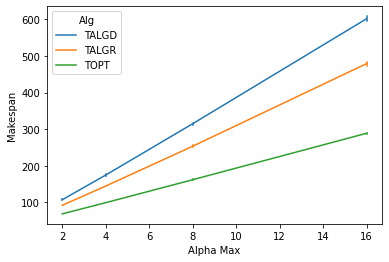

In [ ]:
sns.lineplot(x="Alpha Max",y="Makespan", hue="Alg", data=df_main2, err_style="bars", ci=95)


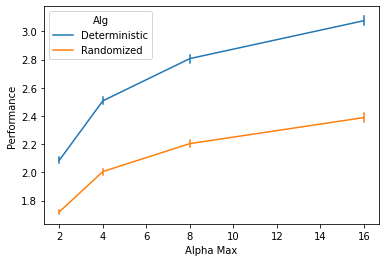

In [ ]:
sns.lineplot(x="Alpha Max",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95)


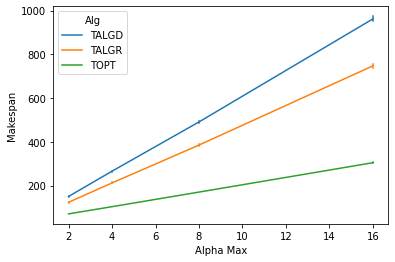

In [ ]:
sns.lineplot(x="Alpha Max",y="Makespan", hue="Alg", data=df_main2, err_style="bars", ci=95) #TOPT drops with gamma increasing, check why and what can we do to utilize that


VGG16-Extreme randomness slowdown

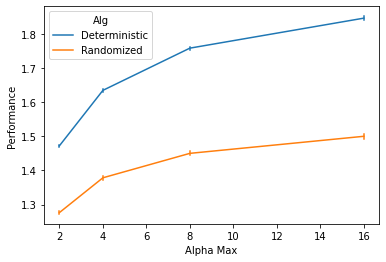

In [ ]:
sns.lineplot(x="Alpha Max",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95) # bounded by 2 even for gamma 4 ?\


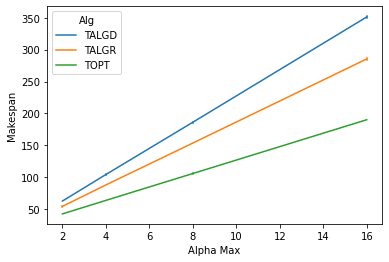

In [ ]:
sns.lineplot(x="Alpha Max",y="Makespan", hue="Alg", data=df_main2, err_style="bars", ci=95)


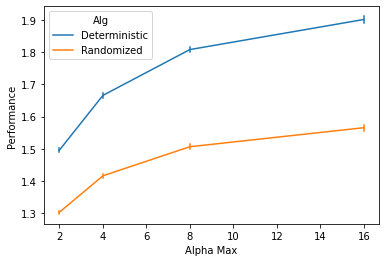

In [ ]:
sns.lineplot(x="Alpha Max",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95)


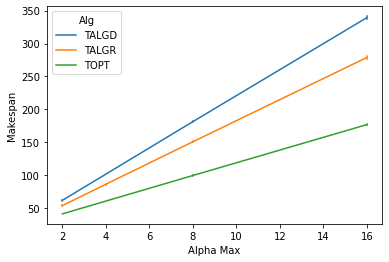

In [ ]:
sns.lineplot(x="Alpha Max",y="Makespan", hue="Alg", data=df_main2, err_style="bars", ci=95)


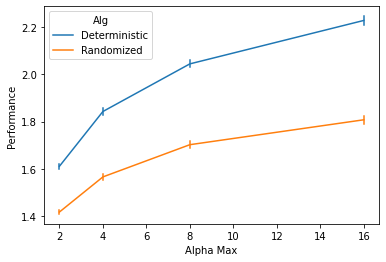

In [ ]:
sns.lineplot(x="Alpha Max",y="Performance", hue="Alg", data=df_main1, err_style="bars", ci=95)


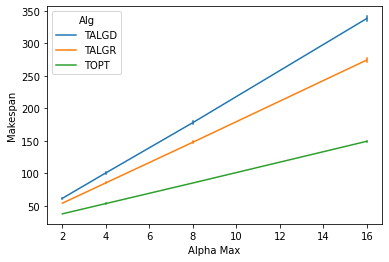

In [ ]:
sns.lineplot(x="Alpha Max",y="Makespan", hue="Alg", data=df_main2, err_style="bars", ci=95) #TOPT drops with gamma increasing, check why and what can we do to utilize that


In [ ]:
df_main1

Makespan Section

In [ ]:
# For The makespans not the ratio

samples = []
samples1 = []
ratio_theory = []
verify = []
verify1 = []

def generateSamples1(r,i,TALG,TALG1,TOPT):
  
  k=0
  l = 0
  for j in range(7000):
    #j = math.floor(random.random()*7000)
    #current_comms_uniform = [k/randComm(r,link_rate) for k in input_data_real] #Non Monotone
    # current_comms_uniform = [input_data_real[0]/linkrate(i)]
    # for k in input_data_monotone[:len(input_data_monotone)-1]:
    #   current_comms_uniform.append(randMonoComm(r,current_comms_uniform[-1])) #Monotone
    # current_comms_uniform = [input_data_real[0]/linkrate(i)]
    # for k in input_data_real[:len(input_data_real)-1]:
    #   current_comms_uniform.append(randComm(r,input_data_real[0]/linkrate(i))) #Non Monotone  
    # current_comms_uniform.append(0)
    

    
    # print(current_comms_uniform)
    #Checking for Monotone
    # for x in range(1,len(current_comms_uniform)):
    #   if current_comms_uniform[x] > current_comms_uniform[x-1]:
    #     print("FAIL")
    #     break
    
    current_comps_local = vgg16_compute_values_local_array[i][j]
    current_comps_remote = vgg16_compute_values_remote_expected

    current_comps_local_expected = np.mean(vgg16_compute_values_local_array[i],axis=0)
    #print(np.shape(vgg16_compute_values_local_array))
    current_comms_uniform = [sum(current_comps_local_expected)-sum(current_comps_remote)]
    r_layer = random.random()*len(current_comps_local)
    for p in range(len(current_comps_local)):
      # current_comms_uniform.append(max(current_comms_uniform[-1]-(current_comps_local[p]-current_comps_remote[p])-current_comms_uniform[-1]/100,0.01))
      # if r_layer < p+1:
      #   current_comms_uniform.append(sum(current_comps_local_expected)-sum(current_comps_remote))
      # else:
      #   current_comms_uniform.append(0)
      # current_comms_uniform.append(randMonoCommB(r,current_comms_uniform[-1],current_comms_uniform[0]))
      # current_comms_uniform.append(randMonoComm(r,current_comms_uniform[-1]))
      current_comms_uniform.append(randCommGamma(r,current_comms_uniform[-1], current_comps_local_expected[p]-current_comps_remote[p])) #Non Monotone with Gamma    
    current_comms_uniform.append(0)

    # print(len(current_comms_uniform),len(current_comps_local),len(current_comps_remote))
    opt_best_point, opt_best, best_R, best_comm = OPT(current_comms_uniform,current_comps_local,current_comps_remote)
    alg_best_point, alg_best, c_cut, best_point, best, c_opt = ALG(current_comms_uniform,current_comps_local,current_comps_remote)
    prob_sum, prob_sum1, length, alg_best_point1, offl, c_cut1, best_point1, best1, c_opt1 = ALG_RAND(current_comms_uniform,current_comps_local,current_comps_remote)
    # print(opt_best_point,alg_best_point)
    # print(current_comms_uniform,current_comps_local,current_comps_remote)
    # print("OPT",opt_best_point, opt_best)
    # print("ALG",alg_best_point,alg_best, best_point)
    # print("ALG1",alg_best_point1,alg_best1, best_point1)
    # if opt_best_point != alg_best_point:
    #   print("Opt best point from algo",best_point)
    #   print("Opt best point",opt_best_point)
    #   print("Alg best point",alg_best_point)

    # rho_theory_best = 1 + (1-p)*c_cut/(c_opt + sum(current_comps_remote))
    # M = len(mins)
    # performance_best = math.pow((1-p),M)*algI
    # for m in range(len(mins)):
    #   min_m = sum(current_comps_local[:mins[m]]) + current_comms_uniform[mins[m]] +  sum(current_comps_remote[mins[m]:])
    #   min_pair = np.minimum(alg_best,min_m)
    #   performance_best = performance_best + p*(math.pow((1-p),(M-m-1)))*min_pair

    
    # if offl < length:
    #   alg_best1 = sum(current_comps_local[:offl]) + current_comms_uniform[offl] + sum(current_comps_remote[offl:])
    # else :
    #   alg_best1 = sum(current_comps_local[:opt_best_point]) + current_comms_uniform[opt_best_point] + current_comms_uniform[opt_best_point] + sum(current_comps_remote[opt_best_point:])

    alg_best1 = sum(current_comps_local[:offl]) + current_comms_uniform[offl] + sum(current_comps_remote[offl:])


    k = k + 1

    if opt_best_point != 0:
      l = l + 1

    

    if best_point != opt_best_point:
      print("best point mismatch", best_point, opt_best_point, alg_best_point)
      print(current_comms_uniform,current_comps_local,current_comps_remote)
      # print(current_comps_remote)
      # print(current_comps_local)
      # print(current_comms_uniform)
      # print(opt_best, alg_best)
      print(min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote))
      point, span = min_makespan_proof(current_comms_uniform,current_comps_local,current_comps_remote)
      if point != opt_best_point:
        print("Opt point mismatch", point, opt_best_point)

    # if best != opt_best:
    #   print("opt makespan mismatch", best, opt_best, alg_best)

    if alg_best < opt_best:
      print("fail best")
      print(alg_best,opt_best)
      print(alg_best_point, opt_best_point)    
      print(best_comm, c_opt, c_cut)
      exit(1)

    if alg_best_point < opt_best_point:
      print("fail best point")
      print(alg_best,opt_best)
      exit(1)
      
    samples.append(alg_best/opt_best)
    samples1.append(alg_best1/opt_best)
    TALG.append(alg_best)
    TALG1.append(alg_best1)
    TOPT.append(opt_best)
    ratio_theory.append((1+best_R/best_comm)*(1+r)*(e/(e-1))) # non monotone
    try:
      ro = 1+best_R/best_comm
      # print(ro, best_comm)
    except:
      print(best_R,best_comm)
    verify.append(prob_sum)
    verify1.append(prob_sum1)
  print(l,k)
  return (TALG, TALG1, TOPT)

In [ ]:
alphas = [2,4,8,16]

In [ ]:
final = []
TALG_final = []
TALG1_final = []
TOPT_final = []
# gammas = [2, 4, 8, 10,20]

makespans = ["TALGD","TALGR","TOPT"]
for i in range(4):
  TALG = []
  TALG1 = []
  TOPT = []
  TALG, TALG1, TOPT = generateSamples1(4,i, TALG, TALG1, TOPT) #Non Monotone with Max/Min = r
  TALG_final.append(TALG)
  TALG1_final.append(TALG1)
  TOPT_final.append(TOPT)

final.append(TALG_final)
final.append(TALG1_final)
final.append(TOPT_final)

fail best
5.462293604049787 5.462293604049788
1 1
2.6337550412831585 2.6337550412831585 2.6337550412831585
3610 7000
fail best
3.8654404289353907 3.865440428935391
4 4
0.16361066570704402 0.16361066570704402 0.16361066570704402
3584 7000
fail best
5.1278025970005885 5.127802597000589
1 1
2.359255522205185 2.359255522205185 2.359255522205185
3666 7000
3604 7000


In [ ]:
df_main = pd.DataFrame(columns = ['Performance', 'Alpha Max', 'Makespan'])

In [ ]:
def populate(df):
  for k in range(3):
    for i in range(4):
      for j in range(7000):
        df.loc[len(df.index)] = [final[k][i][j], alphas[i], makespans[k]]
  return df

In [ ]:
populate(df_main)

Performance Alpha Max Makespan
0         7.950971         2    TALGD
1         7.450061         2    TALGD
2        11.915906         2    TALGD
3         6.926128         2    TALGD
4         8.517503         2    TALGD
...            ...       ...      ...
83995    25.640407        16     TOPT
83996    30.011400        16     TOPT
83997    30.883664        16     TOPT
83998    27.185232        16     TOPT
83999    30.883664        16     TOPT

[84000 rows x 3 columns]

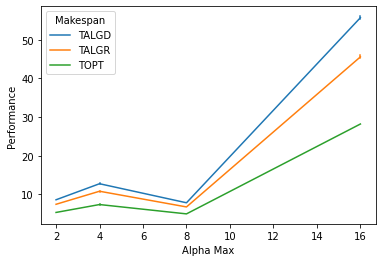

In [ ]:
sns.lineplot(x="Alpha Max",y="Performance", hue="Makespan", data=df_main, err_style="bars", ci=95)


In [ ]:
populate(df_main)

Performance Alpha Max Makespan
0        10.666021         2    TALGD
1         9.313645         2    TALGD
2        10.528461         2    TALGD
3         9.567803         2    TALGD
4         8.364935         2    TALGD
...            ...       ...      ...
83995    25.226298        16     TOPT
83996    30.883664        16     TOPT
83997    19.232121        16     TOPT
83998    30.883664        16     TOPT
83999    26.382426        16     TOPT

[84000 rows x 3 columns]

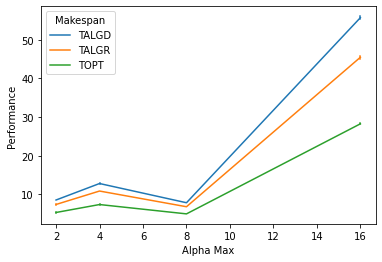

In [ ]:
sns.lineplot(x="Alpha Max",y="Performance", hue="Makespan", data=df_main, err_style="bars", ci=95)


In [ ]:
np.array(samples).shape

(7000,)

In [ ]:
np.mean(samples)

3.7193059216005944

In [ ]:
np.mean(samples1)

2.883641115407308

In [ ]:
generateSamples(0.5,1) #Monotone With 0.5 in the comm

[[0, 65.95158200800904]]
(0.036589483146336844, 4.062248664819728e-16)
[[0, 65.95158200800904]]
(0.042309189237523505, 4.697263604472146e-16)
[[0, 65.95158200800904], [8.384745412567279, 47.78585019627414]]
(0.04578723133683838, 5.083403846399646e-16)
[[0, 65.95158200800904], [8.384745412567279, 47.78585019627414]]
(0.051706733852362304, 5.740600645105765e-16)
[[0, 65.95158200800904], [8.384745412567279, 47.78585019627414]]
(0.04196370014798162, 4.658906610275528e-16)
[[0, 65.95158200800904], [8.384745412567279, 47.78585019627414]]
(0.05255645080294961, 5.834938177401395e-16)
[[0, 65.95158200800904], [8.384745412567279, 47.78585019627414]]
(0.04342849355071525, 4.821531346478919e-16)
[[0, 65.95158200800904], [8.384745412567279, 47.78585019627414]]
(0.058760342160434104, 6.523708480136626e-16)
[[0, 65.95158200800904], [8.384745412567279, 47.78585019627414]]
(0.04820205827216435, 5.351503492808036e-16)
[[0, 65.95158200800904], [8.384745412567279, 47.78585019627414]]
(0.05422229504182077,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in double_scalars


Streaming output truncated to the last 5000 lines.
[[0, 65.95158200800904]]
(0.02816086475682502, 3.126484044638225e-16)
[[0, 65.95158200800904]]
(0.02469742414083036, 2.741964893008304e-16)
[[0, 65.95158200800904]]
(0.03341653351199038, 3.7099804908169863e-16)
[[0, 65.95158200800904]]
(0.0275061393261801, 3.0537949198472635e-16)
[[0, 65.95158200800904]]
(0.02712094351352029, 3.0110295938268514e-16)
[[0, 65.95158200800904]]
(0.05122026832456527, 5.686592122141095e-16)
[[0, 65.95158200800904]]
(0.04050437692942266, 4.496889186514103e-16)
[[0, 65.95158200800904]]
(0.03246089377260652, 3.6038831666259115e-16)
[[0, 65.95158200800904]]
(0.029081740253396597, 3.2287217625489134e-16)
[[0, 65.95158200800904]]
(0.027019461726522025, 2.9997628521762934e-16)
[[0, 65.95158200800904]]
(0.028144822029744464, 3.124702944139964e-16)
[[0, 65.95158200800904]]
(0.029916856205048668, 3.3214382583245016e-16)
[[0, 65.95158200800904], [6.27184553515619, 51.62159133737746]]
(0.02948424452740627, 3.27340871380

KeyboardInterrupt: ignored

In [ ]:
np.array(samples).shape

(7000,)

In [ ]:
np.mean(samples)

1.7088232919991344

In [ ]:
np.mean(samples1)

1.4256534602090358

In [ ]:
current_comms_uniform = [input_data_real[0]/linkrate(1)]
for k in input_data_real[:len(input_data_real)-1]:
  current_comms_uniform.append(randComm(200,input_data_real[0]/linkrate(1))) #Non Monotone    
current_comms_uniform.append(0)

In [ ]:
np.max(current_comms_uniform)/np.min(current_comms_uniform[:-1])

152.0690686949368

In [ ]:
generateSamples(2,2) #Non Monotone with Max/Min = r

[0.04462711464542499, 0.05104658909960607, 0.04589654969988828, 0.051869259810685533, 0.04237922683118877, 0.0513595468583978, 0.043764706263838264, 0.05949113282635935] 0.3904341260353891
[0.044627114645425014, 0.05104658909960613, 0.0458965496998881, 0.051869259810685686, 0.042379226831188666, 0.05135954685839783, 0.04376470626383833, 0.059491132826359205] 0.39043412603538896
0 16
[0.05119070507110404, 0.06095371232396523, 0.06207183619486451, 0.07674082855449049] 0.25095708214442425
[0.051190705071104126, 0.060953712323965216, 0.06207183619486454, 0.07674082855449041] 0.25095708214442425
1 13
[0.056618457007999244, 0.055554161104757645, 0.043244182414422475, 0.05408929038442031, 0.04381271798500461, 0.04121303444726099] 0.2945318433438653
[0.05661845700799928, 0.05555416110475764, 0.043244182414422516, 0.05408929038442034, 0.04381271798500452, 0.04121303444726088] 0.2945318433438652
0 15
[0.048738819417302424, 0.04595901421204002, 0.04494996462723146, 0.053305677914103136, 0.0435142

In [ ]:
np.array(samples).shape

(7000,)

In [ ]:
ratio_final = []
samples_final = []
samples1_final = []

for x in range(len(ratio_theory)):
  if ratio_theory[x] != np.inf:
    ratio_final.append(ratio_theory[x])
    samples_final.append(samples[x])
    samples1_final.append(samples1[x])

print(len(ratio_final),len(ratio_theory))

3705 7000


In [ ]:
np.mean(samples)

1.7088232919991344

In [ ]:
np.mean(samples1)

1.4256534602090358

In [ ]:
np.mean(ratio_final)

9.742494306041154

In [ ]:
np.max(samples_final)

3.8558874420078832

In [ ]:
np.max(samples1_final)

2.519996661649304

In [ ]:
np.max(ratio_final)

6.620498799050412

In [ ]:
np.mean(verify) #Verify to be deleted and only one way of calculating to be kept

0.6910700012481019

In [ ]:
np.max(verify1)

nan

2

In [ ]:
np.mean(samples)

1.02806701955107

In [ ]:
np.mean(samples1)

1.3025504303143514

In [ ]:
np.mean(samples)

1.083422158566059

In [ ]:
np.mean(samples1)

1.3724324915369137

4

In [ ]:
np.mean(samples)

1.0966873288739762

In [ ]:
np.mean(samples1)

1.438316134876002

In [ ]:
np.mean(samples)

1.02806701955107

In [ ]:
np.mean(samples1)

1.3025504303143514

In [ ]:
np.mean(samples)

1.02806701955107

In [ ]:
#5+2rand Local Processing Time

In [ ]:
np.mean(samples)

1.649405141162513

In [ ]:
np.mean(samples1)

1.6889124554313322

In [ ]:
#7+2rand Local Processing Time

In [ ]:
np.mean(samples)

1.6553577862583224

In [ ]:
np.mean(samples1)

1.7038280995642698

8

In [ ]:
np.mean(samples)

1.28339591690938

In [ ]:
np.mean(samples1)

1.7018899534373413

In [ ]:
np.mean(samples)

1.6525667092501115

In [ ]:
np.mean(samples1)

1.8390184198195434

In [ ]:
np.mean(samples)

1.5522400367935139

In [ ]:
np.mean(samples1)

1.8022606962678334

In [ ]:
np.mean(samples)

1.7858663580222045

In [ ]:
np.mean(samples1)

1.8939382207479876

16

In [ ]:
np.mean(samples)

1.6055303585912786

In [ ]:
np.mean(samples1)

2.0083888651549784

In [ ]:
np.mean(samples)

2.126817069517567

In [ ]:
np.mean(samples1)

2.2407189669287937

In [ ]:
np.mean(samples)

1.969448851165119

In [ ]:
np.mean(samples1)

2.1601921228079934

In [ ]:
np.mean(samples)

2.2034093269259714

In [ ]:
np.mean(samples1)

2.27819408601057

In [ ]:
#5+2rand Local Processing Time

In [ ]:
np.mean(samples)

2.61793513206554

In [ ]:
np.mean(samples1)

2.4577862509331077

In [ ]:
#7+2rand Local Processing Time

In [ ]:
np.mean(samples)

2.6938787386642082

In [ ]:
np.mean(samples1)

2.470322348830529

In [ ]:
np.mean(samples1)

1.3025504303143514

In [ ]:
np.mean(samples)

1.02806701955107

In [ ]:
np.mean(samples1)

1.3025504303143514

In [ ]:
df_m

Average Performance
0             1.451865
1             1.467057
2             1.437414
3             1.451394
4             1.458143
5             1.435699

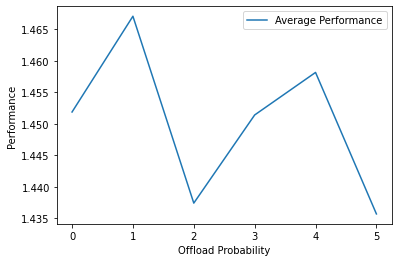

In [ ]:
ax = sns.lineplot(data=df_m, err_style="bars", ci=95)
ax.set(xlabel = "Offload Probability", ylabel="Performance")
plt.show()

In [ ]:
reset()

In [ ]:
generateSamples(3,2)

fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
451 42000


In [ ]:
df_m = pd.DataFrame(np.mean(local_ratio_best_samples,axis=1),columns=["Average Performance"],index=index)

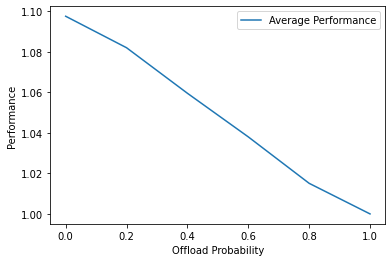

In [ ]:
ax = sns.lineplot(data=df_m, err_style="bars", ci=95)
ax.set(xlabel = "Offload Probability", ylabel="Performance")
plt.show()

In [ ]:
df_1 = pd.DataFrame(np.mean(local_alg_theory_best_samples,axis=1),columns=["Average Rho"],index=index)

In [ ]:
df_2 = pd.DataFrame(np.mean(local_performance_best_samples,axis=1),columns=["Average Tighter Rho"],index=index)

In [ ]:
df_3 = pd.DataFrame(np.mean(local_ratio_best_samples,axis=1),columns=["Average Performance"],index=index)

In [ ]:
df_performance = pd.concat([df_1, df_2, df_3], axis=1)

In [ ]:
df_p = pd.DataFrame(np.array([0,0.2,0.4,0.6,0.8,1]), columns=["p"])

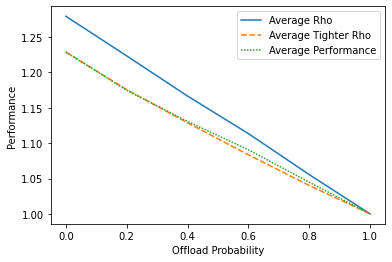

In [ ]:
ax = sns.lineplot(data=df_performance, err_style="bars", ci=95)
ax.set(xlabel = "Offload Probability", ylabel="Performance")
plt.show()

In [ ]:
df_mean1 = pd.DataFrame(np.mean(time_local_samples,axis=1), columns=["Local Processing Resource"],index=index)

In [ ]:
df_mean1

Local Processing Resource
0.0                   0.006432
0.2                   0.006424
0.4                   0.006432
0.6                   0.006462
0.8                   0.006499
1.0                   0.006523

In [ ]:
df_mean2 = pd.DataFrame(np.mean(time_comm_samples,axis=1),columns=["Communication Resource"],index=index)

In [ ]:
df_mean2

Communication Resource
0.0                0.001608
0.2                0.001919
0.4                0.002867
0.6                0.003882
0.8                0.004931
1.0                0.005813

In [ ]:
df_mean3 = pd.DataFrame(np.mean(time_remote_samples,axis=1),columns=["Remote Processing Resource"],index=index)

In [ ]:
df_mean3

Remote Processing Resource
0.0                    0.000090
0.2                    0.000191
0.4                    0.000322
0.6                    0.000472
0.8                    0.000589
1.0                    0.000745

In [ ]:
df_p = pd.DataFrame(np.array([0,0.2,0.4,0.6,0.8,1]), columns=["p"])

In [ ]:
df_mean_time = pd.concat([df_mean1, df_mean2, df_mean3], axis=1)

In [ ]:
df_mean_time

Local Processing Resource  ...  Remote Processing Resource
0.0                   0.006432  ...                    0.000090
0.2                   0.006424  ...                    0.000191
0.4                   0.006432  ...                    0.000322
0.6                   0.006462  ...                    0.000472
0.8                   0.006499  ...                    0.000589
1.0                   0.006523  ...                    0.000745

[6 rows x 3 columns]

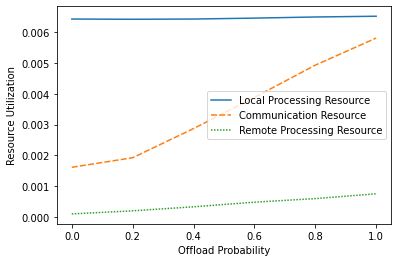

In [ ]:
ax = sns.lineplot(data=df_mean_time, err_style="bars", ci=95)
ax.set(xlabel = "Offload Probability", ylabel="Resource Utilization")
plt.show()

Comparing Local Resources for different speedup ratios


In [ ]:
ratio_local_samples = []
ratio_local_diff = []
ratio_local_zero = []

time_local_samples = []
time_comm_samples = []
time_remote_samples = []

local_alg_theory_best_samples = []
local_ratio_best_samples = []
local_performance_best_samples = []

In [ ]:
generateSamples(3,0)
df_mean_c2 = pd.DataFrame(np.mean(time_local_samples,axis=1),columns=["Computation Resource 2"],index=index)

fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
40922 42000


In [ ]:

generateSamples(3,1)
df_mean_c4 = pd.DataFrame(np.mean(time_local_samples,axis=1),columns=["Computation Resource 4"],index=index)

fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail bes

In [ ]:

generateSamples(3,2)
df_mean_c8 = pd.DataFrame(np.mean(time_local_samples,axis=1),columns=["Computation Resource 8"],index=index)

fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail bes

In [ ]:
df_mean_c = pd.concat([df_mean_c2, df_mean_c4, df_mean_c8], axis=1)

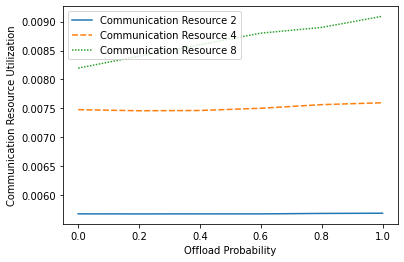

In [ ]:
ax = sns.lineplot(data=df_mean_c, err_style="bars", ci=95)
ax.set(xlabel = "Offload Probability", ylabel="Communication Resource Utilization")
plt.show()

Comparing Communication Resources for different speedup ratios

In [ ]:
ratio_local_samples = []
ratio_local_diff = []
ratio_local_zero = []

time_local_samples = []
time_comm_samples = []
time_remote_samples = []

local_alg_theory_best_samples = []
local_ratio_best_samples = []
local_performance_best_samples = []

In [ ]:
generateSamples(3,0)
df_mean_c2 = pd.DataFrame(np.mean(time_comm_samples,axis=1),columns=["Communication Resource 2"],index=index)

fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
40885 42000


In [ ]:

generateSamples(3,1)
df_mean_c4 = pd.DataFrame(np.mean(time_comm_samples,axis=1),columns=["Communication Resource 4"],index=index)

fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail bes

In [ ]:

generateSamples(3,2)
df_mean_c8 = pd.DataFrame(np.mean(time_comm_samples,axis=1),columns=["Communication Resource 8"],index=index)

fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail bes

In [ ]:
df_mean_c = pd.concat([df_mean_c2, df_mean_c4, df_mean_c8], axis=1)

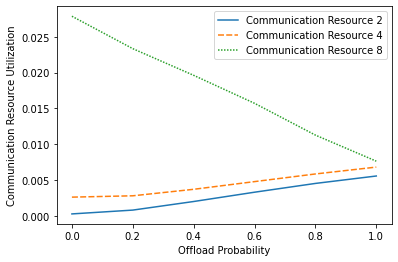

In [ ]:
ax = sns.lineplot(data=df_mean_c, err_style="bars", ci=95)
ax.set(xlabel = "Offload Probability", ylabel="Communication Resource Utilization")
plt.show()

Comparing Communication Resources for different speedup ratios

In [ ]:
ratio_local_samples = []
ratio_local_diff = []
ratio_local_zero = []

time_local_samples = []
time_comm_samples = []
time_remote_samples = []

local_alg_theory_best_samples = []
local_ratio_best_samples = []
local_performance_best_samples = []

In [ ]:
generateSamples(3,0)
df_mean_c2 = pd.DataFrame(np.mean(time_comm_samples,axis=1),columns=["Communication Resource 2"],index=index)

fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
40885 42000


In [ ]:

generateSamples(3,1)
df_mean_c4 = pd.DataFrame(np.mean(time_comm_samples,axis=1),columns=["Communication Resource 4"],index=index)

fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail bes

In [ ]:

generateSamples(3,2)
df_mean_c8 = pd.DataFrame(np.mean(time_comm_samples,axis=1),columns=["Communication Resource 8"],index=index)

fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail best point
fail bes

In [ ]:
df_mean_c = pd.concat([df_mean_c2, df_mean_c4, df_mean_c8], axis=1)

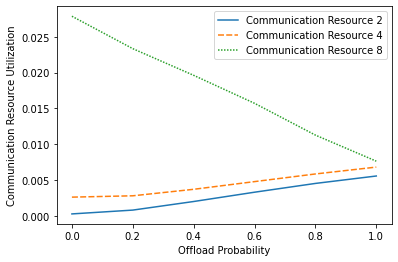

In [ ]:
ax = sns.lineplot(data=df_mean_c, err_style="bars", ci=95)
ax.set(xlabel = "Offload Probability", ylabel="Communication Resource Utilization")
plt.show()

In [ ]:
#theoritical worst case for different ratios
#todo
bound_rho = []
p=1
for i in ratios:
  deno = 1+sum(vgg16_compute_values_remote_expected)*link_rate*math.sqrt(i)/np.min(input_data_real[:len(input_data_real)-1])
  bound_rho.append(1+(1-p)*in_ratio*i/deno)

In [ ]:
bound_rho

[1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
rhos = np.array(ratio_local_samples)

In [ ]:
rhos_indices = np.array([rhos[:,i,:] for i in range(4)])

In [ ]:
rhos_indices[0].shape

(5, 7000)

In [ ]:
df_main = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio', 'Average Slow-down Ratio'])
# df_1 = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio', 'Average Slow-down Ratio'])
# df_2 = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio', 'Average Slow-down Ratio'])
# df_3 = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio', 'Average Slow-down Ratio'])
columns =['1.5x21.33', '2x21.33', '3x21.33', '4x21.33', '8x21.33']

In [ ]:
def populate(df):
  for k in range(2):
    for i in range(5):
      for j in range(7000):
        df.loc[len(df.index)] = [rhos_indices[k][i][j], columns[i], slow_down[k]]
  return df

In [ ]:
populate(df_main)

KeyboardInterrupt: ignored

In [ ]:
df_worst = pd.DataFrame(np.array(bound_rho), columns=["bound"])

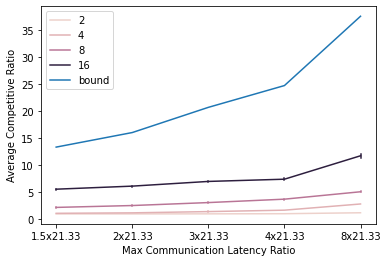

In [ ]:
sns.lineplot(x="Max Communication Latency Ratio",y="Average Competitive Ratio", hue="Average Slow-down Ratio", data=df_main, err_style="bars", ci=95)
sns.lineplot(data = df_worst )

In [ ]:
def populate1(df,k):
  for i in range(5):
    for j in range(7000):
      df.loc[len(df.index)] = [rhos_indices[k][i][j], columns[i]]
  return df

In [ ]:
df_0 = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio'])
df_1 = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio'])
df_2 = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio'])
df_3 = pd.DataFrame(columns = ['Average Competitive Ratio', 'Max Communication Latency Ratio'])
columns =['1.5x21.33', '2x21.33', '3x21.33', '4x21.33', '8x21.33']

In [ ]:
populate1(df_0,0)
populate1(df_1,1)
populate1(df_2,2)
populate1(df_3,3)

Average Competitive Ratio Max Communication Latency Ratio
0                      12.639690                       1.5x21.33
1                       6.360479                       1.5x21.33
2                      10.682490                       1.5x21.33
3                      11.768753                       1.5x21.33
4                      10.977571                       1.5x21.33
...                          ...                             ...
34995                   6.704312                         8x21.33
34996                   3.308726                         8x21.33
34997                   4.565913                         8x21.33
34998                   1.118576                         8x21.33
34999                   5.852827                         8x21.33

[35000 rows x 2 columns]

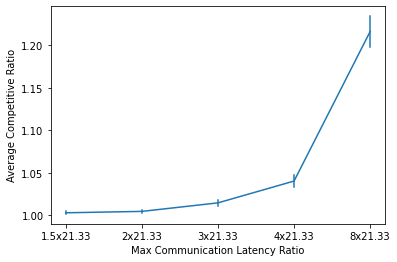

In [ ]:
sns.lineplot(x="Max Communication Latency Ratio",y="Average Competitive Ratio", data=df_0, err_style="bars", ci=95)


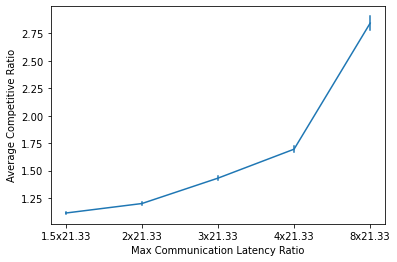

In [ ]:
sns.lineplot(x="Max Communication Latency Ratio",y="Average Competitive Ratio", data=df_1, err_style="bars", ci=95)


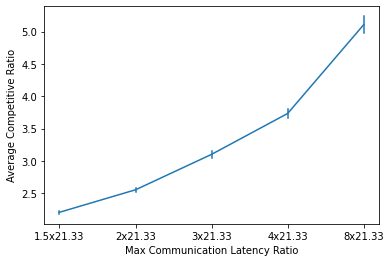

In [ ]:
sns.lineplot(x="Max Communication Latency Ratio",y="Average Competitive Ratio", data=df_2, err_style="bars", ci=95)


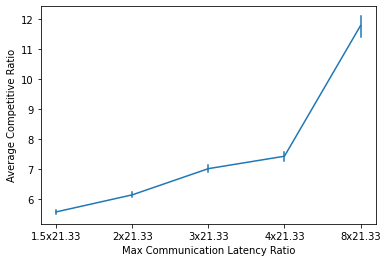

In [ ]:
sns.lineplot(x="Max Communication Latency Ratio",y="Average Competitive Ratio", data=df_3, err_style="bars", ci=95)
